# **Importing required libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

# **Reading csv and Creating dataframe**

In [3]:
df=pd.read_csv('C:/Users/tarus/Downloads/all-data2.csv',encoding = "ISO-8859-1")
df.head()

,Sentiments,News Headlines
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sentiments      4846 non-null   object
 1   News Headlines  4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [5]:
df.isna().sum()

Sentiments        0
News Headlines    0
dtype: int64

In [6]:
df['Sentiments'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiments, dtype: int64

In [7]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

In [11]:
#storing the puntuation free text in a new column called clean_msg
df['News Headlines']= df['News Headlines'].apply(lambda x:remove_punctuation(x))

In [22]:
 df. rename(columns = {'News Headlines':'news'}, inplace = True)

In [12]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tarus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Defining function to generate N grams**

In [13]:
def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))] 
  words = list(filter(None, words))
  print("Sentence after removing stopwords:",words)              
  temp=zip(*[words[i:] for i in range(ngram)])                   
  ans=[' '.join(ngram) for ngram in temp]                       
  return ans

In [14]:
#sample!
generate_N_grams("I am a filthy  monster ",2)

Sentence after removing stopwords: ['I', 'filthy', 'monster']


['I filthy', 'filthy monster']

In [15]:
from collections import defaultdict                            

In [16]:
positiveValues=defaultdict(int)                                   # default value is 0
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)


In [23]:
#get the count of every word in both the columns of df_train and df_test dataframes
for text in df[df.Sentiments=="positive"].news:
  for word in generate_N_grams(text):
      positiveValues[word]+=1

Sentence after removing stopwords: ['With', 'new', 'production', 'plant', 'company', 'would', 'increase', 'capacity', 'meet', 'expected', 'increase', 'demand', 'would', 'improve', 'use', 'raw', 'materials', 'therefore', 'increase', 'production', 'profitability']
Sentence after removing stopwords: ['According', 'company', 'updated', 'strategy', 'years', '20092012', 'Basware', 'targets', 'longterm', 'net', 'sales', 'growth', 'range', '20', '40', 'operating', 'profit', 'margin', '10', '20', 'net', 'sales']
Sentence after removing stopwords: ['FINANCING', 'OF', 'ASPOCOMP', 'S', 'GROWTH', 'Aspocomp', 'aggressively', 'pursuing', 'growth', 'strategy', 'increasingly', 'focusing', 'technologically', 'demanding', 'HDI', 'printed', 'circuit', 'boards', 'PCBs']
Sentence after removing stopwords: ['For', 'last', 'quarter', '2010', 'Componenta', 'net', 'sales', 'doubled', 'EUR131m', 'EUR76m', 'period', 'year', 'earlier', 'moved', 'zero', 'pretax', 'profit', 'pretax', 'loss', 'EUR7m']
Sentence after 

Sentence after removing stopwords: ['The', 'company', 'order', 'book', 'stood', '15', 'bln', 'euro', '22', 'bln', 'September', '30', '2007', '242', 'pct', 'year', 'international', 'orders', 'amounting', '365', 'mln', 'euro', '5343', 'mln']
Sentence after removing stopwords: ['The', 'company', 'said', 'paper', 'demand', 'increased', 'main', 'markets', 'including', 'publication', 'papers', 'increased', 'average', 'paper', 'prices', '4', 'percent', 'compared', 'last', 'year']
Sentence after removing stopwords: ['The', 'world', 'second', 'largest', 'stainless', 'steel', 'maker', 'said', 'net', 'profit', 'threemonth', 'period', 'Dec', '31', 'surged', 'euro603', 'million', 'US', '781', 'million', 'euro3', '33', 'US', '431', 'per', 'share', 'euro172', 'million', 'euro0', '94', 'per', 'share', 'previous', 'year']
Sentence after removing stopwords: ['Within', 'framework', 'partnership', 'Nokia', 'Siemens', 'Networks', 'signed', 'initial', 'framework', 'purchase', 'agreement', 'Sitronics', 'subs

Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', 'net', 'sales', 'increased', '2', 'EUR', '10507', 'mn', 'EUR', '10270', 'mn', 'fourth', 'quarter', '2007']
Sentence after removing stopwords: ['International', 'sales', 'rose', '598', 'EUR', '12444', 'mn']
Sentence after removing stopwords: ['Net', 'sales', 'grew', 'period', 'x20ac', '402', 'million', '585US', 'million', 'x20ac', '401', 'million', '2006']
Sentence after removing stopwords: ['Net', 'sales', 'increased', 'EUR655m', 'April', 'June', '2010', 'EUR438m', 'year', 'earlier']
Sentence after removing stopwords: ['Net', 'sales', 'rose', '255', 'yearonyear', 'EUR59', '6', 'number', 'chargers', 'delivered', 'went', '41', '659', 'million', 'pieces']
Sentence after removing stopwords: ['Net', 'sales', 'totaled', 'EUR', '936', 'mn', 'EUR', '932', 'mn', 'corresponding', 'period', '2005']
Sentence after removing stopwords: ['Nokia', 'also', 'noted', 'average', 'selling', 'price', 'handsets', 'declined', 'period', 'th

Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', '12month', 'period', 'increased', 'respectively', 'EUR4', '7', 'EUR26', '7', 'compared', '2004']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'ninemonth', 'period', 'increased', 'respectively', '266', '34', 'compared', 'corresponding', 'period', '2006']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'sixmonth', 'period', 'increased', 'respectively', 'EUR13', '8', 'EUR143', '6', 'compared', 'corresponding', 'period', '2007']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'sixmonth', 'period', 'increased', 'respectively', 'EUR0', '4', 'EUR3', '2', 'compared', 'corresponding', 'period', '2005']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'sixmonth', 'period', 'increased', 'respectively', 'EUR18', '1', 'EUR127', '6', 'compared', 'corresponding', 'period', '2006'

Sentence after removing stopwords: ['In', 'Sweden', 'operating', 'profit', 'period', 'review', 'totaled', 'EUR', '34', 'mn', '308', 'corresponding', 'period', '2005']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2009', 'Orion', 'net', 'profit', 'went', '338', 'yearonyear', 'EUR33m']
Sentence after removing stopwords: ['In', 'second', 'quarter', '2010', 'group', 'net', 'profit', 'rose', 'EUR', '31', 'million', 'EUR', '25', 'million', 'AprilJune', '2009']
Sentence after removing stopwords: ['In', 'second', 'quarter', '2010', 'group', 'net', 'profit', 'rose', 'EUR3', '1', 'EUR2', '5', 'AprilJune', '2009']
Sentence after removing stopwords: ['In', 'third', 'quarter', 'net', 'sales', 'increased', '12', 'yearonyear', 'EUR', '1595', 'million', '6', 'comparable', 'currency', 'rates', 'growth']
Sentence after removing stopwords: ['In', 'third', 'quarter', 'net', 'sales', 'increased', '12', 'yearonyear', 'EUR159', '5', '6', 'comparable', 'currency', 'rates', 'growth']
Sentence

Sentence after removing stopwords: ['Revenue', 'grew', '12', 'percent', 'x20ac', '36', 'billion', 'US', '45', 'billion']
Sentence after removing stopwords: ['Revenue', 'July', 'September', 'grew', '14', 'percent', 'EURO', '467', 'million', 'year', 'earlier', 'company', 'said', 'Thursday']
Sentence after removing stopwords: ['Revenues', 'time', 'grew', '14', 'percent', '43', 'million', 'euros']
Sentence after removing stopwords: ['Ruukki', 'signed', 'contract', 'deliver', 'install', 'steel', 'structures', 'bridge', 'Kyronsalmi', 'strait', 'Savonlinna', 'Finland']
Sentence after removing stopwords: ['Sales', 'Latin', 'America', 'increased', '42', 'EUR', '432mn', 'total', '87', 'mn', 'mobile', 'devices', 'sold', 'area', 'representing', 'increase', '32', 'corresponding', 'period', '2009']
Sentence after removing stopwords: ['Sales', 'clothing', 'developed', 'best']
Sentence after removing stopwords: ['Sanoma', 'Magazines', 'Finland', 'net', 'sales', 'grew', 'EUR', '1401', 'mn', 'EUR', '131

Sentence after removing stopwords: ['In', 'JanuarySeptember', '2007', 'group', 'net', 'sales', 'continuing', 'operations', 'rose', 'EUR', '2131', 'mn', 'EUR', '1726', 'mn', 'corresponding', 'period', '2006']
Sentence after removing stopwords: ['In', 'JulySeptember', '2008', 'YIT', 'net', 'sales', 'increased', 'EUR', '9708', 'mn', 'compared', 'EUR', '9068', 'mn', 'corresponding', 'period', '2007']
Sentence after removing stopwords: ['In', 'reporting', 'period', 'net', 'sales', 'rose', '8', 'yearonyear', 'EUR64', '3', 'due', 'business', 'acquisitions', 'realized', 'first', 'half', '200809', 'effect', 'EUR10', '9', 'review', 'period']
Sentence after removing stopwords: ['In', 'reporting', 'period', 'company', 'operating', 'profit', 'grew', '432', 'EUR', '6', 'million']
Sentence after removing stopwords: ['Last', 'year', 'net', 'sales', 'rose', 'EUR', '683', 'million', 'EUR', '622', 'million']
Sentence after removing stopwords: ['Last', 'year', 'company', 'raised', 'turnover', 'approximate

Sentence after removing stopwords: ['Finnish', 'silicon', 'wafers', 'manufacturer', 'Okmetic', 'Oyj', 'said', 'June', '29', '2007', 'signed', 'agreement', 'Nordea', 'Bank', 'Finland', 'Plc', 'local', 'subsidiary', 'Swedish', 'commercial', 'bank', 'Nordea', 'Bank', 'AB', 'refinance', 'Okmetic', 'syndicated', 'bank', 'facility', 'amounts', '20', 'mln', 'euro', '269', 'mln']
Sentence after removing stopwords: ['Furthermore', 'Bunge', 'also', 'sign', 'licensing', 'agreement', 'Sunnuntai', 'Carlshamn', 'Mejeri', 'brands']
Sentence after removing stopwords: ['In', 'September', '2010', 'Finnish', 'group', 'agreed', 'buy', 'Danish', 'company', 'Rose', 'Poultry', 'AS', 'EUR23', '9', 'combination', 'cash', 'stock']
Sentence after removing stopwords: ['planning', 'expand', 'product', 'portfolio', 'harbor', 'segment', 'chief', 'executive', 'Pekka', 'Lundmark', 'told', 'Financial', 'Times', 'Deutschland']
Sentence after removing stopwords: ['KAUKOTELKO', 'LTD', 'PRESS', 'RELEASE', '19062007', 'AT',

Sentence after removing stopwords: ['Ruukki', 'Romania', 'local', 'arm', 'Finnish', 'metal', 'producer', 'Ruukki', 'increased', 'capital', '900000', 'euro', '114', 'mln', 'cash', 'contribution', 'reported', 'September', '19', '2006']
Sentence after removing stopwords: ['STX', 'Finland', 'Oy', 'signed', 'preliminary', 'agreement', 'building', 'environmentally', 'friendly', 'new', 'generation', 'cruise', 'ferry', 'Viking', 'Line', 'manage', 'Turku', 'Finland', 'Stockholm', 'Sweden', 'withViking', 'Line', 'ABP']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'net', 'sales', '2010', 'increase', 'considerably', '2009', 'operating', 'result', 'clearly', 'positive']
Sentence after removing stopwords: ['The', 'tower', 'chose', 'add', 'due', 'go', 'operation', 'summer', 'increase', 'total', 'capacity', '80', 'broadsheet', '160', 'tabloid', 'pages', 'ability', 'run', '32', '48page', 'products', 'side', 'side']
Sentence after removing stopwords: ['Uponor', 'made', 'operating',

Sentence after removing stopwords: ['Selects', 'Third', 'Party', 'Logistics', 'Leader', 'Transplace', 'BestinClass', 'Technology', 'Procurement', 'Capabilities', 'Leading', 'Specialty', 'Packaging', 'Manufacturer', 'Employs', 'Complete', '3PL', 'Solution', 'Supply', 'Chain', 'Visibility', 'Transportation', 'Efficiency', 'Increase', 'Service', 'Levels', 'OnTime', 'Deliveries']
Sentence after removing stopwords: ['4G', 'allows', 'customers', 'use', 'mobile', 'broadband', 'services', 'speeds', 'ten', 'times', 'higher', 'today', '3G']
Sentence after removing stopwords: ['Based', 'strong', 'customer', 'interest', 'feedback', 'using', 'RPM', 'mobile', 'phone', 'manufacturers', 'operators', 'enterprises', 'developer', 'forums', 'significantly', 'increase', 'product', 'service', 'quality', 'userexperience', 'costefficiency', 'Tulonen', 'continues']
Sentence after removing stopwords: ['Ixonos', 'rich', 'heritage', 'developing', 'leadership', 'experiences', 'smartphone', 'segment']
Sentence afte

Sentence after removing stopwords: ['As', 'result', 'company', 'currently', 'anticipates', 'net', 'sales', 'increase', 'operating', 'result', 'positive']
Sentence after removing stopwords: ['Asimilar', 'agreement', 'signed', 'China', 'Mobile', 'Ltd', 'SEHK', '0941', 'NYSE', 'CHL', 'largest', 'mobile', 'carrier', 'theGPS', 'social', 'networking', 'service', 'provider', 'promoting', 'GyPSii', 'service', 'Beijing', '2008', 'Olympic', 'Games', 'according', 'thelatest', 'news']
Sentence after removing stopwords: ['UPM', 'deliveries', 'increased', 'third', 'quarter', '4', 'percent', 'efficiency', 'operations', 'improved', 'Chief', 'Executive', 'Jussi', 'Pesonen', 'said']
Sentence after removing stopwords: ['Global', 'sports', 'equipment', 'maker', 'Amer', 'Sports', 'Corp', 'whose', 'brands', 'include', 'Atomic', 'Salomon', 'Wilson', 'saw', '64', 'percent', 'increase', 'thirdquarter', 'net', 'profit', 'EURO', '474', 'million', '65', 'million', 'strong', 'sales', 'cost', 'cuts']
Sentence after

Sentence after removing stopwords: ['In', 'addition', 'fireplace', 'exports', 'demand', 'lining', 'stone', 'exceeded', 'level', 'earlier', 'part', 'year', 'continue', 'clearly', 'brisker', 'remainder', 'year']
Sentence after removing stopwords: ['Kalmar', 'awarded', 'new', '5year', 'contract', 'supply', 'Rough', 'Terrain', 'Container', 'Handler', 'RTCH']
Sentence after removing stopwords: ['Major', 'Order', 'India', 'Comptel', 'Corporation', 'received', 'significant', 'longterm', 'order', 'mediation', 'provisioning', 'solutions', 'used', 'leading', 'operator', 'India']
Sentence after removing stopwords: ['Managing', 'Director', 'Kari', 'Inkinen', 'says', 'Sponda', 'leasing', 'operations', 'developed', 'highly', 'favourably']
Sentence after removing stopwords: ['Net', 'cash', 'flow', 'operations', 'expected', 'remain', 'positive']
Sentence after removing stopwords: ['Of', 'price', 'Kesko', 'share', '10', 'mln', 'euro', '155', 'mln', 'recognize', 'gain', '40', 'mln', 'euro', '62', 'mln',

Sentence after removing stopwords: ['According', 'Ringman', 'Finnish', 'paper', 'companies', 'acquired', 'knowhow', 'capacity', 'paper', 'recycling', 'turned', 'successful', 'strategy']
Sentence after removing stopwords: ['According', 'Schmardin', 'Nordea', 'likely', 'try', 'win', 'customers', 'pension', 'fund', 'providers']
Sentence after removing stopwords: ['According', 'CEO', 'Nordea', 'Bank', 'Estonia', 'Vahur', 'Kraft', 'Nordea', 'Finland', 'Stockmann', 'cooperating', 'ten', 'years']
Sentence after removing stopwords: ['Adanac', 'Molybdenum', 'Canada', 'ordered', 'grinding', 'technology', 'molybdenum', 'project', 'British', 'Columbia', 'Canada', 'Shalkiya', 'Zinc', 'Kazakhstan', 'awarded', 'contract', 'grinding', 'technology', 'Shalkiya', 'zinclead', 'project', 'Kazakhstan']
Sentence after removing stopwords: ['All', 'Raisio', 'divisions', 'recorded', 'operating', 'profit']
Sentence after removing stopwords: ['And', 'broker', 'repeated', 'buy', 'rating', 'based', 'expectations', 

Sentence after removing stopwords: ['Nevertheless', 'Fitch', 'notes', 'business', 'fundamentals', 'three', 'banks', 'currently', 'remain', 'sound']
Sentence after removing stopwords: ['Nokia', 'controls', '50', 'percent', 'phone', 'sales', 'India', 'Africa', 'strong', 'prosition', 'emerging', 'markets']
Sentence after removing stopwords: ['NORDIC', 'BUSINESS', 'REPORT26', 'June', '2006Metso', 'Corporation', 'wins', 'EUR50m', 'equipment', 'order', 'Australia', '19982006', 'M2', 'COMMUNICATIONS', 'LTD', 'The', 'Finnish', 'engineering', 'technology', 'group', 'Metso', 'Corporation', 'said', 'Monday', '26', 'June', 'received', 'EUR50m', 'equipment', 'order', 'Australia']
Sentence after removing stopwords: ['Of', 'sales', 'price', 'sales', 'gain', '31', 'mln', 'euro', '45', 'mln', 'recognized', 'Incap', 'earnings', '2007']
Sentence after removing stopwords: ['Outotec', 'net', 'profit', 'second', 'quarter', '2007', 'jumped', '168', 'mln', 'euro', '231', 'mln', '46', 'mln', 'euro', '63', 'mln

Sentence after removing stopwords: ['Demand', 'sports', 'equipment', 'good', '2005']
Sentence after removing stopwords: ['Last', 'year', 'Finnair', 'recorded', '326percent', 'growth', 'Asian', 'sector', 'carrying', '110', 'million', 'passengers', 'two', 'continents']
Sentence after removing stopwords: ['The', 'additional', 'flight', 'linking', 'Mumbai', 'Helsinki', 'dictated', 'strong', 'traffic', 'demand', 'Asia', 'Europe']
Sentence after removing stopwords: ['The', 'lowering', 'prices', 'us', 'competitors', 'shows', 'real', 'estate', 'market', 'stabilised', 'returned', 'balance', 'apartments', 'acquiring', 'fair', 'price', 'eyes', 'clients']
Sentence after removing stopwords: ['The', 'new', 'structure', 'provides', 'better', 'communication', 'faster', 'decisionmaking', 'cost', 'savings', 'Proha', 'said']
Sentence after removing stopwords: ['This', 'contract', 'demonstrates', 'ability', 'apply', 'minerals', 'metals', 'technologies', 'adjacent', 'industries', 'oil', 'shale', 'processin

Sentence after removing stopwords: ['The', 'financial', 'impact', 'estimated', '15', 'MEUR', 'annual', 'improvement', 'division', 'result', 'starting', 'fiscal', 'year', '2007']
Sentence after removing stopwords: ['The', 'Finnish', 'group', 'anticipates', 'sales', 'gain', 'EUR42m', 'tax', 'expenses']
Sentence after removing stopwords: ['The', 'launch', 'plant', 'June', 'went', 'well', 'producing', 'advanced', 'fuel', 'couple', 'weeks']
Sentence after removing stopwords: ['The', 'parties', 'agreed', 'negotiate', 'definitive', 'distribution', 'license', 'agreements', 'end', 'June', '2010']
Sentence after removing stopwords: ['The', 'rationalization', 'operations', 'seeks', 'achieve', 'EUR', '1', 'million', 'yearly', 'savings', 'second', 'quarter', 'current', 'financial', 'year']
Sentence after removing stopwords: ['The', 'sale', 'result', 'gain', 'EUR', '60', 'million', 'second', 'quarter', '2010', 'OriolaKD', 'supports', 'Finnish', 'company', 'strategy', 'focus', 'pharmaceutical', 'whol

Sentence after removing stopwords: ['Furthermore', 'fully', 'electrically', 'driven', 'cranes', 'environmentally', 'friendly']
Sentence after removing stopwords: ['Grapevine', 'city', 'officials', 'September', 'approved', '35', 'million', 'tax', 'rebates', 'grants', 'expansion']
Sentence after removing stopwords: ['He', 'also', 'mentions', 'improvement', 'service', 'follows', 'recent', 'expansion', 'Finnlines', 'service', 'Bilbao', 'via', 'Antwerp', 'Helsinki', 'Hull', 'via', 'Helsinki', 'St', 'Petersburg']
Sentence after removing stopwords: ['Iggesunds', 'Bruk', 'Sweden', 'one', 'advanced', 'fully', 'integrated', 'pulp', 'paperboard', 'mills', 'world']
Sentence after removing stopwords: ['In', 'Homeware', 'area', 'Fiskars', 'provides', 'leading', 'branded', 'products', 'home', 'kitchen', 'interior', 'design']
Sentence after removing stopwords: ['It', 'solid', 'credit', 'compared', 'DZ', 'Bank', 'Rabobank']
Sentence after removing stopwords: ['Jawad', 'Williams', 'scored', '23', 'point

Sentence after removing stopwords: ['The', 'pipeline', 'strong']
Sentence after removing stopwords: ['The', 'service', 'intended', 'allow', 'people', 'thirteen', 'Mediterranean', 'countries', 'reach', 'Baltic', 'rapidly', 'single', 'carrier']
Sentence after removing stopwords: ['The', 'terms', 'financing', 'approved', 'Annual', 'General', 'Meeting', 'Company', 'held', 'June', '30', '2010']
Sentence after removing stopwords: ['There', 'companies', 'ready', 'invest', 'funds', 'deal', 'Rostelecom', 'RTS', 'RTKM']
Sentence after removing stopwords: ['This', 'first', 'time', 'Finnair', 'awarded', 'agreement', 'UK', 'government']
Sentence after removing stopwords: ['UPMKymmene', 'generated', 'four', 'consecutive', 'quarters', 'positive', 'Free', 'Cash', 'Flow']
Sentence after removing stopwords: ['UPMKymmene', 'generated', 'seventeen', 'consecutive', 'quarters', 'positive', 'Cash', 'Flow', 'Operations']
Sentence after removing stopwords: ['UPMKymmene', 'generated', 'thirtyone', 'consecutive'

Sentence after removing stopwords: ['SysOpen', 'Digia', 'Plc', 'Press', 'release', '7', 'February', '2006', 'IBM', 'Finland', 'rewarded', 'distinguished', 'partner', 'companies', '2005']
Sentence after removing stopwords: ['The', 'brokerage', 'said', '2006', 'seen', 'true', 'turning', 'point', 'European', 'steel', 'base', 'prices', 'better', 'pricing', 'seen', 'carrying', 'second', 'quarter', '2006']
Sentence after removing stopwords: ['The', 'concept', 'enables', 'commercially', 'affordable', 'way', 'manufacture', 'highquality', 'TCO', 'coated', 'glass', 'solar', 'industry']
Sentence after removing stopwords: ['The', 'new', 'policy', 'also', 'aimed', 'making', 'companies', 'profitable', 'competitive']
Sentence after removing stopwords: ['The', 'purpose', 'action', 'ensure', 'company', 'cost', 'effectiveness', 'year', 'near', 'future']
Sentence after removing stopwords: ['This', 'location', 'makes', 'mall', 'convenient', 'place', 'shop', 'consumers', 'three', 'large', 'residential', 'a

Sentence after removing stopwords: ['Higher', 'bit', 'rates', 'outgoing', 'traffic', 'improves', 'enduser', 'experience', 'mobile', 'broadband', 'services', 'video', 'conferencing', 'file', 'sharing', 'sending', 'emails', 'attachments']
Sentence after removing stopwords: ['I', 'looking', 'forward', 'contribute', 'SRV', 'success', 'competence', 'says', 'Taneli', 'Hassinen']
Sentence after removing stopwords: ['It', 'combines', 'perfect', 'price', 'performance', 'sophisticated', 'management', 'facilities', 'company', 'said']
Sentence after removing stopwords: ['It', 'provides', 'customers', 'industryleading', 'elevators', 'escalators', 'innovative', 'solutions', 'maintenance', 'modernization']
Sentence after removing stopwords: ['Kemira', 'Coatings', 'leading', 'supplier', 'paints', 'Northern', 'Eastern', 'Europe', 'providing', 'consumers', 'professionals', 'branded', 'products', 'approx']
Sentence after removing stopwords: ['Poyry', 'good', 'track', 'record', 'major', 'transportation', 

Sentence after removing stopwords: ['In', 'newly', 'formed', 'company', 'YIT', 'Stavo', 'local', 'contact', 'network', 'expertise', 'market', 'know', 'Euro', 'Stavokonsult', 'combined', 'YIT', 'housing', 'concept', 'said', 'Juha', 'Kostiainen', 'Yit', 'Vice', 'President', 'Corporate', 'Communications', 'Business', 'Development']
Sentence after removing stopwords: ['A', 'euro', '48', 'million', 'investment', '136', 'Lewa', 'netted', 'Deutsche', 'Beteiligungs', 'euro', '21', 'million']
Sentence after removing stopwords: ['In', 'China', 'Finnish', 'Kone', 'provides', 'elevators', 'escalators', 'solutions', 'modernisation', 'maintenance', 'build', '342', 'escalators', 'installed', 'highspeed', 'railway', 'section', 'Beijing', 'Shanghai', '15', 'years', 'time']
Sentence after removing stopwords: ['According', 'PKC', 'acquisition', 'would', 'bring', 'significant', 'addition', 'PKC', 'customer', 'base']
Sentence after removing stopwords: ['Airbus', '100', 'firm', 'orders', 'A350', '89', 'nonb

Sentence after removing stopwords: ['Efficiency', 'programs', 'totalling', '100', 'million', 'euros', 'way', 'Finnair']
Sentence after removing stopwords: ['Elektrobit', 'EB', 'renewed', 'IT', 'infrastructure', 'contract', 'ICT', 'services', 'provider', 'Fujitsu', 'Services', 'EB', 'Patja', 'service']
Sentence after removing stopwords: ['European', 'traffic', 'grew', 'nearly', '30']
Sentence after removing stopwords: ['Finnish', 'elevators', 'escalators', 'maker', 'KONE', 'Corporation', 'said', 'Tuesday', '18', 'March', 'received', 'major', 'order', 'Sir', 'Robert', 'McAlpine', 'supply', 'elevators', 'escalators', 'Watermark', 'Place', 'project', 'City', 'London']
Sentence after removing stopwords: ['Finnish', 'financial', 'software', 'developer', 'Basware', 'Oyj', 'said', 'today', 'provide', 'invoice', 'automation', 'IA', 'solution', 'unnamed', 'major', 'retail', 'company', 'USA', 'deal', 'worth', 'EUR300', '000']
Sentence after removing stopwords: ['Finnish', 'forest', 'machinery', '

Sentence after removing stopwords: ['Operating', 'loss', 'EUR', '179mn', 'compared', 'loss', 'EUR', '188mn', 'second', 'quarter', '2009']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '98', 'mn', 'compared', 'loss', 'EUR', '127', 'mn', 'corresponding', 'period', '2009']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '03', 'mn', 'compared', 'loss', 'EUR', '22', 'mn', 'first', 'quarter', '2005']
Sentence after removing stopwords: ['Pretax', 'profit', 'totalled', 'EUR', '20', 'mn', 'compared', 'loss', 'EUR', '1592', 'mn', 'fourth', 'quarter', '2008']
Sentence after removing stopwords: ['Pretax', 'profit', 'totalled', 'EUR', '808', 'mn', 'compared', 'loss', 'EUR', '131', 'mn', 'corresponding', 'period', '2009']
Sentence after removing stopwords: ['Previously', 'EB', 'delivered', 'custom', 'solution', 'LG', 'Electronics', 'making', 'commercially', 'available', 'mobile', 'terminal', 'vendors', 'well', 'wireless', 'operators']
Sentence after removi

Sentence after removing stopwords: ['3', 'February', '2011', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'provider', 'Teleste', 'Oyj', 'HEL', 'TLT1V', 'said', 'yesterday', 'net', 'profit', 'rocketed', 'EUR4', '8', '2010', 'EUR416', '000', '2009', 'lifted', 'dividend', 'proposal']
Sentence after removing stopwords: ['4', 'February', '2011', 'Finnish', 'broadband', 'data', 'communication', 'systems', 'provider', 'Teleste', 'Oyj', 'HEL', 'TLT1V', 'said', 'Wednesday', 'net', 'profit', 'rocketed', 'EUR4', '8', '2010', 'EUR416', '000', '2009', 'lifted', 'dividend', 'proposal']
Sentence after removing stopwords: ['agreement', 'SHB', '30', 'December', '2009', 'Finnish', 'financial', 'services', 'group', 'Aktia', 'HEL', 'AKTAV', 'concluded', 'market', 'making', 'agreement', 'Svenska', 'Handelsbanken', 'STO', 'SHB', 'A', 'SHB', 'two', 'parties', 'said', 'today']
Sentence after removing stopwords: ['AUSTIN', 'Texas', 'Sept', '6', 'Texas', 'Department', 'Of', 'Transportation', 'awa

Sentence after removing stopwords: ['firm', '28', 'October', '2009', 'Finnish', 'lifting', 'equipment', 'maker', 'Konecranes', 'Oyj', 'HEL', 'KCR1V', 'said', 'today', 'acquired', 'US', 'Machine', 'Tool', 'Solutions', 'Unlimited', 'Cincinnati', 'Ohio', 'undisclosed', 'sum']
Sentence after removing stopwords: ['Growth', 'expected', 'continue', '2008']
Sentence after removing stopwords: ['Ixonos', 'estimates', 'hire', '20', 'specialists', 'mechanical', 'engineering', 'electronics', 'design', 'RD', 'new', 'unit', 'Jyvaeskylae', 'end', '2009']
Sentence after removing stopwords: ['Mreal', 'Corporation', 'Press', 'release', '3', 'November', '1035', 'Mreal', 'Corporation', 'second', 'best', 'company', 'materials', 'sector', 'including', 'eg', 'forest', 'industry', 'companies', 'Carbon', 'Disclosure', 'Leadership', 'Index', 'CDLI', 'Nordic', 'Report', '2009']
Sentence after removing stopwords: ['OriolaKD', 'expects', 'invoicing', '2008', 'higher', 'comparable', 'invoicing', '2007']
Sentence aft

Sentence after removing stopwords: ['In', 'banking', 'Sampo', 'A', 'unchanged', '1424', 'eur', 'Nordea', 'rose', '042', 'pct', '951', 'eur']
Sentence after removing stopwords: ['In', 'autumn', 'plans', 'expand', 'service', 'St', 'Petersburg', 'Moscow', 'launch', 'service', 'Yekaterinburg', 'Russia', 'flying', 'three', 'times', 'week']
Sentence after removing stopwords: ['Latvenergo', 'ordered', 'significant', 'expansion', 'Tekla', 'Xpower', 'network', 'information', 'system']
Sentence after removing stopwords: ['Lemcon', 'also', 'signed', 'precontract', 'purchase', 'park', 'entire', '130hectare', 'site']
Sentence after removing stopwords: ['Salo', 'Finland', '29', 'August', '2006', 'Benefon', 'today', 'announced', 'plans', 'strengthen', 'inhouse', 'technology', 'platform', 'licensing', 'complete', 'mobile', 'software', 'platform', 'Opna', 'longstanding', 'technology', 'partner', 'Pollex']
Sentence after removing stopwords: ['Strand', 'Associates', 'expanding', 'Madison', 'corporate', '

Sentence after removing stopwords: ['The', 'Dutch', 'broker', 'noted', 'Nokian', 'Tyres', 'reported', 'good', 'first', 'quarter', '2006', 'line', 'consensus']
Sentence after removing stopwords: ['The', 'Nokian', 'tyre', 'proves', 'high', 'safety', 'excellently', 'important', 'driving', 'qualities', 'stability', 'mark', '14', 'handling', '15', 'braking', 'wet', 'road', '19']
Sentence after removing stopwords: ['The', 'respondents', 'praised', 'Finnair', 'reliability', 'Finnishness', 'understanding', 'target', 'group']
Sentence after removing stopwords: ['The', 'longstanding', 'partnership', 'commitment', 'enable', 'parties', 'develop', 'respective', 'operations', 'ESL', 'Shipping', 'also', 'opportunity', 'update', 'fleet', 'improve', 'efficiency']
Sentence after removing stopwords: ['Thanks', 'wide', 'contact', 'network', 'good', 'knowledge', 'market', 'business', 'environment', 'give', 'great', 'contribution', 'development', 'Indian', 'operations', 'tells', 'Incap', 'President', 'CEO',

In [24]:
for text in df[df.Sentiments=="negative"].news:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

Sentence after removing stopwords: ['The', 'international', 'electronic', 'industry', 'company', 'Elcoteq', 'laid', 'tens', 'employees', 'Tallinn', 'facility', 'contrary', 'earlier', 'layoffs', 'company', 'contracted', 'ranks', 'office', 'workers', 'daily', 'Postimees', 'reported']
Sentence after removing stopwords: ['A', 'tinyurl', 'link', 'takes', 'users', 'scamming', 'site', 'promising', 'users', 'earn', 'thousands', 'dollars', 'becoming', 'Google', 'NASDAQ', 'GOOG', 'Cash', 'advertiser']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', 'rose', '367', 'points', '06', 'day', 'relative', 'price', 'change', '02']
Sentence after removing stopwords: ['Compared', 'FTSE', '100', 'index', 'rose', '949', 'points', '16', 'day', 'relative', 'price', 'change', '04']
Sentence after removing stopwords: ['One', 'challenges', 'oil', 'production', 'North', 'Sea', 'scale', 'formation', 'plug', 'pipelines', 'halt', 'production']
Sentence after removing stopwords: ['Jan', '6', 'F

Sentence after removing stopwords: ['Several', 'large', 'stocks', 'tacked', 'lower', 'however']
Sentence after removing stopwords: ['Sales', 'midstrength', 'beer', 'decreased', '40']
Sentence after removing stopwords: ['TeliaSonera', 'underlying', 'results', 'however', 'included', '457', 'mln', 'skr', 'positive', 'oneoffs', 'hence', 'adjusted', 'underlying', 'EBITDA', 'actually', 'amounts', '7309', 'bln', 'skr', 'clearly', 'expectations', 'analysts', 'said']
Sentence after removing stopwords: ['Finnish', 'insurance', 'company', 'Fennia', 'Kesko', 'Group', 'ending', 'loyal', 'customer', 'cooperation']
Sentence after removing stopwords: ['The', 'Finnish', 'daily', 'Kauppalehti', 'surmises', 'Finnish', 'supplier', 'Rautaruukki', 'raised', 'prices', 'Aker', 'comfort', 'zone']
Sentence after removing stopwords: ['Shares', 'Royal', 'Sun', 'Alliance', 'continued', 'slide', 'back', '12month', 'high', '172p', 'last', 'month', 'potential', 'suitor', 'ruled', 'takeover', 'bid']
Sentence after rem

Sentence after removing stopwords: ['The', 'personnel', 'reduction', 'carried', 'Anjalankoski', 'Hollola', 'Jyvaskyla', 'Jarvenpaa', 'Karhula', 'Turku', 'Valkeakoski', 'units']
Sentence after removing stopwords: ['The', 'reduction', 'notice', 'applied', '17', 'people']
Sentence after removing stopwords: ['18', 'March', '2010', 'A', 'leakage', 'gypsum', 'pond', 'detected', 'today', 'Talvivaara', 'mine']
Sentence after removing stopwords: ['A', 'total', '140', 'jobs', 'reduced', 'Raahe', 'Steel', 'Works']
Sentence after removing stopwords: ['As', 'result', '20', 'persons', 'longer', 'needed']
Sentence after removing stopwords: ['Biohit', 'said', 'reduce', 'number', 'leased', 'personnel', '10', 'lay', '10', 'personnel']
Sentence after removing stopwords: ['Finnish', 'sports', 'equipment', 'company', 'Amer', 'Sports', 'said', 'decided', 'lay', '370', 'workers', 'Salomon', 'division', 'France']
Sentence after removing stopwords: ['In', 'addition', 'company', 'reduce', 'maximum', 'ten', 'job

Sentence after removing stopwords: ['Operating', 'loss', 'Pulp', 'Paper', 'Machinery', 'unit', 'EUR', '3mn', 'September', '2007', 'August', '2008', 'compared', 'profit', 'EUR', '37', 'mn', 'year', 'earlier']
Sentence after removing stopwords: ['Operating', 'loss', 'totaled', 'EUR', '03', 'mn', 'compared', 'profit', 'EUR', '22', 'mn', 'corresponding', 'period', '2007']
Sentence after removing stopwords: ['Operating', 'loss', 'totaled', 'EUR', '08', 'mn', 'compared', 'profit', 'EUR', '05', 'mn']
Sentence after removing stopwords: ['Operating', 'loss', 'totalled', 'EUR', '127', 'mn', 'compared', 'profit', 'EUR', '177', 'mn', 'first', 'half', '2008']
Sentence after removing stopwords: ['Operating', 'loss', 'totalled', 'EUR', '32', 'mn', 'compared', 'profit', 'EUR', '72', 'mn', 'third', 'quarter', '2008']
Sentence after removing stopwords: ['Operating', 'loss', 'totalled', 'EUR', '40', 'mn', 'compared', 'profit', 'EUR', '86', 'mn', 'second', 'quarter', '2008']
Sentence after removing stopwo

Sentence after removing stopwords: ['Nokia', 'certainly', 'disagree', 'Qualcomm', 'views', 'patent', 'situation']
Sentence after removing stopwords: ['Outokumpu', 'steel', 'mill', 'Tornio', 'Finland', 'suspected', 'source']
Sentence after removing stopwords: ['Possible', 'personnel', 'reductions', 'concern', 'approximately', '104', 'people']
Sentence after removing stopwords: ['That', 'I', 'go', 'bed', 'worrying', 'every', 'night', 'said']
Sentence after removing stopwords: ['The', 'company', 'initially', 'estimated', 'would', 'cut', '30', 'jobs']
Sentence after removing stopwords: ['The', 'number', 'bodily', 'injury', 'cases', 'quadrupled', '20002006']
Sentence after removing stopwords: ['According', 'Swedish', 'authorities', 'traces', 'toxic', 'osmium', 'tetroxide', 'found', 'coast', 'PerÆmeri', 'Northernmost', 'part', 'Gulf', 'Bothnia']
Sentence after removing stopwords: ['Finnish', 'airline', 'Finnair', 'starting', 'temporary', 'layoffs', 'cabin', 'crews', 'February', '2010']
Sente

Sentence after removing stopwords: ['After', 'Chuck', 'Smith', 'laid', 'May', '30', '90000', 'housing', 'consultant', 'job', 'wife', 'cut', 'spending', 'half', 'family', 'six', 'rely', 'wife', 'income', 'alone']
Sentence after removing stopwords: ['Belarus', 'OAO', 'Lidskoe', 'Pivo', 'brewery', 'based', 'Grodno', 'Region', 'reported', '11', 'decrease', 'output', '1045', 'million', 'decaliters', 'JanuaryMarch', '2010', 'representative', 'administration', 'company', 'told']
Sentence after removing stopwords: ['However', 'suspect', 'stole', 'burgundy', 'Nissan', 'Altima']
Sentence after removing stopwords: ['In', 'media', 'advisory', 'NTSB', 'said', 'subsequent', 'testing', 'train', 'detection', 'system', 'intermittently', 'failed']
Sentence after removing stopwords: ['In', 'Finland', 'snow', 'storms', 'brought', 'trees', 'power', 'lines', 'cutting', 'electricity', '2000', 'households']
Sentence after removing stopwords: ['Layoffs', 'also', 'take', 'place', 'Suomussalmi', 'Kuhmo', 'plants

Sentence after removing stopwords: ['On', 'top', 'US', 'Commerce', 'Department', 'published', 'worsethanexpected', 'construction', 'spending', 'figures', 'November']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'totaled', 'EUR', '02', 'mn', 'EUR', '08', 'mn', 'corresponding', 'period', '2006']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'totalled', 'EUR', '10', 'mn', 'EUR', '16', 'mn']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'totalled', 'EUR', '22', 'mn', 'EUR', '27', 'mn', 'corresponding', 'period', '2008']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'amounted', 'EUR', '406', 'mn', 'EUR', '573', 'mn', 'yearonyear']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'EUR', '78', 'million', 'compared', 'EUR', '112', 'million']
Sen

Sentence after removing stopwords: ['The', 'Baltimore', 'Police', 'Fire', 'Pension', '15', 'billion', 'lost', '35', 'million', 'Madoff', 'Ponzi', 'scheme']
Sentence after removing stopwords: ['Vanhanen', 'said', 'strike', 'would', 'extremely', 'damaging', '1300', 'participants', 'reporters', 'begin', 'arrive', 'Finland', 'oneday', 'EU', 'summit', 'Russian', 'President', 'Vladimir', 'Putin', 'Lahti', '100', 'kilometers', '60', 'miles', 'north', 'Helsinki']
Sentence after removing stopwords: ['Small', 'firms', 'suffering', 'moment', 'likely', 'money', 'trouble', 'added']
Sentence after removing stopwords: ['Altogether', 'Finnair', 'canceled', '500', 'flights', 'strike']
Sentence after removing stopwords: ['Operating', 'result', 'excluding', 'oneoff', 'items', 'totaled', 'EUR', '91', 'mn', 'compared', 'EUR', '106', 'mn', 'continuing', 'operations', 'excluding', 'oneoff', 'items', '2004']
Sentence after removing stopwords: ['Dealers', 'said', 'share', 'largely', 'hit', 'investor', 'disappo

Sentence after removing stopwords: ['Budapest', 'August', '10', 'MTI', 'Finnish', 'electronics', 'maker', 'Elcoteq', 'lay', '700', 'workers', 'plants', 'Pecs', 'S', 'Hungary', 'end', 'September', 'falling', 'orders', 'communications', 'director', 'Elcoteq', 'local', 'unit', 'Zoltan', 'Krippl', 'told', 'MTI', 'Monday']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', '2005', 'decreased', 'EUR0', '66', 'EUR1', '15', '2004']
Sentence after removing stopwords: ['Finnair', 'Tallinnbased', 'subsidiary', 'Aero', 'AS', 'carried', '23335', 'passengers', 'decline', '608', 'routes', 'Helsinki', 'Baltic', 'capitals', 'within', 'Southern', 'Finland']
Sentence after removing stopwords: ['HELSINKI', 'AFX', 'Kesko', 'Corp', 'expected', 'report', 'lower', 'second', 'quarter', 'EPS', 'today', 'due', 'tax', 'charges', 'earnings', 'lines', 'seen', 'higher', 'yearonyear', 'analysts', 'said']
Sentence after removing stopwords: ['In', 'Q1', '2009', 'Bank', 'land', 'net', 'interest', 'in

Sentence after removing stopwords: ['In', 'separate', 'announcement', 'Helsinki', 'stock', 'exchange', 'Atria', 'revealed', 'company', 'third', 'quarter', 'profits', 'declined', 'EUR13', '9', 'third', 'quarter', 'last', 'year', 'EUR12', '7', 'year', 'Q3']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2008', 'net', 'sales', 'decreased', 'EUR', '1214', 'mn', 'EUR', '1655', 'mn', 'fourth', 'quarter', '2007']
Sentence after removing stopwords: ['Insurer', 'Axa', 'PAR', 'CS', 'slid', '535', 'EUR', '1415', 'Citigroup', 'ING', 'slashed', 'targets', 'stock']
Sentence after removing stopwords: ['ADP', 'News', 'Feb', '11', '2009', 'Finnish', 'wood', 'products', 'technology', 'supplier', 'Raute', 'Oyj', 'HEL', 'RUTAV', 'said', 'today', 'net', 'profit', 'decreased', 'EUR', '47', 'million', 'USD', '61', '2008', 'EUR', '66', 'million', '2007']
Sentence after removing stopwords: ['ADP', 'News', 'Feb', '12', '2009', 'Finnish', 'construction', 'company', 'Lemminkainen', 'Oyj', 'HEL', 

Sentence after removing stopwords: ['In', 'food', 'trade', 'sales', 'amounted', 'EUR320', '1', 'decline', '11']
Sentence after removing stopwords: ['In', 'JanuaryNovember', '2009', 'group', 'sales', 'totalled', 'EUR', '78017', 'mn', 'drop', '126', 'period', '2008']
Sentence after removing stopwords: ['In', 'JulySeptember', '2009', 'Konecranes', 'sales', 'decreased', 'EUR', '3687', 'mn', 'EUR', '5204', 'mn', 'JulySeptember', '2008']
Sentence after removing stopwords: ['In', 'sales', 'volume', 'CocaCola', 'market', 'share', 'decreased', '22', '242']
Sentence after removing stopwords: ['In', 'September', 'alone', 'market', 'declined', '102', 'percent', 'yearonyear', '1928', 'million', 'liters']
Sentence after removing stopwords: ['In', 'Baltic', 'countries', 'development', 'operations', 'reorganisation', 'continued', 'nonrecurring', 'items', 'related', 'takeover', 'process', 'lowered', 'earnings']
Sentence after removing stopwords: ['In', 'Baltic', 'countries', 'sales', 'fell', '402', 'Ru

Sentence after removing stopwords: ['Due', 'rapid', 'decrease', 'net', 'sales', 'personnel', 'reductions', 'carried', 'wider', 'scale', 'initially', 'expected']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'decreased', 'EUR', '62', 'mn', 'EUR', '168', 'mn', '2007', 'representing', '23', 'net', 'sales']
Sentence after removing stopwords: ['Finnish', 'waste', 'management', 'cleaning', 'group', 'Lassila', 'Tikanoja', 'Oyj', 'LT', 'net', 'profit', 'went', '322', 'mln', 'euro', '477', 'mln', '2007', '353', 'mln', 'euro', '523', 'mln', '2006']
Sentence after removing stopwords: ['Qualcomm', 'estimated', 'firstquarter', 'profit', '46', '50', 'cents', 'share', 'excluding', 'certain', 'items', 'analyst', 'estimate', '61', 'cents', 'share']
Sentence after removing stopwords: ['FinnishSwedish', 'Stora', 'Enso', 'understand', 'decision', 'issued', 'federal', 'judge', 'Brazil', 'concerning', 'Stora', 'Enso', 'associated', 'pulp', 'company', 'Verac

In [25]:
for text in df[df.Sentiments=="neutral"].news:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['According', 'Gran', 'company', 'plans', 'move', 'production', 'Russia', 'although', 'company', 'growing']
Sentence after removing stopwords: ['Technopolis', 'plans', 'develop', 'stages', 'area', 'less', '100000', 'square', 'meters', 'order', 'host', 'companies', 'working', 'computer', 'technologies', 'telecommunications', 'statement', 'said']
Sentence after removing stopwords: ['At', 'request', 'Finnish', 'media', 'company', 'Alma', 'Media', 'newspapers', 'research', 'manager', 'Jari', 'Kaivooja', 'Finland', 'Futures', 'Research', 'Centre', 'Turku', 'School', 'Economics', 'drawn', 'future', 'scenario', 'Finland', 'national', 'economy', 'using', 'model', 'developed', 'University', 'Denver']
Sentence after removing stopwords: ['In', 'Sweden', 'Gallerix', 'accumulated', 'SEK', 'denominated', 'sales', '1', 'EUR', 'denominated', 'sales', '11']
Sentence after removing stopwords: ['The', 'company', 'supports', 'global', 'customers', 'developing', 'new', 't

Sentence after removing stopwords: ['This', 'order', 'included', 'Wartsila', 'order', 'book', 'second', 'quarter', 'company', 'added']
Sentence after removing stopwords: ['Management', 'decided', 'end', '2005', 'increase', 'cathode', 'copper', 'capacity']
Sentence after removing stopwords: ['4', 'Complete', 'name', 'shareholder', 'Otto', 'Henrik', 'Bernhard', 'Nyberg', '5', 'Further', 'information', 'The', 'amount', 'shares', 'transferred', 'corresponds', '568', 'total', 'number', 'shares', 'Aspo', 'Plc']
Sentence after removing stopwords: ['A', 'data', 'processing', 'unit', 'collects', 'data', 'calculates', 'RVR', 'values', 'provides', 'data', 'users', 'via', 'various', 'interfaces']
Sentence after removing stopwords: ['ALEXANDRIA', 'Va', 'March', '28', 'Pertti', 'Salmi', 'Hanna', 'Vuolteenaho', 'Oulu', 'Finland', 'Sami', 'Viitasaari', 'Ii', 'Finland', 'developed', 'ornamental', 'design', 'handset', 'US', 'Patent', 'Trademark', 'Office', 'announced']
Sentence after removing stopwords:

Sentence after removing stopwords: ['Finnish', 'paper', 'maker', 'UPMKymmene', 'Corp', 'Monday', 'announced', 'sale', 'wrapping', 'unit', 'Walki', 'Wisa', 'CapMan', 'investment', 'group', 'move', 'concentrate', 'core', 'business']
Sentence after removing stopwords: ['Following', 'increase', 'company\x88EUR', 'TM', 'capital', 'totals', '55', 'mln', 'Romanian', 'lei', '198', 'mln1', '56', 'mln', 'euro']
Sentence after removing stopwords: ['In', '2008', 'generated', 'net', 'sales', 'EUR', '93', 'million', 'USD', '131']
Sentence after removing stopwords: ['In', 'August', 'Latvijas', 'Finieris', 'ordered', 'production', 'lines', 'new', 'green', 'veneer', 'mill', 'built', 'Ukmerge', 'Lithuania']
Sentence after removing stopwords: ['Jacobs', 'supporting', 'Storengy', 'investment', 'developing', 'storage', 'sites', 'since', '2006', 'owner', 'engineer']
Sentence after removing stopwords: ['Mr', 'Ashley', 'deputy', 'executive', 'chairman', 'Sports', 'Direct', 'sold', '43pc', 'stake', 'company', 

Sentence after removing stopwords: ['Cameco', 'provide', 'upfront', 'investment', 'USD', '60mn', 'construction', 'uranium', 'extraction', 'circuit']
Sentence after removing stopwords: ['CDP', 'established', 'initiative', 'institutional', 'investors', 'however', 'annually', 'published', 'results', 'also', 'interest', 'increasing', 'number', 'customers', 'interest', 'groups', 'reporting', 'companies']
Sentence after removing stopwords: ['The', 'original', 'contract', 'signed', 'last', 'summer']
Sentence after removing stopwords: ['It', 'testament', 'quality', 'LTE', 'solution', 'commitment', 'Japanese', 'market', 'added']
Sentence after removing stopwords: ['ALEXANDRIA', 'Va', 'Oct', '15', 'Aaron', 'Moss', 'Hampshire', 'Great', 'Britain', 'developed', 'ornamental', 'design', 'handset', 'US', 'Patent', 'Trademark', 'Office', 'announced']
Sentence after removing stopwords: ['hybrid', 'bond', '18', 'January', '2010', 'Finnish', 'IT', 'consultancy', 'Trainers', 'House', 'Oyj', 'HEL', 'TRH1V'

Sentence after removing stopwords: ['A', 'maximum', '20', 'employees', 'work', 'Karttakeskus', 'responsible', 'producing', 'Geographic', 'Information', 'Services', 'affected', 'company', 'added']
Sentence after removing stopwords: ['ABOUT', 'MIDNIGHTTRADER', 'MidnightTrader', 'premier', 'source', 'extendedhours', 'US', 'equity', 'trading', 'analysis', 'news', 'forecasting', 'retail', 'institutional', 'investment', 'community']
Sentence after removing stopwords: ['JuhaPekka', 'Weckstr¦m', 'appointed', 'President', 'telecom', 'group', 'TeliaSonera', 'Finland', 'succeed', 'Esa', 'Rautalinko']
Sentence after removing stopwords: ['According', 'Pietinalho', 'doctors', 'motivate', 'patients', 'smoke', 'every', 'time', 'visit', 'doctors']
Sentence after removing stopwords: ['According', 'original', 'merger', 'plan', 'Scanfil', 'would', 'get', '79', 'stake', 'combined', 'business']
Sentence after removing stopwords: ['According', 'Ultrascan', 'software', 'acquired', 'crackers', 'managed', 'chan

Sentence after removing stopwords: ['Only', 'time', 'Nokia', 'India', 'largest', 'MNC', 'sought', 'topic', 'could', 'spark', 'million', 'approaches', 'Creativity', 'Emerging', 'Markets']
Sentence after removing stopwords: ['Other', 'potential', 'clients', 'include', 'public', 'administration', 'organizations', 'investing', 'utility', 'networks', 'services']
Sentence after removing stopwords: ['Our', 'solutions', 'fully', 'Arabized', 'message', 'want', 'become', 'IT', 'partner', 'choice', 'businesses', 'NearEast', 'region']
Sentence after removing stopwords: ['POYRY', 'PLC', 'Additional', 'information', 'Martin', 'Kuzaj', 'President', 'Industry', 'Business', 'Group', 'Finland', 'Tel', '358', '10', '33', '21179', 'Sanna', 'Paivaniemi', 'Director', 'Investor', 'Relations', 'Poyry', 'PLC', 'Finland', 'Tel', '358', '10', '33', '23002', 'Poyry', 'global', 'consulting', 'engineering', 'company', 'dedicated', 'balanced', 'sustainability']
Sentence after removing stopwords: ['Professional', 'co

Sentence after removing stopwords: ['We', 'relevant', 'authority', 'approvals', 'make', 'mandatory', 'bid', 'required', 'Finnish', 'Securities', 'Markets', 'Act']
Sentence after removing stopwords: ['A', 'broad', 'range', 'connectivity', 'options', 'including', '3G', 'HSPA', 'WiFi', 'gives', 'consumers', 'high', 'speed', 'access', 'Internet']
Sentence after removing stopwords: ['A', 'quick', 'onestopshop', 'understand', 'company']
Sentence after removing stopwords: ['About', 'Dopplr', 'Dopplr', 'service', 'smart', 'travellers']
Sentence after removing stopwords: ['About', 'Stonesoft', 'Corporation', 'Stonesoft', 'Corporation', 'OMX', 'SFT1V', 'innovative', 'provider', 'integrated', 'network', 'security', 'solutions', 'secure', 'information', 'flow', 'distributed', 'organizations']
Sentence after removing stopwords: ['According', 'Sweden', 'Minister', 'Local', 'Government', 'Financial', 'Markets', 'Mats', 'Odell', 'decision', 'sell', 'State', 'shares', 'telecom', 'group', 'TeliaSonera',

Sentence after removing stopwords: ['Completion', 'transaction', 'subject', 'final', 'agreement', 'Due', 'Diligence', 'process']
Sentence after removing stopwords: ['Construction', 'expected', 'completed', 'summer', '2011']
Sentence after removing stopwords: ['Consumers', 'increasingly', 'interested', 'heir', 'phones']
Sentence after removing stopwords: ['Crucially', 'decision', 'use', 'ETSI', 'European', 'Telecommunication', 'Standard', 'Institute', 'backed', 'DVBH', 'adds', 'growing', 'list', 'operators', 'equipment', 'manufacturers', 'opting', 'standard', 'see', 'Global', '20', 'January', '2006', 'Competing', 'Technologies', 'Vie', 'Mobile', 'TV']
Sentence after removing stopwords: ['Currently', '100', 'Global', 'Fortune', '500', 'companies', 'using', 'SSH', 'security', 'solutions']
Sentence after removing stopwords: ['DnB', 'Nord', 'Norway', 'likely', 'Nordic', 'buyer', 'Citadele', 'Nordea', 'would', 'good', 'strategic', 'fit', 'according', 'document', 'published', 'Pietiek']
Sente

Sentence after removing stopwords: ['In', 'end', 'Sanoma', 'News', 'wants', 'secure', 'foundation', 'savings']
Sentence after removing stopwords: ['In', 'survey', 'Goodyear', 'third', 'valued', 'tyre', 'brand', 'followed', 'Continental', 'Bridgestone']
Sentence after removing stopwords: ['In', 'today', 'business', 'preempt', 'consumers', 'want', 'said', 'Mohammed', 'Zainalabedin', 'General', 'Manager', 'Zain', 'Bahrain']
Sentence after removing stopwords: ['Ingen', 'established', 'medical', 'device', 'manufacturer', 'emerging', 'new', 'medical', 'product', 'line', 'respiratory', 'market', 'worth', 'estimated', '4', 'billion', 'US', '8', 'billion', 'globally']
Sentence after removing stopwords: ['Insurance', 'policies', 'simple']
Sentence after removing stopwords: ['It', 'several', 'innovative', 'small', 'molecule', 'biological', 'drug', 'candidates', 'different', 'stages', 'clinical', 'development']
Sentence after removing stopwords: ['It', 'sold', 'one', 'half', 'business', 'operation

Sentence after removing stopwords: ['Performance', 'based', 'values', 'sustainability']
Sentence after removing stopwords: ['Pertti', 'Ervi', 'independent', 'Company', 'major', 'shareholders']
Sentence after removing stopwords: ['Please', 'inform', 'IR', 'Johanna', 'Koskinen', 'participation', 'later', '20', 'April', '10', 'A', 'telephone', 'conference', 'financial', 'analysts', 'investors', 'conducted', 'English', 'begin', '300', 'pm', 'Finnish', 'time', 'EET']
Sentence after removing stopwords: ['Poyry', 'Energy', 'GmbH', 'Austria', 'leading', 'engineering', 'consulting', 'company', 'energy', 'infrastructure', 'environment', 'sector', 'owned', 'Poyry', 'Plc', 'Austrian', 'Verbund', 'AG']
Sentence after removing stopwords: ['Press', 'release', '3', 'September', '2009', 'Ruukki', 'continues', 'listed', 'two', 'Dow', 'Jones', 'Sustainability', 'Indexes', 'DJSI', 'World', 'DJSI', 'STOXX']
Sentence after removing stopwords: ['Previously', 'plant', 'expected', 'completed', 'end', '2008']
S

Sentence after removing stopwords: ['The', 'company', 'specialises', 'temporary', 'electrification', 'heating', 'construction', 'sites']
Sentence after removing stopwords: ['The', 'cooperation', 'involve', 'Arena', 'Partners', 'buying', '35', 'share', 'new', 'joint', 'venture', 'company', 'operating', 'Alma', 'Media', 'home', 'sales', 'vehicle', 'consumer', 'advertising', 'marketplace', 'businesses']
Sentence after removing stopwords: ['The', 'deliveries', 'started', 'April', '2006', 'completed', '2007']
Sentence after removing stopwords: ['The', 'desk', 'reach', 'full', 'planned', 'strength', 'ten', 'persons', 'autumn', '2007']
Sentence after removing stopwords: ['The', 'dividend', 'payable', 'February', '1', '2010', 'shareholders', 'record', 'January', '19', '2010']
Sentence after removing stopwords: ['The', 'dividend', 'paid', 'April', '15', '2008', 'shareholders', 'record', 'date', 'April', '8', '2008', 'entered', 'list', 'shareholders', 'kept', 'Finnish', 'Central', 'Securities', 

Sentence after removing stopwords: ['The', 'report', 'profiles', '614', 'companies', 'including', 'many', 'key', 'niche', 'players', 'worldwide', 'Black', 'Decker', 'Corporation', 'Fiskars', 'Corporation', 'Fiskars', 'Brands', 'Inc', 'Husqvarna', 'Outdoor', 'Products', 'Inc', 'KS', 'Group', 'Ryobi', 'Technologies', 'Inc', 'The', 'Scotts', 'MiracleGro', 'Company', 'Van', 'Group', 'Inc']
Sentence after removing stopwords: ['The', 'Russian', 'government', 'contribute', '20', 'necessary', 'funds', 'said']
Sentence after removing stopwords: ['The', 'sale', 'allow', 'Campofrio', 'focus', 'recently', 'announced', 'takeover', 'Groupe', 'Smithfield', 'Holdings', 'European', 'unit', 'Smithfield', 'Foods', 'Inc', 'SFD', 'US']
Sentence after removing stopwords: ['The', 'scope', 'project', 'find', 'costefficient', 'method', 'phosphorous', 'removal', 'deliver', 'storing', 'dosing', 'equipment', 'used', 'continuous', 'operation', 'plants']
Sentence after removing stopwords: ['The', 'server', 'respons

Sentence after removing stopwords: ['Social', 'networking', 'locationbased', 'service', 'trends', 'comprise', 'significant', 'share', 'Internet', 'traffic', 'today', 'appealing', 'MID', 'users']
Sentence after removing stopwords: ['The', 'bond', 'gathered', 'subscriptions', '400', 'investors', 'issued', 'amount', 'considered', 'substantial', 'taking', 'account', 'main', 'target', 'group', 'retail', 'investors', 'Citycon', 'CFO', 'Eero', 'Sihvonen', 'said']
Sentence after removing stopwords: ['The', 'flex', 'small', 'price', 'pay', 'happy', 'lenders']
Sentence after removing stopwords: ['The', 'industry', 'coming', 'interesting', 'fork', 'road', 'handset', 'manufacturers', 'wireless', 'carriers', 'attempt', 'serve', 'portal', 'Webbased', 'service', 'wireless', 'handset', 'wrote']
Sentence after removing stopwords: ['Tom', 'Doring', 'long', 'successful', 'career', 'drives', 'business', 'knows', 'American', 'market']
Sentence after removing stopwords: ['With', 'new', 'version', 'important

Sentence after removing stopwords: ['It', 'last', 'smartphone', 'running', 'Maemo', '5', 'replaced', 'MeeGo', 'joint', 'project', 'Nokia', 'Intel', 'open', 'source', 'community']
Sentence after removing stopwords: ['It', 'makes', 'wide', 'range', 'mobile', 'devices', 'services', 'software', 'enable', 'people', 'experience', 'music', 'navigation', 'video', 'television', 'imaging', 'games', 'business', 'mobility']
Sentence after removing stopwords: ['It', 'offers', 'advanced', 'machinery', 'maintenance', 'process', 'development', 'services', 'pulp', 'paper', 'industry', 'Northern', 'China']
Sentence after removing stopwords: ['It', 'operates', 'three', 'distinct', 'brands', 'United', 'Supermarkets', 'Market', 'Street', 'United', 'Supermercado']
Sentence after removing stopwords: ['It', 'area', 'highly', 'valued', 'land', 'already', 'built']
Sentence after removing stopwords: ['Kaukopartio', 'Oy', 'acquired', 'specialized', 'knowledge', 'Far', 'Eastern', 'operations', 'industrial', 'sourc

Sentence after removing stopwords: ['The', 'aim', 'develop', 'opensource', 'application', 'solutions']
Sentence after removing stopwords: ['The', 'Annual', 'General', 'Meeting', 'approved', 'dividend', 'EUR', '010', 'per', 'share', 'total', 'EUR', '78', 'million']
Sentence after removing stopwords: ['The', 'Annual', 'General', 'Meeting', 'approved', 'yearly', 'remuneration', 'members', 'Board', 'Directors', 'shall', 'remain', 'EUR', '40000', 'Chairman', 'Board', 'EUR', '30000', 'Deputy', 'Chairman', 'Board', 'EUR', '20000', 'members', 'Board']
Sentence after removing stopwords: ['The', 'board', 'machine', 'wire', 'width', '625', 'design', 'speed', '900', 'mmin', 'produce', 'close', '1400', 'tonnes', 'folding', 'boxboard', 'per', 'day']
Sentence after removing stopwords: ['The', 'board', 'directors', 'also', 'proposed', 'dividend', 'EUR0', '20', 'per', 'outstanding', 'share', 'paid']
Sentence after removing stopwords: ['The', 'change', 'holdings', 'accordance', 'Chapter', '2', 'Section'

Sentence after removing stopwords: ['They', 'responsible', 'operations', 'customer', 'relationships', 'development']
Sentence after removing stopwords: ['This', 'allows', 'devices', 'mobile', 'phones', 'become', 'millimetres', 'thinner']
Sentence after removing stopwords: ['This', 'implementation', 'important', 'operator', 'since', 'launch', 'FixedtoMobile', 'convergence', 'service', 'Brazil', 'see', 'Brazil', '8', 'May', '2006']
Sentence after removing stopwords: ['This', 'organization', 'assume', 'responsibility', 'operations', 'Russia']
Sentence after removing stopwords: ['This', 'PC', 'application', 'allows', 'users', 'copy', 'files', 'data', 'Nokia', 'mobile', 'device', 'computer', 'well', 'create', 'backup', 'content']
Sentence after removing stopwords: ['Three', 'students', 'Universiti', 'Sains', 'Malaysia', 'study', 'trip', 'Helsinki']
Sentence after removing stopwords: ['Thus', 'group', 'balance', 'sheet', 'EUR', '258', 'million', 'goodwill', 'company', 'added']
Sentence after

Sentence after removing stopwords: ['The', 'company', 'objective', 'offer', 'best', 'people', 'flow', 'experience', 'developing', 'delivering', 'solutions', 'enable', 'people', 'move', 'smoothly', 'safely', 'comfortably', 'without', 'waiting', 'buildings', 'increasingly', 'urbanizing', 'environment']
Sentence after removing stopwords: ['The', 'indexes', 'include', 'top', 'companies', 'committed', 'sustainable', 'development']
Sentence after removing stopwords: ['The', 'paper', 'industry', 'deinking', 'sludge', 'produced', 'mills', 'use', 'recycled', 'fiber', 'printing', 'ink', 'removed', 'recovered', 'paper', 'also', 'suitable', 'raw', 'material']
Sentence after removing stopwords: ['The', 'repurchase', 'bonds', 'executed', 'open', 'market', 'accordance', 'section', '7', 'f', 'terms', 'conditions', 'Convertible', 'Bonds']
Sentence after removing stopwords: ['Tip', 'week', 'Panfish', 'like', 'bluegills', 'great', 'fun', 'catch', 'especially', 'children', 'new', 'fishing']
Sentence after

Sentence after removing stopwords: ['ASPO', 'Plc', 'STOCK', 'EXCHANGE', 'BULLETIN', 'October', '24', '2006', '200', 'pm', 'Aspo', 'Systems', 'Division', 'completed', 'statutory', 'negotiations', 'required', 'Act', 'CoOperation', 'Within', 'Undertakings', 'conducted', 'part', 'action', 'plan', 'launched', 'August']
Sentence after removing stopwords: ['Being', 'successful', 'requires', 'providing', 'level', 'quality', 'satisfies', 'customers', 'partners']
Sentence after removing stopwords: ['Both', 'companies', 'keep', 'commercial', 'independence', 'continue', 'market', 'traditional', 'products', 'individually']
Sentence after removing stopwords: ['City', 'CU', 'Welcomes', 'DART', 'Members', 'DALLASCity', 'CU', 'welcomes', 'members', 'DART', 'FCU', 'merge', 'City', 'CU']
Sentence after removing stopwords: ['City24', 'users', 'search', 'homes', 'properties', 'areas', 'City24', 'active', 'even', 'outside', 'country']
Sentence after removing stopwords: ['Enclosed', 'Affecto', 'call', 'Extra

Sentence after removing stopwords: ['Mr', 'Skogster', 'currently', 'serves', 'manager', 'responsible', 'ABB', 'Oy', 'system', 'modules', 'low', 'voltage', 'drives']
Sentence after removing stopwords: ['The', 'Finnish', 'company', 'sold', 'UK', 'operation', 'consisting', '50', 'staff', 'offices', 'London', 'Birmingham', 'Manchester', 'part', 'deal', 'Hampden', 'July', '2001', 'Europeanwide', 'property', 'casualty', 'arm', 'Sampo', 'Industrial']
Sentence after removing stopwords: ['Counter', 'competitor', 'strengths', 'target', 'weaknesses']
Sentence after removing stopwords: ['An', 'appeal', 'concerning', 'project', 'lodged', 'Czech', 'Ministry', 'Environment']
Sentence after removing stopwords: ['Founded', '2000', 'BioView', 'automates', 'laboratory', 'tests', 'especially', 'diagnostic', 'tests', 'cancer']
Sentence after removing stopwords: ['It', 'inspects', 'companys', 'strategic', 'strengths', 'weaknesses']
Sentence after removing stopwords: ['It', 'even', 'little', 'bit', 'higher',

Sentence after removing stopwords: ['Cymed', 'net', 'sales', 'expected', 'amount', 'EUR', '35', 'mn', '2006']
Sentence after removing stopwords: ['Delhaize', 'Le', 'Lion', 'selected', 'Aldata', 'GOLD', 'Vocal', 'PDA', 'solution', 'Motorola', 'WT4090', 'PDA', 'terminal']
Sentence after removing stopwords: ['Elcoteq', 'revenues', '2007', 'approximately', 'EUR', '120', 'million']
Sentence after removing stopwords: ['Finlandbased', 'international', 'machinery', 'rental', 'company', 'Ramirent', 'Plc', 'OMX', 'Helsinki', 'RMR1V', 'reported', 'Friday', '15', 'August', 'operating', 'profit', 'EUR65', '0', 'net', 'sales', 'EUR342', '9', 'period', 'JanuaryJune', '2008']
Sentence after removing stopwords: ['Finnish', 'aluminium', 'products', 'manufacturer', 'Nordic', 'Aluminium', 'Plc', 'OMX', 'Helsinki', 'NOA1V', 'reported', 'Monday', '18', 'August', 'operating', 'profit', 'EUR7', '9', 'net', 'sales', 'EUR55', '2', 'period', 'JanuaryJune', '2008']
Sentence after removing stopwords: ['Finnish', '

Sentence after removing stopwords: ['The', 'Group', 'consolidated', 'net', 'sales', '2009', 'totaled', '15', 'billion', 'euros', 'employs', 'approximately', '10000', 'persons']
Sentence after removing stopwords: ['The', 'Group', 'revenue', 'amounts', 'EUR', '80', 'million', 'half', 'accounted', 'exports']
Sentence after removing stopwords: ['The', 'Group', 'revenue', '2008', 'amounted', 'EUR', '94', 'million', 'company', 'currently', 'employs', 'approximately', '730', 'people']
Sentence after removing stopwords: ['The', 'Group', 'revenue', '2009', 'amounted', 'EUR', '70', 'million', 'company', 'currently', 'employs', 'approximately', '780', 'people']
Sentence after removing stopwords: ['The', 'insurance', 'division', 'turned', 'EUR120m', 'profit']
Sentence after removing stopwords: ['The', 'opening', 'portal', 'part', 'expansion', 'strategy', 'Alma', 'Media', 'Marketplaces', 'business', 'unit']
Sentence after removing stopwords: ['The', 'segment', 'annual', 'revenue', 'approximately', 

Sentence after removing stopwords: ['Nordea', 'definitely', 'big', 'Sampo', 'acquire', 'said', 'analyst', 'But', 'Sampo', 'would', 'appear', 'agenda', 'Nordea', 'ahead', 'privatisation']
Sentence after removing stopwords: ['Fixed', 'Mobile', 'Convergence', 'solutions', 'represent', 'key', 'value', 'proposition', 'today', 'communication', 'market']
Sentence after removing stopwords: ['There', 'room', 'modify', 'share', 'component', 'already', 'indicated']
Sentence after removing stopwords: ['We', 'could']
Sentence after removing stopwords: ['1', 'pm', 'Central', 'office', 'Nordea', 'Bank', '19', '3ya', 'ulitsa', 'Yamskogo', 'Polya', 'Building', '1', 'Telephone', '495', '7773477', 'ext', '3932', '3931', '03022011', 'Unimilk', 'EGM', '0304', '022011', 'XVI', 'international', 'businesssummit', 'Food', 'Business', 'Russia', '2011', 'take', 'place']
Sentence after removing stopwords: ['128538', 'shares', 'still', 'subscribed', 'Series', 'E', 'share', 'options', 'max']
Sentence after removing

Sentence after removing stopwords: ['As', 'reported', 'June', '26', 'circuits', 'continued', 'alternately', 'report', 'track', 'vacant', 'occupied', 'almost', 'constantly', 'June', '17', 'part', 'track', 'signaling', 'device', 'replaced', 'time', 'crash', 'according', 'Metro', 'source']
Sentence after removing stopwords: ['At', '1058', 'Outokumpu', 'declined', '274', 'pct', '2487', 'eur', 'OMX', 'Helsinki', '25', '055', 'pct', 'higher', '282514', 'OMX', 'Helsinki', 'added', '064', 'pct', '938689']
Sentence after removing stopwords: ['900', 'EET', 'Alma', 'Media', 'Annual', 'Report', '2009', 'scheduled', 'published', 'calendar', 'week', '9']
Sentence after removing stopwords: ['At', 'endAugust', 'Sampo', 'Nordea', 'biggest', 'shareholder', '206', 'stake', 'followed', 'state', '199']
Sentence after removing stopwords: ['At', 'first', 'Solteq', 'services', 'companies', 'operating', 'St', 'Petersburg', 'area', 'include', 'maintenance', 'material', 'management', 'systems', 'data', 'collecti

Sentence after removing stopwords: ['Following', 'issue', 'new', 'shares', 'constitute', '10', 'percent', 'firm', 'capital']
Sentence after removing stopwords: ['For', 'purposes', 'possible', 'acquisition', 'PKC', 'would', 'establish', 'subsidiary', 'Poland']
Sentence after removing stopwords: ['Founded', '1923', 'Finnair', 'one', 'world', 'oldest', 'airlines', 'flies', '60', 'destinations', 'fleet', '63', 'aircraft', 'employing', '9500', 'people']
Sentence after removing stopwords: ['GeoSentric', 'acquiring', 'extra', 'financing', 'issuing', 'maximum', '220000', 'new', 'shares', 'convertible', 'bond', 'subscription', 'rights', '880000', 'shares', 'fully', 'subscribed']
Sentence after removing stopwords: ['Glaston', 'share', 'GLA1V', 'listed', 'NASDAQ', 'OMX', 'Helsinki', 'Mid', 'Cap', 'List']
Sentence after removing stopwords: ['Grounds', 'notification', 'Tiimari', 'Plc', '12302010', 'issued', 'Capital', 'Convertible', 'Loan', 'allocation', 'decision', 'Board', '01312011']
Sentence af

Sentence after removing stopwords: ['Net', 'investment', 'income']
Sentence after removing stopwords: ['compensation', 'news', 'opinions', 'distributions']
Sentence after removing stopwords: ['No', 'financial', 'details', 'available']
Sentence after removing stopwords: ['No', 'financial', 'details', 'disclosed']
Sentence after removing stopwords: ['No', 'financial', 'details', 'provided']
Sentence after removing stopwords: ['No', 'financial', 'details', 'reported']
Sentence after removing stopwords: ['No', 'wasteburning', 'facilities', 'built']
Sentence after removing stopwords: ['No', 'price', 'given', 'transaction', 'merges', 'two', 'London', 'companies', 'worked', 'together', 'number', 'projects', 'including', 'delivery', 'timetables', 'Britain', 'National', 'Express', 'East', 'Coast', 'rail', 'networks']
Sentence after removing stopwords: ['No', 'pricing', 'details', 'disclosed']
Sentence after removing stopwords: ['Nokia', 'said', 'still', 'expects', 'sell', '150', 'million', 'Sym

Sentence after removing stopwords: ['Telecom', 'foreign', 'investment', 'limit', '74', 'appears', 'mobile', 'VAS', 'means', 'Tecnomen', 'pick', 'much', '966']
Sentence after removing stopwords: ['Teleste', 'BK', 'Optiflex', 'amplifier', 'products', 'used', 'ongoing', 'capacity', 'upgrade', 'KDG', 'network', 'bidirectionality']
Sentence after removing stopwords: ['Teleste', '30', 'offices', 'worldwide', 'listed', 'Nordic', 'Exchange', 'Helsinki']
Sentence after removing stopwords: ['Teleste', 'set', '1954', 'divided', 'Broadband', 'Cable', 'Networks', 'Video', 'Networks', 'business', 'areas']
Sentence after removing stopwords: ['The', '2500passenger', 'ferry', 'dimensions', '185', 'length', 'overall', '170', 'length', 'perpendiculars', '2770', 'breadth', '655', 'design', 'draught']
Sentence after removing stopwords: ['The', 'acquisition', 'frozen', 'foods', 'fish', 'sector', 'long', 'synergies', 'LÆnnen', 'Tehtaat', 'businesses']
Sentence after removing stopwords: ['The', 'acquisition',

Sentence after removing stopwords: ['The', 'implementation', 'deal', 'subject', 'approval', 'Finnish', 'Competition', 'Authority']
Sentence after removing stopwords: ['The', 'inaugural', 'speech', 'given', 'Hannu', 'Kyrolainen', 'Finland', 'Ambassador', 'Czech', 'Republic']
Sentence after removing stopwords: ['The', 'increase', 'range', 'vary', '10']
Sentence after removing stopwords: ['The', 'initial', 'estimated', 'total', 'value', '1744900', 'EUR', 'final', 'award', 'value', '1744900', 'EUR']
Sentence after removing stopwords: ['The', 'Internal', 'Revenue', 'Service', 'sees', '20', 'percent', 'taxpayers', 'wait', 'last', 'two', 'weeks', 'file', '40', 'million', 'returns', 'filed', 'April']
Sentence after removing stopwords: ['The', 'latest', 'date', 'registration', '4', 'April', '2006']
Sentence after removing stopwords: ['The', 'Line', '4', 'run', 'fully', 'underground', 'comprise', '10', 'stations', 'executed', 'two', 'implementation', 'stages']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['Together', 'Latvia', 'Cramo', 'operate', '54', 'rental', 'outlets', 'Baltic', 'States']
Sentence after removing stopwords: ['Two', 'sites', 'included', 'later']
Sentence after removing stopwords: ['Under', 'preliminary', 'estimation', 'technology', 'park', 'measure', '50000', 'square', 'meters']
Sentence after removing stopwords: ['Under', 'changes', 'envisaged', 'HK', 'Ruokatalo', 'would', 'reduce', 'number', 'industrial', 'places', 'business', 'Finland', 'eight', 'six']
Sentence after removing stopwords: ['Upon', 'completion', 'sale', 'Proha', 'would', 'get', 'USD12', '7', 'stake', 'Artemis']
Sentence after removing stopwords: ['WÆrtsilÆ', 'aim', 'serve', 'rapidly', 'growing', 'number', 'vessels', 'increasing', 'marine', 'activity', 'Barents', 'Sea', 'region']
Sentence after removing stopwords: ['Valga', 'Lihatoostus', 'markets', 'products', 'Maks', 'Moorits', 'trademark']
Sentence after removing stopwords: ['We', 'know', 'exists', 'Artemyev', 'sa

Sentence after removing stopwords: ['Local', 'government', 'commissioner', 'ml', 'Kurt', 'Svensson', 'says', 'contact', 'management', 'Finnish', 'company', 'Componenta', 'find', 'alternatives', 'company', 'decision', 'close', 'plant', 'ml']
Sentence after removing stopwords: ['Private', 'equity', 'investor', 'CapMan', 'owner', 'Finnish', 'Lumene', 'cosmetics', 'company', 'planning', 'list', 'Lumene']
Sentence after removing stopwords: ['Swedish', 'engineering', 'consultant', 'firm', 'Etteplan', 'establish', 'unit', 'town', 'BorlÆnge', 'turn', 'month', 'MarchApril', '2008']
Sentence after removing stopwords: ['The', 'Finnish', 'investment', 'company', 'Sponda', 'conducting', 'negotiations', 'acquire', 'business', 'center', 'Dukat', 'Palace2', 'located', 'center', 'Moscow', 'London', 'Regional', 'Properties']
Sentence after removing stopwords: ['According', 'Finnish', 'FIM', 'Bank', 'Alpro', 'price', 'would', 'around', 'EUR', '100mn150mn']
Sentence after removing stopwords: ['According',

Sentence after removing stopwords: ['Arena', 'Partners', 'Oy', 'development', 'company', 'electronic', 'business']
Sentence after removing stopwords: ['As', 'condition', 'deal', 'Savcor', 'Alfa', 'bought', 'Photonium', 'Akseli', 'Lahtinen', 'Inc', 'business', 'operations', 'prior', 'deal']
Sentence after removing stopwords: ['As', 'July', '2', '2007', 'market', 'cap', 'segments', 'updated', 'according', 'average', 'price', 'May', '2007']
Sentence after removing stopwords: ['As', 'part', 'agreement', 'Aspocomp', 'also', 'give', 'Meadville', '10', 'pct', 'slice', 'subsidiary', 'operating', 'Oulu', 'Finland']
Sentence after removing stopwords: ['As', 'part', 'reorganisation', 'Pohjola', 'Insurance', '250', 'field', 'staff', 'private', 'customers', 'join', 'payroll', 'local', 'cooperative', 'banks', 'beginning', 'October', '2008']
Sentence after removing stopwords: ['As', 'part', 'reorganization', 'KaukoTelko', 'Ltd', 'divided', 'Telko', 'Ltd', 'Leipurin', 'Ltd', 'Hamina', 'Terminal', 'Ser

Sentence after removing stopwords: ['Cramo', 'service', 'company', 'specialising', 'construction', 'machinery', 'equipment', 'rental', 'rentalrelated', 'services', 'well', 'rental', 'sale', 'modular', 'space']
Sentence after removing stopwords: ['Cramo', 'Plc', 'service', 'company', 'specialising', 'construction', 'machinery', 'equipment', 'rental', 'rentalrelated', 'services', 'well', 'rental', 'sale', 'modular', 'space']
Sentence after removing stopwords: ['CS', 'Cabot', 'exports', '55', 'production', 'mainly', 'Goodyear', 'Bridgestone', 'Michelin', 'plants', 'Poland', 'well', 'Germany', 'Michelin', 'Italy', 'Pirelli', 'company', 'logistics', 'center', 'Paris', 'Stefan', 'said']
Sentence after removing stopwords: ['Currently', 'plant', 'operates', 'full', 'capacity']
Sentence after removing stopwords: ['Danske', 'Bank', 'Denmark', 'largest', 'bank', '35', 'million', 'customers']
Sentence after removing stopwords: ['Decisions', 'made', 'quickly', 'possible']
Sentence after removing st

Sentence after removing stopwords: ['Following', 'move', 'Stora', 'Enso', 'holding', 'NewPage', 'remain', 'unchanged']
Sentence after removing stopwords: ['Following', 'registration', 'share', 'capital', 'Biotie', 'EUR', '5255667810']
Sentence after removing stopwords: ['Foodservice', 'consumer', 'goods', 'markets', 'served', 'approximately', '13000', 'people', '54', 'manufacturing', 'units', 'several', 'sales', 'offices', '33', 'countries']
Sentence after removing stopwords: ['For', 'new', 'shares', 'subscribed', 'stock', 'options', 'shareholder', 'rights', 'commence', 'date', 'entered', 'Trade', 'Register']
Sentence after removing stopwords: ['Fortum', 'expects', 'annual', 'capital', 'expenditure', 'next', 'four', 'five', 'years', 'within', 'range', 'EUR', '081', '2', 'billion', 'earlier', 'announced']
Sentence after removing stopwords: ['Fortum', 'intended', 'spend', 'much', 'EURO', '27', 'bn', 'become', 'sole', 'owner', 'TGK10']
Sentence after removing stopwords: ['Fortum', 'holds'

Sentence after removing stopwords: ['In', 'sinter', 'plant', 'limestone', 'coke', 'breeze', 'mixed', 'iron', 'ore', 'concentrate', 'sintered', 'lump', 'form', 'sinter', 'use', 'blast', 'furnaces', 'raw', 'material', 'ironmaking']
Sentence after removing stopwords: ['In', 'way', 'industry', 'starting', 'point', 'consumers', 'needs']
Sentence after removing stopwords: ['In', 'total', '3000', 'surveillance', 'cameras', 'handled', 'managed', 'according', 'variety', 'needs', 'company', 'said']
Sentence after removing stopwords: ['In', 'volume', 'focus', 'already', 'outside', 'Finland', '60', 'group', 'products', 'made', 'Poland', 'Baltic', 'countries']
Sentence after removing stopwords: ['Incap', 'headquartered', 'Oulu', 'Finland', 'electronics', 'contract', 'manufacturer', '750', 'employees', 'Finland', 'Estonia', 'India']
Sentence after removing stopwords: ['Incap', 'Contract', 'Manufacturing', 'subsidiary', 'Incap', 'Corporation', 'Finland']
Sentence after removing stopwords: ['Includes'

Sentence after removing stopwords: ['May', '29', '2010', 'CompaniesandMarketscom', 'delivered', 'Newstex', 'This', 'report', 'provides', 'key', 'data', 'information', 'meat', 'fish', 'poultry', 'market', 'Finland']
Sentence after removing stopwords: ['Meanwhile', 'Alfa', 'owns', '251', 'MegaFon', 'Altimo', '499', 'Turkcell', 'via', '185', 'stake', 'Cukurova', 'Holding']
Sentence after removing stopwords: ['Mercator', 'use', 'software', 'logistic', 'retail', 'wholesale', 'operations', 'Slovenia', 'markets', 'southeastern', 'Europe']
Sentence after removing stopwords: ['MetsaBotnia', 'sell', '821', 'stake', 'Uruguayan', 'companies', 'Metsaliitto', '55']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'line', '30', 'September', '2008', 'company', 'said']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'line', '30', 'September', '2008']
Sentence after removing stopwords: ['Me

Sentence after removing stopwords: ['Proha', 'Plc', 'Euronext', '7327', 'announced', 'today', '19', 'May', 'fullyowned', 'subsidiary', 'Safran', 'Software', 'Solutions', 'AS', 'agreed', 'sell', '49', 'share', 'Safran', 'North', 'America', 'LLC', 'SNA', 'Holding', 'AS', 'investment', 'group', 'based', 'Norway']
Sentence after removing stopwords: ['Proline', 'Plus', 'available', 'adjustable', 'single', 'multichannel', 'models', 'fixed', 'volume', 'singlechannel', 'models', 'volume', 'ranges', '01', 'micro', 'litres', '10', 'ml']
Sentence after removing stopwords: ['Protalix', 'closed', '1071', 'Friday', 'American', 'Stock', 'Exchange', 'giving', 'market', 'cap', '827', 'million']
Sentence after removing stopwords: ['Protalix', 'developing', 'genetically', 'engineered', 'proteins', 'plant', 'cells']
Sentence after removing stopwords: ['Purchase', '12MP', 'snapper', 'nothing', 'else']
Sentence after removing stopwords: ['RD', 'Loan']
Sentence after removing stopwords: ['Radiation', 'today'

Sentence after removing stopwords: ['Technopolis', 'approximately', '130', 'customer', 'companies', 'Jyvaskyla']
Sentence after removing stopwords: ['Tecnomen', 'headquartered', 'Espoo', 'Finland', 'develops', 'messaging', 'charging', 'solutions', 'telecomms', 'operators', 'service', 'providers', 'worldwide']
Sentence after removing stopwords: ['Tecnomen', 'solution', 'used', 'prepaid', 'postpaid', 'billing', 'charging', 'rating', 'voice', 'video', 'calls', 'data', 'traffic', 'kind', 'content', 'services', 'mobile', 'fixed', 'networks']
Sentence after removing stopwords: ['Tecnomen', 'system', 'features', 'new', 'range', 'valueadded', 'services', 'prepaid', 'postpaid', 'billing', 'charging', 'rating', 'voice', 'calls', 'data', 'traffic', 'kind', 'content', 'services', 'mobile', 'fixed', 'networks']
Sentence after removing stopwords: ['TeliaSonera', 'subsidiary', 'mobile', 'operator', 'EMT', 'Estonia', 'created', 'world', 'first', 'mobile', 'identification', 'service', 'makes', 'possibl

Sentence after removing stopwords: ['The', 'company', 'serves', 'customers', 'various', 'industries', 'including', 'process', 'resources', 'industrial', 'machinery', 'architecture', 'building', 'construction', 'electrical', 'transportation', 'electronics', 'chemical', 'petrochemical', 'energy', 'information', 'technology', 'well', 'catering', 'households']
Sentence after removing stopwords: ['The', 'company', 'supposed', 'deliver', 'machinery', 'veneer', 'mill', 'Tomsk', 'region', 'Russia']
Sentence after removing stopwords: ['The', 'company', 'also', 'shut', 'one', 'paper', 'machine', 'Finland', 'one', 'Austria', 'well', 'two', 'label', 'paper', 'machines', 'Finland', '10', 'months', 'Helsinkibased', 'UPM', 'said', 'yesterday']
Sentence after removing stopwords: ['The', 'company', 'disclose', 'details', 'including', 'anticipated', 'transaction', 'timetable', 'name', 'new', 'investor', 'within', 'one', 'week']
Sentence after removing stopwords: ['The', 'company', 'issue', 'inaugural', 

Sentence after removing stopwords: ['The', 'GyPSii', 'mobile', 'social', 'networking', 'application', 'available', 'China', 'Chinese', 'English', 'language', 'support']
Sentence after removing stopwords: ['The', 'handset', 'maker', 'disclose', 'financial', 'details']
Sentence after removing stopwords: ['The', 'hosting', 'mobile', 'terminal', 'guides', 'information', 'flow', 'participating', 'terminals', 'optionally', 'network', 'servers', 'may', 'assist', 'hosting', 'mobile', 'terminal']
Sentence after removing stopwords: ['The', 'huge', 'bridge', 'girders', 'delivered', 'site', 'plant', 'Ylivieska', 'Finland']
Sentence after removing stopwords: ['The', 'idea', 'saving', 'electricity', 'data', 'transfer', 'still', 'new', 'one']
Sentence after removing stopwords: ['The', 'identity', 'buyer', 'yet', 'known']
Sentence after removing stopwords: ['The', 'Insolvency', 'Act', 'regulates', 'amount', 'debt', 'borrowers', 'permitted', 'write']
Sentence after removing stopwords: ['The', 'intent',

Sentence after removing stopwords: ['The', 'product', 'advisory', 'apply', 'Nokiabranded', 'battery', 'company', 'said']
Sentence after removing stopwords: ['The', 'project', 'also', 'implies', 'underground', 'parking', 'lot', '56', 'vehicles']
Sentence after removing stopwords: ['The', 'properties', 'purchased', 'Swedish', 'private', 'equity', 'real', 'estate', 'firm', 'Niam', 'Goldman', 'Sachs', 'Whitehall', 'Street', 'Real', 'Estate', 'Funds']
Sentence after removing stopwords: ['The', 'proposal', 'Board', 'Directors', 'make', 'Annual', 'General', 'Meeting', 'attached', 'whole', 'release']
Sentence after removing stopwords: ['The', 'proposed', 'consolidation', 'activities', 'impact', 'approximately', '30', 'positions']
Sentence after removing stopwords: ['The', 'purchase', 'price', 'disclosed']
Sentence after removing stopwords: ['The', 'reductions', 'concluded', 'autumn', '2010']
Sentence after removing stopwords: ['The', 'reductions', 'implemented', 'immediately', 'beginning', 'Oc

Sentence after removing stopwords: ['The', 'world', 'glass', 'coming', 'Egypt', 'invite', 'Visitors', 'around', 'world', 'attend', 'Glass', 'World', 'Exhibition', '2009', 'Register', 'Now', 'wwwglassworldexcom']
Sentence after removing stopwords: ['Their', 'names', 'yet', 'released']
Sentence after removing stopwords: ['There', 'substitutes', 'AC', 'drives']
Sentence after removing stopwords: ['There', 'seem', 'enough', 'hours', 'day', 'Pekkarinen']
Sentence after removing stopwords: ['There', 'return', 'flights', 'Stuttgart', 'every', 'morning', 'well', 'evening', 'departures', 'Thursdays', 'Fridays', 'Sundays']
Sentence after removing stopwords: ['Therefore', 'Phase', 'III', 'research', 'conducted', 'Abbott']
Sentence after removing stopwords: ['These', 'include', 'software', 'development', 'internet', 'mobile', 'telephone', 'content', 'communications', 'valueadded', 'software', 'financial', 'services', 'security', 'applications', 'systems', 'integration', 'electronics', 'EBRD', 'inf

Sentence after removing stopwords: ['YIT', 'CORPORATION', 'SEPT', '24', '2007', '1330', 'CORPORATE', 'RELEASE', 'STOCK', 'EXCHANGE', 'RELEASE', 'YIT', 'S', 'CAPITAL', 'MARKETS', 'DAY', 'IN', 'LONDON', 'SEPT', '26', '2007', 'On', 'Wednesday', 'September', '26', '2007', 'YIT', 'hold', 'Capital', 'Markets', 'Day', 'investors', 'analysts', 'London']
Sentence after removing stopwords: ['YIT', 'Kausta', 'build', 'commercial', 'residential', 'highrises', 'Virsuliskes', 'area']
Sentence after removing stopwords: ['You', 'alone']
Sentence after removing stopwords: ['Munich', '14', 'January', '2008', 'BAVARIA', 'Industriekapital', 'AG', 'closed', 'acquisition', 'Elcoteq', 'Communications', 'Technology', 'GmbH', 'Offenburg', 'Germany', 'approval']
Sentence after removing stopwords: ['Cash', 'flow', 'operating', 'activities', 'investments', 'EUR', '08', '12', 'million']
Sentence after removing stopwords: ['Cash', 'flow', 'operating', 'activities', 'investments', 'EUR', '76', 'million', 'EUR', '25'

Sentence after removing stopwords: ['Aldata', 'Solution', 'global', 'company', 'engaged', 'supplier', 'consumer', 'business', 'process', 'optimization', 'announced', 'details', 'Dollars', 'Dinosaurs', 'program']
Sentence after removing stopwords: ['Aldata', 'Solution', 'Oyj', 'Thomas', 'Hoyer', 'CFO', 'More', 'information', 'Aldata', 'Solution', 'Oyj', 'Thomas', 'Hoyer', 'CFO', 'tel', '358', '45', '670', '0491', 'Aldata', 'brief', 'Aldata', 'Solution', 'one', 'global', 'leaders', 'supply', 'chain', 'software', 'retail', 'wholesale', 'logistics', 'companies']
Sentence after removing stopwords: ['ALEXANDRIA', 'Va', 'March', '20', 'Patrik', 'Flykt', 'Timo', 'Alakoski', 'Helsinki', 'Finland', 'Tapio', 'Suihko', 'Nadarajah', 'Asokan', 'Espoo', 'Finland', 'developed', 'method', 'mobility', 'support', 'Internettype', 'protocol', 'traffic', 'communication', 'system']
Sentence after removing stopwords: ['ALEXANDRIA', 'Va', 'Nov', '19', 'Erkki', 'Aho', 'Elimaki', 'Finland', 'developed', 'method'

Sentence after removing stopwords: ['Deutsche', 'Beteiligungs', 'well', 'private', 'equity', 'fund', 'manages', 'first', 'bought', '75', 'MCE', 'secondary', 'buyout', 'White', 'Plains', 'NY', 'financial', 'investor', 'Andlinger', 'Co', '2007']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', '2005', 'amounted', 'loss', 'EUR1', '26']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'first', 'quarter', 'amounted', 'loss', 'EUR0', '20']
Sentence after removing stopwords: ['Economic', 'development', 'China', 'longer', 'taking', 'place', 'East', 'coast', 'Shanghai', 'area', 'Vauramo', 'says']
Sentence after removing stopwords: ['Eero', 'Katajavuori', 'currently', 'Group', 'Vice', 'President', 'Human', 'Resources', 'take', 'yearlong', 'sabbatical', 'starting', 'October', '1', '2010']
Sentence after removing stopwords: ['Elcoteq', 'expects', 'net', 'sales', 'last', 'quarter', '2010', 'level', 'third', 'quarter']
Sentence after removing stopwords: ['

Sentence after removing stopwords: ['In', 'addition', 'stake', 'MegaFon', 'Telecominvest', 'currently', 'owns', '100', 'shares', 'Web', 'Plus', 'St', 'Petersburg', 'Payphones', '51', 'telecom', 'equipment', 'producer', 'PeterServis', 'number', 'minor', 'assets']
Sentence after removing stopwords: ['In', 'addition', 'software', 'development', 'new', 'design', 'unit', 'provide', 'mechanical', 'engineering', 'electronics', 'design']
Sentence after removing stopwords: ['In', 'addition', 'verification', 'identity', 'digital', 'signatures', 'new', 'stateapproved', 'Mobile', 'ID', 'enables', 'cast', 'votes', 'elections', 'well']
Sentence after removing stopwords: ['In', 'April', '2010', 'Olvi', 'range', 'ciders', 'expand', 'strawberryrhubarb', 'applepear', 'cider', 'green', 'bottles', 'new', 'shape']
Sentence after removing stopwords: ['In', 'AprilJune', '2008', 'Scanfil', 'net', 'sales', 'totalled', 'EUR', '587', 'mn', 'operating', 'profit', 'EUR', '66', 'mn']
Sentence after removing stopwor

Sentence after removing stopwords: ['Motorola', 'Inc', 'United', 'States', 'came', 'second', 'shipments', '2174', 'million', 'units', '213', 'percent', 'market', 'share', 'followed', 'South', 'Korea', 'Samsung', 'Electronics', 'Co', 'shipments', '1180', 'million', 'units', '116', 'percent', 'share']
Sentence after removing stopwords: ['Mr', 'Jortikka', 'president', 'base', 'metal', 'division', 'Outotec', 'Oyj', 'Finland', 'executive', 'committee', 'Outotec']
Sentence after removing stopwords: ['Mr', 'KR', 'Vasantha', 'appointed', 'Managing', 'Director', 'Incap', 'Contract', 'Manufacturing', 'Services', 'Pvt', 'Ltd']
Sentence after removing stopwords: ['Mr', 'Doring', 'Eaton', 'since', '1989', 'acted', 'Business', 'Unit', 'Manager', 'Eaton', 'Power', 'Controls', 'Business', 'Unit', 'since', 'January', '2007']
Sentence after removing stopwords: ['Mr', 'Koistinen', 'joins', 'Nokia', 'Siemens', 'Networks', 'held', 'various', 'senior', 'sales', 'management', 'business', 'development', 'posi

Sentence after removing stopwords: ['Rosa', 'one', 'bestknown', 'Duckburg', 'illustrators']
Sentence after removing stopwords: ['RSA', 'shares', 'closed', '1569', 'p', 'time', 'going', 'press']
Sentence after removing stopwords: ['Rubin', 'says', 'expects', 'Capman', 'announce', '12', 'additional', 'transactions', '2009']
Sentence after removing stopwords: ['Russia', 'Video', 'International', 'Group', 'holds', 'controlling', 'stake', 'Russian', 'Media', 'Ventures']
Sentence after removing stopwords: ['Outokumpu', 'Technology', 'business', 'begin', 'trading', 'Nordic', 'Exchange', 'Helsinki', 'starting', 'Oct', '10', 'becoming', 'sixth', 'company', 'list', 'exchange', 'year', 'company', 'said', 'Friday']
Sentence after removing stopwords: ['Sampo', 'Group', 'become', 'major', 'shareholder', 'Nordea', 'owns', 'TrygVesta', 'main', 'competitor', 'If', 'P', 'C', 'Insurance']
Sentence after removing stopwords: ['Scanfil', 'holdings', 'include', '100', 'contract', 'electronics', 'manufacturer

Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'deployment', 'Danish', '4G', 'network', 'continues', 'expects', 'cover', '75', 'Danish', 'population', '2011']
Sentence after removing stopwords: ['The', 'company', 'distribute', 'dividend', '2005']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'whole', '2009', 'previous', 'year', 'levels']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'whole', '2007', 'EUR', '950mn1', '000', 'mn']
Sentence after removing stopwords: ['The', 'company', 'net', 'sales', 'EUR', '108', 'million', '2008', 'today', 'approximately', '120', 'employees', 'Finland', 'Estonia', 'Poland']
Sentence after removing stopwords: ['The', 'company', 'net', 'sales', 'EUR', '198', 'mn', 'pretax', 'profit', 'EUR', '18', 'mn', '2005']
Sentence after removing stopwords: ['The', 'company', '120', 'employees', 'annual', 'sales', 'approximately', 'EUR16m']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['The', 'expanded', 'company', 'continue', 'called', 'NewPage']
Sentence after removing stopwords: ['The', 'expanded', 'plant', 'scheduled', 'operational', 'middle', 'October', '2009']
Sentence after removing stopwords: ['The', 'expansion', 'finalized', 'autumn', '2009']
Sentence after removing stopwords: ['The', 'expansion', 'delivered', 'fourth', 'quarter', '2006']
Sentence after removing stopwords: ['The', 'facility', 'consists', 'seven', 'year', 'bullet', 'term', 'loan', '200', 'mln', 'euro', '2924', 'mln', '150', 'mln', 'euro', '2193', 'mln', 'five', 'year', 'revolving', 'credit', 'facility']
Sentence after removing stopwords: ['The', 'facility', 'lettable', 'area', '19000', 'sq', 'The', 'plot', 'plant', 'located', 'Ratasmaki', 'business', 'park', 'purchased', 'City', 'Forssa']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 'exports', 'Finland']
Sentence after removing stopwords: ['The', 'figure', 'includes', 'change', 'f

Sentence after removing stopwords: ['The', 'Stockmann', 'department', 'store', 'total', 'floor', 'space', '8000', 'square', 'metres', 'Stockmann', 'investment', 'project', 'price', 'tag', 'EUR', '12', 'million']
Sentence after removing stopwords: ['The', 'studies', 'expected', 'start', '2008']
Sentence after removing stopwords: ['The', 'Swedish', 'buyout', 'firm', 'sold', 'remaining', '224', 'percent', 'stake', 'almost', 'eighteen', 'months', 'taking', 'company', 'public', 'Finland']
Sentence after removing stopwords: ['The', 'Swedish', 'Maritime', 'Administration', 'closed', 'Furusund', 'Channel', 'Viking', 'Line', 'normally', 'charters', 'en', 'route', 'Stockholm']
Sentence after removing stopwords: ['The', 'tanks', 'delivered', 'company', 'currently', 'building', 'chemical', 'tank', 'farm', 'Antwerp', 'northern', 'Belgium']
Sentence after removing stopwords: ['The', 'Tekla', 'Structures', 'product', 'box', 'needed', 'made', 'recycled', 'material']
Sentence after removing stopwords: 

Sentence after removing stopwords: ['UPM', 'biggest', 'producer', 'magazine', 'paper', 'Europe', 'market', 'share', '30', 'pct', 'likely', 'say', 'prices', 'segment', 'best', 'flat', 'quarter', 'analysts', 'said']
Sentence after removing stopwords: ['UPMKymmene', 'said', 'indicated', 'interest', 'domestic', 'consolidations']
Sentence after removing stopwords: ['Upon', 'completion', 'deal', 'Panostaja', 'establish', 'new', 'business', 'area', 'within', 'group', 'focus', 'heat', 'treatment', 'metals']
Sentence after removing stopwords: ['Vacon', 'aims', 'establish', 'presence', 'solar', 'energy', 'business', 'various', 'parts', 'world', 'towards', 'end', '2010', 'said', 'Olli', 'Teva', 'marketing', 'director', 'renewable', 'energy', 'applications']
Sentence after removing stopwords: ['Vaisala', 'board', 'directors', 'propose', 'dividend', '085', 'euro', '124', 'per', 'share', 'company', 'annual', 'general', 'meeting']
Sentence after removing stopwords: ['Vaisala', 'expertise', 'lightning

Sentence after removing stopwords: ['The', 'iPad', 'application', 'joins', 'iPhone', 'app', 'part', 'Monster', 'range', 'mobile', 'applications', 'job', 'hunting']
Sentence after removing stopwords: ['The', 'issue', 'came', 'connection', 'discussion', 'local', 'municipalities', 'concerning', 'sale', 'water', 'industrial', 'facilities']
Sentence after removing stopwords: ['The', 'purchase', 'price', 'paid', 'cash', 'upon', 'closure', 'transaction', 'scheduled', 'April', '1', '2009']
Sentence after removing stopwords: ['The', 'size', 'extension', '185', 'already', 'let', 'gross', 'area', '2830', 'sq', '30460', 'sq', 'ft']
Sentence after removing stopwords: ['The', 'Symbian', 'Foundation', 'plans', 'revise', 'procedures', 'testing', 'signing', 'software', 'digitally', 'signing', 'trojan', 'Symbian', 'mobile', 'phone', 'operating', 'system', 'mistake']
Sentence after removing stopwords: ['The', 'terms', 'conditions', 'Stock', 'Option', 'Scheme', '2008', 'available', 'Company', 'internet', 

Sentence after removing stopwords: ['Mreal', 'start', 'statutory', 'employeremployee', 'negotiations', 'Ænekoski', 'board', 'mill', 'concern', '130', 'people']
Sentence after removing stopwords: ['Neste', 'Oil', 'refineries', 'combined', 'crude', 'oil', 'refining', 'capacity', 'approximately', '260000', 'barrels', 'day']
Sentence after removing stopwords: ['New', 'Chairman', 'Board', 'Directors', 'Mr', 'Chaim', 'Katzman', 'give', 'presentation', 'answer', 'questions']
Sentence after removing stopwords: ['Nokia', 'inaugurated', 'manufacturing', 'plant', 'near', 'Chennai', '11', 'Mar', '2006']
Sentence after removing stopwords: ['Nokia', 'requesting', 'companies', 'stop', 'making', 'selling', 'mobile', 'phones', 'pay', 'monetary', 'damages', 'costs']
Sentence after removing stopwords: ['On', '20', 'March', '2006', 'Stora', 'Enso', 'refused', 'comment', 'news', 'way']
Sentence after removing stopwords: ['Panostaja', 'Oyj', 'Board', 'also', 'decided', 'organisational', 'meeting', 'held', '

Sentence after removing stopwords: ['A', '2001', 'agreement', 'expired', 'earlier', 'month']
Sentence after removing stopwords: ['A', 'months', 'ago', 'Teva', 'vice', 'chairman', 'Phillip', 'Frost', 'Marathon', 'Venture', 'Capital', 'Fund', 'TASE', 'MARA', 'sold', 'Protalix', 'shares']
Sentence after removing stopwords: ['After', 'split', 'company', 'would', '26885540', 'Series', 'A', 'shares', '9540000', 'Series', 'K', 'shares']
Sentence after removing stopwords: ['After', 'transaction', 'Herttaassa', 'holding', 'Alma', 'Media', 'fallen', 'flagging', 'limit', '5']
Sentence after removing stopwords: ['And', 'Ogden', 'reportedly', 'shell', '42', 'million']
Sentence after removing stopwords: ['At', '337', 'pm', 'Eastern', 'time', 'block', '2400', 'contracts', 'changed', 'hands', 'bid', 'price', '045']
Sentence after removing stopwords: ['Boomeranger', 'Boats', 'Oy', 'specialises', 'boat', 'building', 'designs', 'manufactures', 'sells', 'customised', 'Rigid', 'Inflatable', 'Boats', 'RIB',

Sentence after removing stopwords: ['INTERNET', 'BUSINESS', 'NEWS', '19952006', 'M2', 'COMMUNICATIONS', 'LTD', 'As', 'part', 'drive', 'protect', 'users', 'Internet', 'banking', 'service', 'Barclays', 'Bank', 'announced', 'recommend', 'FSecure', 'Internet', 'Security', 'customers']
Sentence after removing stopwords: ['According', 'Rautaruukki', 'company', 'wants', 'promote', 'use', 'emissionfree', 'energy', 'sources']
Sentence after removing stopwords: ['Atria', 'chose', 'DeLight', 'attract', 'consumers', '2545', 'age', 'group', 'Atria', 'Fresh', 'range', 'microwaveable', 'meals']
Sentence after removing stopwords: ['In', 'addition', 'good', 'biological', 'durability', 'achieved']
Sentence after removing stopwords: ['The', 'newlycompleted', 'Allure', 'Seas', 'identical', 'sister', 'ship', 'Oasis', 'Seas', 'completed', 'last', 'year', 'world', 'largest', 'cruise', 'ships']
Sentence after removing stopwords: ['The', 'recruits', 'completed', 'Kretailer', 'trainee', 'program', 'qualified', 

Sentence after removing stopwords: ['The', 'highest', 'growth', 'would', 'China', 'weakening', 'demand', 'would', 'continue', 'North', 'America', 'UPM', 'said']
Sentence after removing stopwords: ['Marubeni', 'participated', 'GHG', 'Green', 'House', 'Gas', 'emission', 'reduction', 'projects', 'overseas', 'obtained', 'emissions', 'credit', 'projects', 'provided', 'Japanese', 'clients']
Sentence after removing stopwords: ['Below', 'consolidated', 'unaudited', 'results', 'Amanda', 'Capital', 'IFRS', 'reporting', 'standards']
Sentence after removing stopwords: ['Below', 'unaudited', 'consolidated', 'results', 'Aspocomp', 'Group', 'IFRS', 'reporting', 'standards']
Sentence after removing stopwords: ['ASPOCOMP', 'GROUP', 'OYJ', 'STOCK', 'EXCHANGE', 'RELEASE', 'December', '15', '2006', '450', 'PM', 'According', 'disclosure', 'received', 'today', 'Aspocomp', 'Group', 'Oyj', 'share', 'Henrik', 'Nyberg', 'Aspocomp', 'Group', 'Oyj', 'share', 'capital', 'votes', 'decreased', '5', 'percent']
Senten

In [26]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues
df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

In [27]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

In [28]:
ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

In [29]:
nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]

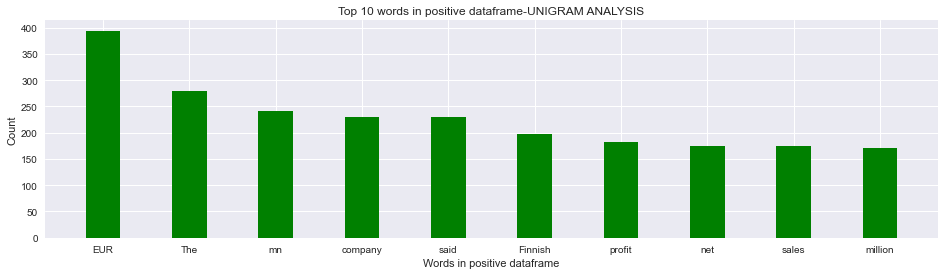

In [30]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1,pd2, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")
plt.savefig("positive-unigram.png")
plt.show()

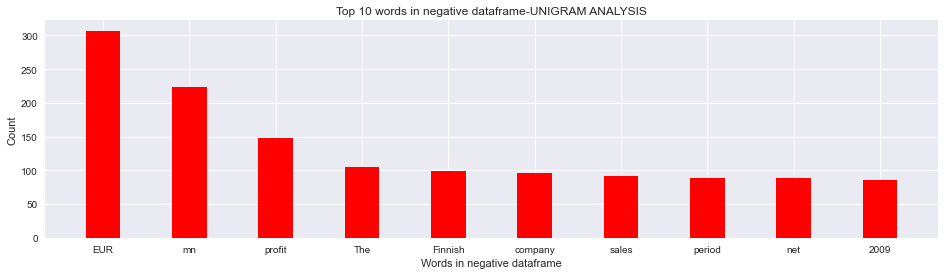

In [31]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1,ned2, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")
plt.savefig("negative-unigram.png")
plt.show()

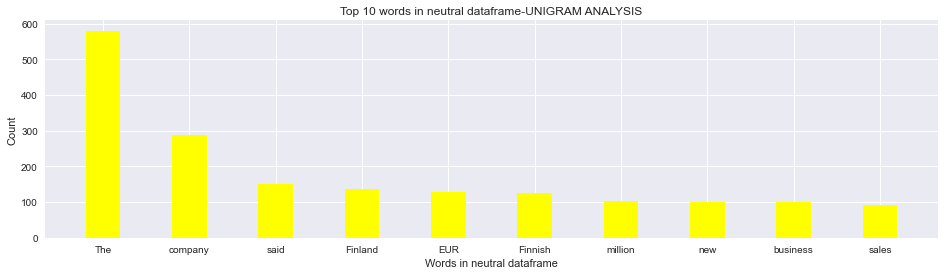

In [36]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")
plt.savefig("neutral-unigram.png")
plt.show()

# **Generating Bi grams**

In [37]:
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [38]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.Sentiments=="positive"].news:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

Sentence after removing stopwords: ['This', 'Done', 'Logistics', 'largest', 'order', 'Norway', 'diversified', 'group', 'said']
Sentence after removing stopwords: ['Of', 'sales', 'price', 'sales', 'gain', '31', 'mln', 'euro', '45', 'mln', 'recognized', 'Incap', 'earnings', '2007']
Sentence after removing stopwords: ['Atria', 'Group', 'leading', 'Scandinavian', 'meat', 'products', 'group']
Sentence after removing stopwords: ['Tiimari', 'Latvian', 'representative', 'Ineta', 'Zaharova', 'said', 'company', 'earned', 'LVL', '122000', '2005', 'profit', '20', 'times', '2004']
Sentence after removing stopwords: ['The', 'company', 'also', 'compensated', 'acting', 'reserve', 'batch', 'plant']
Sentence after removing stopwords: ['In', 'reporting', 'period', 'company', 'operating', 'profit', 'grew', '432', 'EUR', '6', 'million']
Sentence after removing stopwords: ['SvyturysUtenos', 'Alus', 'controlled', 'Nordic', 'group', 'Baltic', 'Beverages', 'Holding', 'BBH', 'posted', '61', 'percent', 'growth',

Sentence after removing stopwords: ['Net', 'sales', 'however', 'increase', '2005']
Sentence after removing stopwords: ['By', 'implementing', 'software', 'Finnish', 'Army', 'aims', 'unify', 'improve', 'operations', 'application', 'areas', 'QPR', 'Software', 'stated']
Sentence after removing stopwords: ['Net', 'sales', 'increased', 'EUR655m', 'April', 'June', '2010', 'EUR438m', 'year', 'earlier']
Sentence after removing stopwords: ['Kazgiprotsvetmet', 'Outotec', 'Finland', 'signed', 'agreement', 'strategic', 'cooperation', 'marketing', 'providing', 'minerals', 'processing', 'metallurgical', 'plants', 'related', 'services', 'Kazakhstan', 'surrounding', 'countries']
Sentence after removing stopwords: ['All', 'Raisio', 'divisions', 'recorded', 'operating', 'profit']
Sentence after removing stopwords: ['Finnish', 'consulting', 'engineering', 'group', 'Poyry', 'Plc', 'OMX', 'Helsinki', 'POY', 'said', 'Wednesday', '1', 'October', 'awarded', 'contract', 'Tanqia', 'Dibba', 'FZC', 'ownerengineer'

Sentence after removing stopwords: ['Incap', 'Contract', 'Manufacturing', 'Services', 'Pvt', 'Ltd', 'subsidiary', 'Incap', 'Corporation', 'Finland', 'plans', 'double', 'revenues', '20072008']
Sentence after removing stopwords: ['Finnish', 'airline', 'Finnair', 'deal', 'UK', 'public', 'sector', 'official', 'airline', 'flights', 'London', 'Heathrow', 'Osaka', 'Japan', 'well', 'flights', 'Manchester', 'UK', 'Helsinki', 'Finland']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '1107', 'mn', 'EUR', '865', 'mn']
Sentence after removing stopwords: ['However', 'Simdax', 'remain', 'available', 'markets', 'already', 'approved', 'marketing', 'authorisations', 'submitted', 'applications', '40', 'countries', 'Orion', 'added']
Sentence after removing stopwords: ['The', 'buy', 'recommendation', 'reiterated']
Sentence after removing stopwords: ['Net', 'cash', 'flow', 'operations', 'expected', 'remain', 'positive']
Sentence after removing stopwords: ['Known', 'Post', 'Bank', 'concept

Sentence after removing stopwords: ['The', 'transactions', 'would', 'increase', 'earnings', 'per', 'share', 'first', 'quarter', 'EUR0', '28']
Sentence after removing stopwords: ['Elcoteq', 'proven', 'track', 'record', 'electronics', 'manufacturing', 'services', 'EMS', 'global', 'factory', 'network', 'coupled', 'modern', 'manufacturing', 'equipment', 'consistent', 'systems', 'processes']
Sentence after removing stopwords: ['Lining', 'stone', 'sales', 'also', 'good', 'early', 'autumn', 'order', 'books', 'strong', 'end', 'year']
Sentence after removing stopwords: ['Operating', 'profit', 'rose', '269', 'EUR', '1058', '834', 'million']
Sentence after removing stopwords: ['We', 'pleased', 'fine', 'cooperation', 'two', 'countries', 'recent', 'times', 'said']
Sentence after removing stopwords: ['Finnish', 'Ahlstrom', 'Corporation', 'double', 'investments', 'new', 'specialty', 'glassfiber', 'reinforcement', 'plant', 'South', 'Carolina', 'US']
Sentence after removing stopwords: ['Clothing', 'cha

Sentence after removing stopwords: ['This', 'contract', 'demonstrates', 'ability', 'apply', 'minerals', 'metals', 'technologies', 'adjacent', 'industries', 'oil', 'shale', 'processing']
Sentence after removing stopwords: ['Finnish', 'operator', 'Elisa', 'Aker', 'Yards', 'signed', 'longterm', 'service', 'deal', 'Elisa', 'deliver', 'necessary', 'voice', 'data', 'services', 'Aker', 'Yards', 'Finland']
Sentence after removing stopwords: ['The', 'company', 'make', 'marketing', 'sales', 'investments', 'initiated', '2009', 'even', 'efficient', '2010']
Sentence after removing stopwords: ['Having', 'China', 'based', 'operation', 'enable', 'us', 'fully', 'leverage', 'resources', 'expertise', 'wireless', 'solutions', 'also', 'strengthen', 'capability', 'offer', 'industryleading', 'products', 'customers', 'China']
Sentence after removing stopwords: ['Finnish', 'Okmetic', 'manufactures', 'processes', 'silicon', 'wafers', 'semiconductor', 'sensor', 'industries', 'Norwegian', 'solar', 'wafer', 'compa

Sentence after removing stopwords: ['Componenta', 'increased', 'stake', 'Turkish', 'steel', 'company', 'Doktas', 'Dokumculuk', 'Ticaret', 'Sanayi', 'AS', '926', 'pct', 'stake', 'March', '2007']
Sentence after removing stopwords: ['Finnish', 'Metso', 'supply', 'new', 'wood', 'handling', 'bleaching', 'lines', 'well', 'rebuild', 'kraft', 'liner', 'washing', 'line', 'Klabin', 'Tel\x97maco', 'Borba', 'mill', 'Brazilian', 'state', 'Paranè']
Sentence after removing stopwords: ['Actions', 'improve', 'operational', 'efficiency', 'adjust', 'operations', 'expected', 'deliver', 'annualised', 'permanent', 'cost', 'savings', 'around', 'EUR', '45', 'million', 'effected', 'mostly', 'first', 'half', '2010']
Sentence after removing stopwords: ['Nordea', 'Group', 'operating', 'profit', 'increased', '2010', '18', 'percent', 'yearonyear', '364', 'billion', 'euros', 'total', 'revenue', '3', 'percent', '933', 'billion', 'euros']
Sentence after removing stopwords: ['In', 'Q1', '2010', 'Bank', 'land', 'net', '

Sentence after removing stopwords: ['The', 'company', 'said', 'started', 'investigate', 'streamlining', 'operations', 'order', 'meet', 'tightening', 'competition', 'mobile', 'phone', 'charger', 'market']
Sentence after removing stopwords: ['The', 'company', 'scheduled', 'traffic', 'measured', 'revenue', 'passenger', 'kilometres', 'RPK', 'grew', '2', 'nearly', '3', 'passengers', 'carried', 'scheduled', 'flights', 'February', '2009']
Sentence after removing stopwords: ['Tallink', 'claims', 'watertight', 'doors', 'Vana', 'Tallinn', 'Regina', 'Baltica', 'including', 'electrical', 'systems', 'fully', 'working', 'order']
Sentence after removing stopwords: ['Production', 'capacity', 'rise', 'gradually', '170000', 'tonnes', '215000', 'tonnes']
Sentence after removing stopwords: ['A', 'portion', '125', 'million', 'recorded', 'part', 'winnings', 'prior', 'patent', 'dispute', 'Finnish', 'phone', 'maker', 'Nokia', 'Oyj']
Sentence after removing stopwords: ['Section', 'Regional', 'News', 'The', 'de

Sentence after removing stopwords: ['The', 'price', 'raw', 'material', 'aluminium', 'went', 'end', '2005', 'company', 'considers', 'outlook', '2006', 'favourable']
Sentence after removing stopwords: ['The', 'purchase', 'operations', 'part', 'YIT', 'strategy', 'expand', 'offering', 'building', 'system', 'services', 'geographically']
Sentence after removing stopwords: ['The', 'CL51', 'designed', 'measure', 'cloud', 'base', 'height', 'vertical', 'visibility', 'weather', 'conditions', 'makes', 'ideal', 'instrument', 'meteorological', 'applications', 'rely', 'reliable', 'cloud', 'height', 'detection']
Sentence after removing stopwords: ['Cost', 'savings', 'rise', '20', 'mln', 'eur', 'year', '2007', 'OKO', 'said']
Sentence after removing stopwords: ['Finnish', 'lifting', 'equipment', 'maker', 'Kone', 'Oyj', 'said', 'October', '4', '2007', 'order', 'worth', '15', 'mln', 'euro', '212', 'mln', 'deliver', 'total', '53', 'custom', 'designed', 'elevators', 'Norwegian', 'shipbuilder', 'Aker', 'Yard

Sentence after removing stopwords: ['Digia', 'said', 'consolidated', 'net', 'sales', 'JanuaryJune', '2010', 'EUR67', '8', '97', 'period', '2009', 'EUR61', '9']
Sentence after removing stopwords: ['For', 'Telenor', 'three', 'half', 'year', 'contract', 'worth', 'estimated', '126', 'YIT', 'chosen', 'Telenor', 'Elisa', 'principal', 'suppliers', 'ICT', 'solutions', 'Norway', 'Sweden', 'Denmark', 'Finland']
Sentence after removing stopwords: ['Tieto', 'looking', 'energy', 'solution', 'would', 'best', 'support', 'idea', 'sustainable', 'development', 'happy', 'able', 'provide', 'solution', 'saysJouni', 'Haikarainen', 'Vice', 'President', 'Fortum']
Sentence after removing stopwords: ['The', 'competition', 'received', 'great', 'enthusiasm', 'employees', 'goes']
Sentence after removing stopwords: ['Technopolis', 'Europe', 'leading', 'operator', 'technoparks']
Sentence after removing stopwords: ['The', 'seminar', 'introduced', 'modern', 'clean', 'technologies', 'products', 'financial', 'tools', 's

Sentence after removing stopwords: ['Shares', 'Standard', 'Chartered', 'STAN', 'rose', '12', 'FTSE', '100', 'Royal', 'Bank', 'Scotland', 'RBS', 'shares', 'rose', '2', 'Barclays', 'shares', 'BARC', 'BCS', '17']
Sentence after removing stopwords: ['In', 'addition', 'Indian', 'market', 'new', 'plant', 'serve', 'Salcomp', 'customers', 'globally', 'company', 'said']
Sentence after removing stopwords: ['Finnish', 'Aktia', 'Group', 'operating', 'profit', 'rose', 'EUR', '175', 'mn', 'first', 'quarter', '2010', 'EUR', '82', 'mn', 'first', 'quarter', '2009']
Sentence after removing stopwords: ['Orders', 'received', 'grew', '55', 'yearonyear', 'EUR732m']
Sentence after removing stopwords: ['Comparable', 'net', 'sales', 'expected', 'increase', '10', '2008', 'line', 'group', 'target']
Sentence after removing stopwords: ['In', 'addition', 'deal', 'includes', 'call', 'option', 'enable', 'Maritim', 'Food', 'AS', 'increase', 'holding', 'Sandanger', 'AS', '51', 'future']
Sentence after removing stopword

Sentence after removing stopwords: ['15', 'December', '2010', 'FinnishGerman', 'telecoms', 'equipment', 'maker', 'Nokia', 'Siemens', 'Networks', 'said', 'today', 'contract', 'upgrade', 'radio', 'network', 'homebased', 'telecommunications', 'company', 'Elisa', 'Oyj', 'HEL', 'ELI1V']
Sentence after removing stopwords: ['Cargo', 'volume', 'grew', '7']
Sentence after removing stopwords: ['The', 'company', 'reports', 'loss', 'period', 'EUR', '04', 'mn', 'compared', 'loss', 'EUR', '19', 'mn', 'corresponding', 'period', '2005']
Sentence after removing stopwords: ['Finnish', 'IT', 'consultancy', 'Satama', 'Interactive', 'Oyj', 'posted', 'net', 'profit', '14', 'mln', 'euro', '20', 'mln', 'first', 'nine', 'months', '2007', 'compared', 'net', 'loss', '462000', 'euro', '664000', 'period', '2006']
Sentence after removing stopwords: ['ADP', 'News', 'Feb', '11', '2009', 'Finnish', 'management', 'software', 'solutions', 'provider', 'Ixonos', 'Oyj', 'HEL', 'XNS1V', 'said', 'today', 'net', 'profit', 'ro

Sentence after removing stopwords: ['Sales', 'increased', 'due', 'growing', 'market', 'rates', 'increased', 'operations']
Sentence after removing stopwords: ['18', 'January', '2010', 'Finnish', 'IT', 'consultancy', 'Trainers', 'House', 'Oyj', 'HEL', 'TRH1V', 'said', 'last', 'Friday', 'resolved', 'issue', 'EUR5m', 'hybrid', 'bond', 'domestic', 'investors', 'bid', 'strengthen', 'capital', 'structure']
Sentence after removing stopwords: ['Sales', 'climbed', '192', 'pct', '1002', 'bln', 'eur', 'surpassing', '953', 'mln', 'eur', 'consensus', 'figure']
Sentence after removing stopwords: ['We', 'continued', 'actively', 'focus', 'RD', 'position', 'offering', 'away', 'point', 'solutions', 'towards', 'dynamic', 'endtoend', 'solutions', 'Ervio', 'stated']
Sentence after removing stopwords: ['UPM', 'deliveries', 'increased', 'third', 'quarter', '4', 'percent', 'efficiency', 'operations', 'improved', 'Chief', 'Executive', 'Jussi', 'Pesonen', 'said']
Sentence after removing stopwords: ['The', 'iTune

Sentence after removing stopwords: ['Xerox', 'Stora', 'Enso', 'teamed', 'tailor', 'iGen3', 'shortrun', 'ondemand', 'packaging', 'market']
Sentence after removing stopwords: ['The', 'acquisition', 'part', 'Ramirent', 'strategy', 'strengthen', 'position', 'selected', 'locations']
Sentence after removing stopwords: ['Operating', 'profit', 'totalled', 'EUR', '830', 'mn', 'EUR', '235', 'mn', 'yearonyear']
Sentence after removing stopwords: ['The', 'subscriptions', 'increase', 'Cargotec', 'share', 'capital', 'EUR', '27060']
Sentence after removing stopwords: ['Finnish', 'Rautaruukki', 'awarded', 'contract', 'supply', 'install', 'steel', 'superstructures', 'Partihallsf¦rbindelsen', 'bridge', 'Gothenburg', 'Sweden']
Sentence after removing stopwords: ['We', 'reached', 'agreement', 'union', 'flights', 'continue', 'normal', 'Finnair', 'spokesman', 'Usko', 'Maatta', 'said']
Sentence after removing stopwords: ['Thanks', 'wide', 'contact', 'network', 'good', 'knowledge', 'market', 'business', 'envi

Sentence after removing stopwords: ['Mreal', 'sales', 'expected', 'increased', '4', 'yearonyear', 'EUR609m', 'second', 'quarter', '2010']
Sentence after removing stopwords: ['Advertising', 'circulation', 'revenues', 'grew', '34', '04', 'respectively']
Sentence after removing stopwords: ['We', 'analyzed', 'Kaupthing', 'Bank', 'Sweden', 'found', 'business', 'fits', 'well', 'Alandsbanken', 'said', 'Alandsbanken', 'chief', 'executive', 'Peter', 'Wiklof', 'statement']
Sentence after removing stopwords: ['The', 'last', 'quarter', 'best', 'quarter', '2009', 'net', 'sales', 'operating', 'margin', 'rose', '122']
Sentence after removing stopwords: ['AUSTIN', 'Texas', 'Sept', '6', 'Texas', 'Department', 'Of', 'Transportation', 'awards', 'contract', 'Teleste', 'Video', 'Compression', 'Distribution', 'Equipment']
Sentence after removing stopwords: ['Last', 'year', 'Finnair', 'recorded', '326percent', 'growth', 'Asian', 'sector', 'carrying', '110', 'million', 'passengers', 'two', 'continents']
Sente

Sentence after removing stopwords: ['We', 'glad', 'long', 'cooperation', 'SODRA', 'continues', 'comments', 'StigGoran', 'Sandberg', 'Affecto', 'Area', 'Manager', 'Baltic', 'operations']
Sentence after removing stopwords: ['Finnish', 'P¦yry', 'awarded', 'engineering', 'contract', 'CFR', 'national', 'railway', 'company', 'Romania']
Sentence after removing stopwords: ['In', 'September', '2010', 'Finnish', 'group', 'agreed', 'buy', 'Danish', 'company', 'Rose', 'Poultry', 'AS', 'EUR23', '9', 'combination', 'cash', 'stock']
Sentence after removing stopwords: ['Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', 'said', 'today', 'frame', 'contract', 'valued', 'EUR2m', 'implement', 'next', 'phase', 'insurance', 'application', 'South', 'African', 'Mutual', 'Federal', 'Insurance', 'Company', 'Limited', 'MF']
Sentence after removing stopwords: ['In', '2006', 'company', 'intends', 'invest', 'significantly', 'expanding', 'distribution', 'maintenance', 'network']
Sentence after removing stopw

Sentence after removing stopwords: ['There', 'recovery', 'base', 'metals', 'prices', 'increased', 'demand', 'metals', 'China', 'however']
Sentence after removing stopwords: ['YIT', 'Construction', 'town', 'RiihimÆki', 'signed', 'lease', 'contract', 'whereby', 'town', 'occupy', 'Travel', 'Centre', 'office', 'facilities']
Sentence after removing stopwords: ['BasWare', 'CEO', 'Ilkka', 'Sihvo', 'comments', 'conjunction', 'Interim', 'Report', 'As', 'whole', 'BasWare', 'succeeded', 'well', 'second', 'quarter', '2007']
Sentence after removing stopwords: ['Russia', 'top', 'container', 'shipping', 'group', 'Fesco', 'Finnish', 'logistics', 'company', 'Nurminen', 'Logistics', 'started', 'pilot', 'project', 'offering', 'clients', 'direct', 'intermodal', 'transportation', 'service', 'Finland', 'Asia', 'Pacific', 'countries', 'Fesco', 'said', 'statement']
Sentence after removing stopwords: ['The', 'optimization', 'steel', 'components', 'heating', 'process', 'reduce', 'energy', 'consumption']
Sentenc

Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equipment', 'steady', '2006', 'Amer', 'report', 'said']
Sentence after removing stopwords: ['The', 'combination', 'services', 'enabling', 'us', 'offer', 'complex', 'strengthened', 'service', 'chain', 'limited', 'Baltic', 'port', 'connections', 'also', 'getting', 'access', 'world', 'wide', 'Grimaldi', 'Network', 'Mediterranean', 'Africa', 'North', 'America', 'says', 'Uwe', 'Bakosch']
Sentence after removing stopwords: ['Operating', 'profit', 'ninemonth', 'period', 'increased', 'EUR13', '6', 'net', 'sales', 'increased', 'EUR394', '7', 'compared', 'corresponding', 'period', '2005']
Sentence after removing stopwords: ['This', 'acquisition', 'supports', 'strategy', 'close', 'customers', 'around', 'world', 'offering', 'equipment', 'related', 'services']
Sentence after removing stopwords: ['The', 'Ministry', 'Water', 'Tanzania', 'awarded', 'Poyry', 'water', 'sanitation', 'engineering', 'assignment

In [39]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df[df.Sentiments=="negative"].news:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

Sentence after removing stopwords: ['Many', 'commercial', 'vessels', 'got', 'stuck', 'narrow', 'Bay', 'Bothnia', 'ice', 'thicker', 'around', 'Aaland', 'islands']
Sentence after removing stopwords: ['They', 'also', 'upset', 'machinery', 'work', 'taken', 'Poland']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '16', 'mn', '2005', 'compared', 'EUR', '59', 'mn', '2004']
Sentence after removing stopwords: ['Capital', 'expenditure', 'energy', 'efficiency', 'unfortunately', 'fallen', 'along', 'decline', 'economy']
Sentence after removing stopwords: ['The', 'production', 'liquidated', 'June', '2009', '325', 'employees', 'loose', 'jobs']
Sentence after removing stopwords: ['The', 'operating', 'margin', 'came', '24', '57']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'loss', 'EUR0', '24']
Sentence after removing stopwords: ['Exports', 'goods', 'fell', '59', 'imports', '167']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'dropped', 'E

Sentence after removing stopwords: ['Last', 'year', '83', 'million', 'passengers', 'flew', 'airline', '4', 'percent', '2007']
Sentence after removing stopwords: ['Most', 'permanent', 'layoffs', 'plywood', 'sawn', 'timber', 'sectors', 'Finnish', 'company', 'operations', 'several', 'domestic', 'mills', 'earlier', 'year', 'temporarily', 'laid', '1200', 'workers', 'save', 'costs']
Sentence after removing stopwords: ['The', 'layoffs', 'affect', '240', 'people', 'total', '320', 'Okmetic', 'employees', 'Finland']
Sentence after removing stopwords: ['Finnish', 'retail', 'software', 'developer', 'Aldata', 'Solution', 'Oyj', 'reported', 'net', 'loss', '117', 'mln', 'euro', '172', 'mln', '2007', 'versus', 'net', 'profit', '25', 'mln', 'euro', '37', 'mln', '2006']
Sentence after removing stopwords: ['Finnish', 'GeoSentric', 'net', 'sales', 'decreased', 'EUR', '939000', 'JanuaryMarch', '2009']
Sentence after removing stopwords: ['In', 'September', 'alone', 'market', 'declined', '102', 'percent', 'y

Sentence after removing stopwords: ['The', 'Finnish', 'company', 'previously', 'said', 'operating', 'result', 'lower', 'breakeven', 'posted', 'year', 'earlier']
Sentence after removing stopwords: ['It', 'disappointment', 'see', 'plan', 'folded']
Sentence after removing stopwords: ['In', 'building', 'home', 'improvement', 'trade', 'sales', 'decreased', '63', 'totalling', 'EUR', '1541', 'mn']
Sentence after removing stopwords: ['YIT', 'lodged', 'counter', 'claims', 'Neste', 'Oil', 'totaling', 'EUR25m', 'primarily', 'based', 'work', 'carried', 'contract', 'additional', 'costs', 'incurred', 'due', 'prolongation', 'project']
Sentence after removing stopwords: ['Sales', 'Tiimari', 'business', 'went', '8', 'EUR', '118', 'million', 'Gallerix', 'stores', 'saw', '29', 'growth', 'EUR', '2', 'million']
Sentence after removing stopwords: ['Finnish', 'power', 'supply', 'solutions', 'systems', 'provider', 'Efore', 'Oyj', 'said', 'net', 'loss', 'widened', '32', 'mln', 'euro', '42', 'mln', 'first', 'qu

Sentence after removing stopwords: ['And', 'US', 'energy', 'executives', 'say', 'high', 'steel', 'prices', 'threatening', 'energy', 'exploration']
Sentence after removing stopwords: ['As', 'result', 'negotiations', 'company', 'terminate', 'total', '5', 'employment', 'contracts']
Sentence after removing stopwords: ['On', 'top', 'US', 'Commerce', 'Department', 'published', 'worsethanexpected', 'construction', 'spending', 'figures', 'November']
Sentence after removing stopwords: ['Changes', 'market', 'situation', 'tougher', 'price', 'competition', 'substantially', 'reduced', 'demand', 'bread', 'packaging', 'manufactured', 'Kauhava', 'plant', 'according', 'company']
Sentence after removing stopwords: ['Hobby', 'Hall', 'sales', 'decrease', '26', 'pct', 'due', 'implementing', 'new', 'information', 'system', 'involved', 'changing', 'principal', 'posting', 'sales']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Corporation', 'makes', 'wet', 'wipes', 'nonwovens', 'flexible', 'packa

Sentence after removing stopwords: ['According', 'company', 'staff', 'laid', 'temporarily', 'necessary']
Sentence after removing stopwords: ['Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', 'HEL', 'AFE1V', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '115000', 'USD', '152000', 'second', 'quarter', '2010', 'profit', 'EUR', '845000', 'corresponding', 'period', 'year', 'earlier']
Sentence after removing stopwords: ['Elisa', 'CEO', 'Sami', 'Seppanen', 'said', 'EMT', 'slogan', 'Best', 'coverage', 'across', 'Estonia', 'clearly', 'gives', 'misleading', 'information', 'consumers']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', '2005', 'decreased', 'EUR1', '87', 'EUR1', '89', '2003']
Sentence after removing stopwords: ['The', 'majority', 'company', 'personnel', 'Finland', 'temporarily', 'laid', 'one', 'six', 'weeks', 'period', 'February', 'June', '2009', 'period']
Sentence after removing stopwords: ['Group', 'EBIT', 'first', 'half', 'EUR13', '6', 'US', '1

Sentence after removing stopwords: ['EMSA', 'Deputy', 'Chairman', 'Board', 'Juri', 'Lember', 'told', 'BNS', 'Wednesday', 'first', 'time', 'heard', 'strike', 'Swedish', 'side', 'informed', 'Estonian', 'union', 'yet']
Sentence after removing stopwords: ['In', 'building', 'home', 'improvement', 'trade', 'net', 'sales', 'totalled', 'EUR', '1173', 'mn', 'EUR', '1566', 'mn', 'year', 'earlier']
Sentence after removing stopwords: ['The', 'company', 'said', 'sales', 'three', 'months', 'end', 'March', 'slid', 'EUR86', '4', 'US', '1134', 'EUR91', '2', 'last', 'year']
Sentence after removing stopwords: ['Operating', 'profit', 'excluding', 'nonrecurring', 'items', 'EUR', '78', 'million', 'compared', 'EUR', '112', 'million']
Sentence after removing stopwords: ['The', 'offer', 'deemed', 'low', 'Finnlines', 'board', 'stands', '4', 'pm', 'tomorrow']
Sentence after removing stopwords: ['FSecure', 'also', 'point', 'logical', 'weakness', 'sequenced', 'numbers', 'card', 'approach', 'apparently', 'already',

Sentence after removing stopwords: ['After', 'Chuck', 'Smith', 'laid', 'May', '30', '90000', 'housing', 'consultant', 'job', 'wife', 'cut', 'spending', 'half', 'family', 'six', 'rely', 'wife', 'income', 'alone']
Sentence after removing stopwords: ['ADPnews', 'Jul', '17', '2009', 'Finlandbased', 'steel', 'maker', 'Rautaruukki', 'Oyj', 'Ruukki', 'HEL', 'RTRKS', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '184', 'million', 'USD', '2597', 'first', 'half', '2009', 'net', 'profit', 'EUR', '2']
Sentence after removing stopwords: ['18', 'March', '2010', 'A', 'leakage', 'gypsum', 'pond', 'detected', 'today', 'Talvivaara', 'mine']
Sentence after removing stopwords: ['Operating', 'profit', 'nonrecurring', 'items', 'EUR', '83', 'mn', 'first', 'nine', 'months', '2008', 'compared', 'EUR', '84', 'corresponding', 'period', '2007']
Sentence after removing stopwords: ['In', 'Q1', '2009', 'company', 'result', 'taxes', 'continuing', 'operations', 'excluding', 'nonrecurring', 'items', 'totalled', 'EU

Sentence after removing stopwords: ['At', '1033', 'Huhtamaki', 'market', 'biggest', 'faller', '869', 'pct', 'lower', '1135', 'eur', 'OMX', 'Helsinki', '25', '032', 'pct', 'higher', '333241', 'OMX', 'Helsinki', '047', 'pct', '1168732']
Sentence after removing stopwords: ['Revenue', 'slightly', 'x20ac', '495', 'million', '634', 'million', 'compared', 'x20ac', '497', 'million', 'year', 'earlier']
Sentence after removing stopwords: ['Viking', 'Line', 'canceled', 'services']
Sentence after removing stopwords: ['As', 'result', 'company', 'temporarily', 'layoff', '25', 'whole', 'personnel', 'approximately', '270', 'persons', 'Kirkkonummi', 'Nivala', 'factories']
Sentence after removing stopwords: ['We', 'see', 'market', 'continues', 'tight', 'magazine', 'papers', 'target', 'close', 'deals', 'end', 'year']
Sentence after removing stopwords: ['In', '2009', 'Comptel', 'slipped', 'net', 'loss', 'EUR2', '1', 'profit', 'EUR6', '6', 'previous', 'year']
Sentence after removing stopwords: ['Konecranes

In [40]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df[df.Sentiments=="neutral"].news:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['The', 'mill', 'raw', 'material', 'need', 'increase', '100000', 'm3', 'wood']
Sentence after removing stopwords: ['ND', 'Not', 'disclosed']
Sentence after removing stopwords: ['It', 'even', 'little', 'bit', 'higher', 'Yara', 'multiples', 'analyst', 'Helsinki', 'said']
Sentence after removing stopwords: ['Bioheapleaching', 'makes', 'extraction', 'metals', 'low', 'grade', 'ore', 'economically', 'viable']
Sentence after removing stopwords: ['Finnlines', 'said', 'deal', 'part', 'strategy', 'focus', 'core', 'businesses']
Sentence after removing stopwords: ['The', 'contract', 'covers', 'new', 'energyefficient', 'AC', 'drives', 'designed', 'cooperation', 'companies']
Sentence after removing stopwords: ['The', 'changes', 'readership', 'significant']
Sentence after removing stopwords: ['The', 'value', 'deal', 'disclosed']
Sentence after removing stopwords: ['In', '2007', 'Huhtamaki', 'continue', 'invest', 'organic', 'growth']
Sentence after removing stopwords

Sentence after removing stopwords: ['Von', 'Koskull', 'oversee', 'new', 'unit', 'Nordea', 'brings', 'together', 'corporate', 'merchant', 'banking', 'financial', 'institutions', 'capital', 'markets', 'products', 'divisions']
Sentence after removing stopwords: ['Proline', 'Plus', 'mechanical', 'liquid', 'handling', 'device', 'robust', 'design', 'suitable', 'types', 'applications']
Sentence after removing stopwords: ['Mr', 'KR', 'Vasantha', 'appointed', 'Managing', 'Director', 'Incap', 'Contract', 'Manufacturing', 'Services', 'Pvt', 'Ltd']
Sentence after removing stopwords: ['The', 'composite', 'body', 'coated', 'hard', 'coating', 'layer', 'produced', 'thermal', 'spraying', 'coating', 'ground']
Sentence after removing stopwords: ['Basware', 'Business', 'Transactions', 'Service', 'enables', 'customer', 'receive', 'send', 'invoices', 'electronic', 'format']
Sentence after removing stopwords: ['Kemira', 'headquartered', 'Helsinki', 'Finland', 'international', 'chemicals', 'group', 'comprisin

Sentence after removing stopwords: ['The', 'market', 'share', 'Volkswagen', 'passenger', 'cars', 'Finland', '101', 'percent', 'Audi', 'market', 'share', '31', 'percent', 'Seat', 'share', '09', 'percent']
Sentence after removing stopwords: ['The', 'Court', 'decision', 'also', 'promote', 'genuine', 'competition', 'services']
Sentence after removing stopwords: ['Sanoma', 'Corporation', 'wants', 'new', 'better', 'frequency', 'Helsinki', 'metropolitan', 'area']
Sentence after removing stopwords: ['After', 'transaction', 'Danske', 'Bank', 'becomes', 'equal', 'player', 'Nordic', 'bank', 'group', 'Nordea', 'Nordic', 'countries']
Sentence after removing stopwords: ['In', 'parallel', 'TeliaSonera', 'decided', 'conduct', 'compulsory', 'acquisition']
Sentence after removing stopwords: ['Altogether', 'CapMan', 'employs', 'approximately', '150', 'people', 'Helsinki', 'Stockholm', 'Copenhagen', 'Oslo', 'Moscow', 'Luxembourg']
Sentence after removing stopwords: ['mr', 'Bakman', 'sees', 'also', 'expans

Sentence after removing stopwords: ['The', 'arrangements', 'apply', 'group', 'units', 'outside', 'Finland']
Sentence after removing stopwords: ['The', 'size', 'extension', '185', 'already', 'let', 'gross', 'area', '2830', 'sq', '30460', 'sq', 'ft']
Sentence after removing stopwords: ['As', 'part', 'new', 'strategy', 'Finnish', 'Biohit', 'planning', 'incorporate', 'diagnostics', 'business', 'separate', 'limited', 'company']
Sentence after removing stopwords: ['Mobile', 'communication', 'wireless', 'broadband', 'provider', 'Nokia', 'Inc', 'NYSE', 'NOK', 'today', 'set', 'new', 'financial', 'targets', 'forecasts', 'Nokia', 'mobile', 'device', 'industry', 'also', 'Nokia', 'Siemens', 'Networks', 'mobile', 'fixed', 'infrastructure', 'related', 'services', 'market']
Sentence after removing stopwords: ['Finnish', 'house', 'manufacturers', 'targeting', 'strongly', 'growing', 'onefamily', 'house', 'market', 'Russia']
Sentence after removing stopwords: ['A', 'CUT', 'ABOVE', 'Bring', 'outdoors', 'b

Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EUR', '004', '006']
Sentence after removing stopwords: ['In', '2007', 'Group', 'net', 'sales', 'stood', 'EUR', '22', 'million', '150', 'employees', 'end', 'June', '2008']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'whole', '2007', 'EUR', '950mn1', '000', 'mn']
Sentence after removing stopwords: ['We', 'bring', 'new', 'committed', 'leadership', 'business', 'strategic', 'knowhow', 'company', 'buy']
Sentence after removing stopwords: ['Tekla', 'provides', '3D', 'software', 'building', 'infrastructure', 'engineering', 'focus', 'building', 'information', 'modelling', 'steel', 'concrete', 'structures', 'design', 'construction']
Sentence after removing stopwords: ['Finnish', 'paper', 'maker', 'UPMKymmene', 'Corp', 'Monday', 'announced', 'sale', 'wrapping', 'unit', 'Walki', 'Wisa', 'CapMan', 'investment', 'group', 'move', 'concentrate', 'core', 'business']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['In', '2007', 'Etteplan', 'reported', 'turnover', 'EUR125', '2']
Sentence after removing stopwords: ['This', 'rating', 'AM', 'Best', 'highest', 'among', 'CIS', 'countries', 'Central', 'Eastern', 'Europe']
Sentence after removing stopwords: ['The', 'Remote', 'Radio', 'head', 'module', 'available', '4W', 'power', '25', 'GHz', '35', 'GHz', 'TDD', 'frequency', 'bands']
Sentence after removing stopwords: ['There', 'substitutes', 'AC', 'drives']
Sentence after removing stopwords: ['The', 'actions', 'include', 'cutting', 'expensive', 'weekend', 'shifts', 'freezing', 'production', 'bonus', 'system', 'general', 'costcutting', 'program']
Sentence after removing stopwords: ['In', 'today', 'business', 'preempt', 'consumers', 'want', 'said', 'Mohammed', 'Zainalabedin', 'General', 'Manager', 'Zain', 'Bahrain']
Sentence after removing stopwords: ['cents', 'Recognize', 'potential', 'partnerships', 'suppliers']
Sentence after removing stopwords: ['Tikkurila', 'inspir

Sentence after removing stopwords: ['The', 'company', 'supposed', 'deliver', 'machinery', 'veneer', 'mill', 'Tomsk', 'region', 'Russia']
Sentence after removing stopwords: ['Sanoma', 'buyer', 'target', 'said']
Sentence after removing stopwords: ['The', 'customer', 'forwarded', 'site', 'unknown', 'logged', 'first', 'number']
Sentence after removing stopwords: ['Den', 'Boschbased', 'TomTom', 'Europe', 'largest', 'maker', 'automotive', 'navigation', 'devices', 'Cayman', 'Islandsbased', 'Garmin', 'larger', 'US', 'overall']
Sentence after removing stopwords: ['Risto', 'Raty', 'Tekla', 'executive', 'vice', 'president', 'said', 'Tekla', 'Structures', 'ArchiCAD', 'cover', 'entire', 'design', 'documentation', 'workflow', 'throughout', 'construction', 'project']
Sentence after removing stopwords: ['The', 'new', 'chain', '700', 'discount', 'stores', '250', 'supermarkets']
Sentence after removing stopwords: ['The', 'annual', 'net', 'sales', 'unit', 'EUR', '5', 'million', 'currently', 'employs', '5

Sentence after removing stopwords: ['JuhaPekka', 'Weckstr¦m', 'appointed', 'President', 'telecom', 'group', 'TeliaSonera', 'Finland', 'succeed', 'Esa', 'Rautalinko']
Sentence after removing stopwords: ['We', 'pleased', 'invite', 'join', 'Mreal', 'international', 'conference', 'call', '300', 'pm', 'EET']
Sentence after removing stopwords: ['The', 'GeoSolutions', 'team', 'provides', 'intriguing', 'new', 'technology', 'combining', 'GPS', 'Mobilebased', 'technologies', 'together', 'Internetbased', 'social', 'networking']
Sentence after removing stopwords: ['We', 'hope', 'future', 'turn', 'novel', 'method', 'prevention', 'alcohol', 'tobacco', 'smoking', 'associated', 'oral', 'cancers']
Sentence after removing stopwords: ['The', 'trade', 'accordance', 'agreement', 'announced', '26', 'March', '2008']
Sentence after removing stopwords: ['On', '20', 'March', '2006', 'Stora', 'Enso', 'refused', 'comment', 'news', 'way']
Sentence after removing stopwords: ['It', 'estimated', 'consolidated', 'turn

Sentence after removing stopwords: ['Glaston', 'glass', 'processing', 'unit', 'Tamglass', 'Glass', 'Processing', 'manufacturer', 'high', 'quality', 'safety', 'glass', 'products', 'operating', 'Finland']
Sentence after removing stopwords: ['Latvia', 'Stockmann', 'shopping', 'mall', 'subsidiary', 'Finland', 'Stockmann', 'Plc']
Sentence after removing stopwords: ['In', 'terms', 'power', 'generation', 'Fortum', 'produced', '393', 'TWh', 'electricity', 'first', 'nine', 'months', '2006', 'compared', '380', 'TWh', 'period', '2005', 'according', 'figures', 'released', 'group', 'latest', 'financial', 'results']
Sentence after removing stopwords: ['Tecnomen', 'system', 'features', 'new', 'range', 'valueadded', 'services', 'prepaid', 'postpaid', 'billing', 'charging', 'rating', 'voice', 'calls', 'data', 'traffic', 'kind', 'content', 'services', 'mobile', 'fixed', 'networks']
Sentence after removing stopwords: ['In', 'way', 'industry', 'starting', 'point', 'consumers', 'needs']
Sentence after remo

Sentence after removing stopwords: ['Coffee', 'served', 'starting', '1430', 'EET', 'well', 'event']
Sentence after removing stopwords: ['The', 'company', 'operates', 'US', 'division', 'Lisle', 'Ill']
Sentence after removing stopwords: ['The', 'Russian', 'gas', 'giant', 'invested', 'another', '46', 'million', 'litas', 'company', 'late', '2004', 'owns', '995', 'percent', 'stock', 'capital', 'amounts', '86936', 'million', 'litas']
Sentence after removing stopwords: ['The', 'report', 'also', 'said', 'Nokia', 'operations', 'comprising', 'sites', 'Bochum', 'Ulm', 'Dusseldorf', 'Munich', 'Frankfurt', 'posted', 'operating', 'profit', 'interest', '246', 'mln', 'eur']
Sentence after removing stopwords: ['The', 'company', 'expects', 'net', 'sales', 'whole', '2009', 'previous', 'year', 'levels']
Sentence after removing stopwords: ['Ahlstrom', 'Corporation', 'STOCK', 'EXCHANGE', 'ANNOUNCEMENT', '722007', '1030', 'A', 'total', '56955', 'new', 'shares', 'Ahlstrom', 'Corporation', 'subscribed', 'optio

Sentence after removing stopwords: ['The', 'first', 'phase', 'logistics', 'complex', 'envisages', 'completion', '70000', 'sq', 'logistics', 'premises', 'gatehouse', 'building', 'November', '2008']
Sentence after removing stopwords: ['First', 'Industrial', 'seek', 'LEED', 'designation', 'Uponor', 'new', 'building', '282000', 'squarefoot', 'speculative', 'distribution', 'center', 'First', 'Park', 'Lakeville']
Sentence after removing stopwords: ['Residents', 'access', 'block', 'planned', 'Aleksandri', 'Street']
Sentence after removing stopwords: ['In', 'PenttilÆ', 'vision', 'important', 'reason', 'transaction', 'Russia']
Sentence after removing stopwords: ['The', 'contract', 'take', 'effect', '2009', 'five', 'ten', 'year', 'period']
Sentence after removing stopwords: ['The', 'site', 'cover', 'six', 'hectares']
Sentence after removing stopwords: ['This', 'PC', 'application', 'allows', 'users', 'copy', 'files', 'data', 'Nokia', 'mobile', 'device', 'computer', 'well', 'create', 'backup', 'co

Sentence after removing stopwords: ['The', 'share', 'subscription', 'period', 'expire', '30', 'September', '2007']
Sentence after removing stopwords: ['The', 'casing', 'comprises', 'first', 'side', 'casing', 'member', 'provided', 'first', 'side', 'vat', 'segment', 'second', 'side', 'casing', 'member', 'provided', 'second', 'side', 'vat', 'segment', 'least', 'first', 'side', 'casing', 'member', 'pivotable', 'rotation', 'axis']
Sentence after removing stopwords: ['Pohjola', 'act', 'manager', 'issue', 'bond', 'listed', 'NASDAQ', 'OMX', 'Helsinki', 'Ltd']
Sentence after removing stopwords: ['ITG', 'share', 'deal', 'estimated', '500000', 'euro', '627000']
Sentence after removing stopwords: ['Operating', 'profit', 'quarter', 'AprilJune', '2006', 'amounted', 'EUR42', '9', 'net', 'sales', 'EUR156', '3']
Sentence after removing stopwords: ['At', 'request', 'Finnish', 'media', 'company', 'Alma', 'Media', 'newspapers', 'research', 'manager', 'Jari', 'Kaivooja', 'Finland', 'Futures', 'Research', '

Sentence after removing stopwords: ['It', 'wo', 'nt', 'happen', 'overnight']
Sentence after removing stopwords: ['The', 'company', 'publish', 'financial', 'statement', '2008', 'February', '25', '2009']
Sentence after removing stopwords: ['Honkarakenne', 'mainly', 'exports', 'large', 'luxury', 'log', 'houses', 'Russia', 'used', 'onefamily', 'houses', 'holiday', 'homes', '70', 'sales', 'go', 'Moscow', 'region', '20', 'St', 'Petersburg', 'region', 'remainder', 'locations']
Sentence after removing stopwords: ['It', 'decided', 'auditors', 'reimbursed', 'according', 'invoice']
Sentence after removing stopwords: ['The', 'parties', 'therefore', 'agreed', 'leave', 'Avena', 'deal']
Sentence after removing stopwords: ['The', 'operator', 'one', '6', 'operators', 'granted', 'WiMAX', 'license', 'Taiwan', 'hopes', 'first', 'launch', 'commercial', 'services', 'early', '2009']
Sentence after removing stopwords: ['May', '29', '2010', 'CompaniesandMarketscom', 'delivered', 'Newstex', 'This', 'report', 'p

Sentence after removing stopwords: ['The', 'contract', 'worth', 'EUR', '1', 'million']
Sentence after removing stopwords: ['The', 'paper', 'industry', 'deinking', 'sludge', 'produced', 'mills', 'use', 'recycled', 'fiber', 'printing', 'ink', 'removed', 'recovered', 'paper', 'also', 'suitable', 'raw', 'material']
Sentence after removing stopwords: ['One', 'largest', 'projects', 'magazine', 'division', 'SanomaWSOY', 'Sanoma', 'Magazines', 'International', '2006', 'became', 'launch', 'Russian', 'magazine', 'Gloriya']
Sentence after removing stopwords: ['The', 'measures', 'taken', 'cause', 'onetime', 'costs', 'final', 'part', '2006']
Sentence after removing stopwords: ['National', 'sponsors', 'The', 'Big', 'Read', 'include', 'National', 'Endowment', 'Arts', 'cooperation', 'Institute', 'Museum', 'Library', 'Services', 'Arts', 'Midwest']
Sentence after removing stopwords: ['Estimations', 'indicate', 'even', '170', 'different', 'tablet', 'computers', 'reading', 'devices', 'available', '2011']


Sentence after removing stopwords: ['The', 'major', 'part', 'deliveries', 'include', 'different', 'AC', 'CXE', 'amplifier', 'solutions', 'products', 'Belgian', 'DINH', 'Telecom', 'broadband', 'solutions', 'company', 'acquired', 'Teleste', 'spring', '2007']
Sentence after removing stopwords: ['The', 'resignation', 'effect', 'immediately']
Sentence after removing stopwords: ['After', 'two', 'companies', 'sat', 'sewed', 'present', 'deal']
Sentence after removing stopwords: ['Finnish', 'Talvivaara', 'Mining', 'Co', 'HEL', 'TLV1V', 'said', 'Thursday', 'picked', 'BofA', 'Merrill', 'Lynch', 'JPMorgan', 'NYSE', 'JPM', 'joint', 'bookrunners', 'planned', 'issue', 'convertible', 'notes', 'worth', 'EUR250m', 'USD332m']
Sentence after removing stopwords: ['Salcomp', 'charger', 'manufacturing', 'plant', 'India', 'located', 'Nokia', 'Telecom', 'Park', 'state', 'Tamil', 'Nadu', 'eastern', 'part', 'India']
Sentence after removing stopwords: ['The', 'store', 'located', 'Poznan', 'shopping', 'center', 'n

Sentence after removing stopwords: ['News', 'Corp', 'MySpacecom', 'Web', 'site', 'display', 'submissions', 'expanded', 'Broadband', 'Emmy', 'Awards', 'part', 'effort', 'identify', 'aspiring', 'video', 'artists']
Sentence after removing stopwords: ['Ruukki', 'included', 'DJSI', 'World', 'second', 'year', 'running', 'European', 'DJSI', 'STOXX', 'third', 'year', 'running']
Sentence after removing stopwords: ['These', 'tests', 'part', 'larger', 'campaign', 'includes', 'various', 'customer', 'trials', 'demonstrations', 'make', 'LTE', '800', 'MHz', 'commercially', 'viable', 'summer', 'Nokia', 'Siemens', 'head', 'LTE', 'business', 'line', 'Reino', 'Tammela', 'said']
Sentence after removing stopwords: ['The', 'hosting', 'mobile', 'terminal', 'guides', 'information', 'flow', 'participating', 'terminals', 'optionally', 'network', 'servers', 'may', 'assist', 'hosting', 'mobile', 'terminal']
Sentence after removing stopwords: ['Following', 'acquisitions', 'Panostaja', 'establish', 'new', 'business

Sentence after removing stopwords: ['Ethanol', 'would', 'made', 'barley', 'production', 'could', 'start', '2008']
Sentence after removing stopwords: ['The', 'divested', 'company', 'part', 'TietoEnator', 'business', 'area', 'Government', 'Manufacturing', 'Retail']
Sentence after removing stopwords: ['Stora', 'Enso', 'receive', '199', 'pct', 'equity', 'interest', 'combined', 'company']
Sentence after removing stopwords: ['Alma', 'Media', 'Corporation', 'PRESS', 'RELEASE', 'March', '25', '2010', 'TYRVN', 'SANOMAT', 'PURCHASE', 'CONFIRMED', 'The', 'business', 'operations', 'TyrvÆÆn', 'Sanomat', 'Oy', 'transferred', 'Suomen', 'Paikallissanomat', 'Oy']
Sentence after removing stopwords: ['The', 'corrected', 'chapter', 'entirety']
Sentence after removing stopwords: ['Following', 'move', 'Stora', 'Enso', 'holding', 'NewPage', 'remain', 'unchanged']
Sentence after removing stopwords: ['The', 'Oulu', 'plant', 'employs', 'approximately', '120', 'people']
Sentence after removing stopwords: ['OTHER

Sentence after removing stopwords: ['After', 'transaction', 'Tikkurila', 'powder', 'coatingsrelated', 'operations', 'company', 'said']
Sentence after removing stopwords: ['Stockholm', '3', 'March', '2011', 'About', 'Cybercom', 'The', 'Cybercom', 'Group', 'hightech', 'consultancy', 'offers', 'global', 'sourcing', 'endtoend', 'solutions']
Sentence after removing stopwords: ['Following', 'increase', 'Huhtamaki', 'Oyj', 'registered', 'share', 'capital', 'EUR', '35870629000', 'number', 'shares', 'outstanding', '105501850']
Sentence after removing stopwords: ['Elcoteq', 'SE', 'Stock', 'Exchange', 'Announcement', 'February', '4', '2009', '1000', 'EET', 'Elcoteq', 'publish', 'financial', 'statements', 'bulletin', '2008', 'Wednesday', 'February', '11', '900', 'EET']
Sentence after removing stopwords: ['The', 'sale', 'comprising', 'margarine', 'business', 'Finland', 'Poland', 'follows', 'approval', 'Polish', 'competition', 'authorities', 'earlier', 'October']
Sentence after removing stopwords: [

Sentence after removing stopwords: ['At', 'stage', 'maximum', '60000', 'Tulikivi', 'Series', 'A', 'shares', 'acquired', 'representing', '016', 'per', 'cent', 'company', '\x93', 'shares', 'outstanding']
Sentence after removing stopwords: ['However', 'two', 'previously', 'ordered', 'sets', 'start', 'producing', 'electricity', 'end', 'October', '2010', 'said']
Sentence after removing stopwords: ['Huhtamaki', 'rigid', 'plastic', 'consumer', 'goods', 'operations', 'mainly', 'Europe', 'separated', 'new', 'reporting', 'segment', '1', 'January', '2009']
Sentence after removing stopwords: ['Financial', 'terms', 'nt', 'disclosed']
Sentence after removing stopwords: ['Thanks', 'Nokia', 'Lulu', 'I', 'proud', 'published', 'His', 'novel', 'found']
Sentence after removing stopwords: ['The', 'Company', 'operates', 'four', 'principal', 'divisions', 'Consumer', 'Packaging', 'Office', 'Papers', 'Speciality', 'Papers', 'well', 'Market', 'Pulp', 'Energy']
Sentence after removing stopwords: ['Rubin', 'says'

Sentence after removing stopwords: ['Every', 'partner', 'allowed', 'buy', 'quantity', 'electricity', 'corresponding', 'share', 'consortium', 'production', 'cost', 'letter', 'intent', 'said']
Sentence after removing stopwords: ['Finnish', 'power', 'company', 'Fortum', 'reports', '89', 'electricity', 'generated', 'without', 'carbon', 'dioxide', 'emissions', '2007']
Sentence after removing stopwords: ['South', 'America', 'Asia', 'promising', 'markets']
Sentence after removing stopwords: ['The', 'original', 'patent', 'filed', 'Finland', 'application', 'No']
Sentence after removing stopwords: ['Votorantim', 'Celulose', 'e', 'Papel', 'VCP', 'part', 'Votorantim', 'Group', 'major', 'Brazilian', 'conglomerate']
Sentence after removing stopwords: ['The', 'executive', 'said', 'countries', 'Brazil', 'Chile', 'Argentina', 'Mexico', 'lead', 'adoption', 'business', 'Ethernet', 'services', 'segment', 'Brazil', 'Mexico', 'early', 'adopters', 'carrier', 'Ethernet', 'mobile', 'backhaul']
Sentence after r

Sentence after removing stopwords: ['ENP', 'Newswire', '22', 'March', '2011', 'Release', 'date', '21032011', 'A', 'total', '13000', 'Talvivaara', 'Mining', 'Company', 'Plc', 'new', 'shares', 'subscribed', 'period', '1', 'January', '2011', '28', 'February', '2011', 'company', 'stock', 'option', 'rights', '2007A']
Sentence after removing stopwords: ['The', 'combined', 'value', 'orders', 'almost', 'EUR', '3mn']
Sentence after removing stopwords: ['Mreal', 'start', 'statutory', 'employeremployee', 'negotiations', 'Ænekoski', 'board', 'mill', 'concern', '130', 'people']
Sentence after removing stopwords: ['The', 'company', 'distribute', 'dividend', '2005']
Sentence after removing stopwords: ['The', 'company', '120', 'employees', 'annual', 'sales', 'approximately', 'EUR16m']
Sentence after removing stopwords: ['The', 'ship', 'unloader', 'totally', 'enclosed', 'along', 'entire', 'conveying', 'line', 'storage', 'facilities']
Sentence after removing stopwords: ['As', 'August', '2008', 'Glaston'

Sentence after removing stopwords: ['An', 'invention', 'released', 'Patent', 'Office', 'said', 'The', 'chambers', 'pressurized']
Sentence after removing stopwords: ['The', 'business', 'gross', 'written', 'premiums', 'EUR152', '4', '915', '2000', 'net', 'combined', 'ratio', '133', '175', 'staff', 'total', 'offices', 'UK', 'Germany', 'Benelux']
Sentence after removing stopwords: ['An', 'EU', 'law', 'issue', 'may', 'introduced', 'around', '2010']
Sentence after removing stopwords: ['In', 'return', 'New', 'Yorkbased', 'private', 'equity', 'firm', 'receive', '51', 'stake', 'Latvian', 'IT', 'telecom', 'group']
Sentence after removing stopwords: ['The', 'value', 'contract', 'EUR1', '0', 'Poyry', 'headquartered', 'Vantaa', 'Finland', 'provides', 'consulting', 'engineering', 'services', 'energy', 'forestry', 'infrastructure', 'environment', 'sectors']
Sentence after removing stopwords: ['High', 'winds', 'also', 'toppled', 'three', 'semitrailers', 'I15', 'north', 'Barstow']
Sentence after removi

Sentence after removing stopwords: ['This', 'beauty', 'updated', 'version', 'chichi', 'loop', 'shade', 'launched', '2001']
Sentence after removing stopwords: ['As', 'alternative', 'share', 'exchange', 'Panostaja', 'offers', 'full', 'cash', 'consideration', 'value', '127', 'euro', '17', 'per', 'share']
Sentence after removing stopwords: ['The', 'planned', 'ethanol', 'energy', 'production', 'plant', 'operate', 'correlation', 'waste', 'treatment', 'unit', 'paper', 'mill']
Sentence after removing stopwords: ['The', 'total', 'value', 'contract', 'EUR', '8', 'million']
Sentence after removing stopwords: ['The', 'winners', 'included', 'Honda', 'Odyssey', 'minivan', 'Nissan', 'Armada', 'large', 'SUV']
Sentence after removing stopwords: ['Today', 'connecting', 'people', 'new', 'different', 'ways', 'fusing', 'advanced', 'mobile', 'technology', 'personalized', 'services', 'enable', 'people', 'stay', 'close', 'matters']
Sentence after removing stopwords: ['The', 'company', 'US', 'subsidiary', 'Vai

Sentence after removing stopwords: ['In', 'February', '2011', 'new', 'wording', 'Identity', 'Documents', 'Act', 'makes', 'Mobile', 'ID', 'stateapproved', 'electronic', 'document', 'February', '1st', '2011', 'entered', 'force']
Sentence after removing stopwords: ['EQ', 'Bank', 'forecasts', 'Olvi', 'net', 'sales', 'EUR', '67mn', 'second', 'quarter', '2009', 'operating', 'profit', 'EUR', '64', 'mn']
Sentence after removing stopwords: ['Previously', 'company', 'also', 'delivered', '70', 'steel', 'used', 'Oasis', 'Seas', 'Allure', 'Seas', 'sister', 'ship', 'completed', 'last', 'year']
Sentence after removing stopwords: ['Mr', 'Mikko', 'Saavalainen', 'head', 'Comptel', 'Global', 'Sales', 'concludes', 'Gibtelecom', 'provides', 'perfect', 'illustration', 'variety', 'business', 'technical', 'regulatory', 'challenges', 'operators', 'facing', 'OSS', 'today']
Sentence after removing stopwords: ['EQT', 'completed', 'exit', 'Salcomp', 'Finnish', 'company', 'makes', 'mobile', 'phone', 'chargers', 'se

Sentence after removing stopwords: ['After', 'completion', 'acquisition', 'Poyry', 'oil', 'gas', 'expertise', 'cover', 'multidiscipline', 'engineering', 'consulting', 'services', 'across', 'complete', 'oil', 'gas', 'asset', 'lifecycle', 'including', 'deepwater', 'engineering', 'services']
Sentence after removing stopwords: ['In', 'addition', 'stake', 'MegaFon', 'Telecominvest', 'currently', 'owns', '100', 'shares', 'Web', 'Plus', 'St', 'Petersburg', 'Payphones', '51', 'telecom', 'equipment', 'producer', 'PeterServis', 'number', 'minor', 'assets']
Sentence after removing stopwords: ['China', 'Unicom', 'NYSE', 'CHU', 'HKSE', '0762', 'SHSE', '600050', 'second', 'largest', 'mobile', 'carrier', 'country']
Sentence after removing stopwords: ['US', 'District', 'Judge', 'Douglas', 'P', 'Woodlock', 'yesterday', 'extended', 'Jan', '17', 'temporary', 'restraining', 'order', 'March', '7']
Sentence after removing stopwords: ['The', 'aim', 'CEO', 'QA', 'sessions', 'give', 'clarity', 'information', '

Sentence after removing stopwords: ['The', 'total', 'service', 'concept', 'also', 'includes', 'technology', 'services', 'Raute', 'supports', 'customers', 'throughout', 'entire', 'life', 'cycle', 'investments']
Sentence after removing stopwords: ['Metsaliitto', 'sell', '11', 'million', 'B', 'shares', 'Neomarkka', 'accounting', '183', 'pct', 'Neomarkka', 'equity', '127', 'pct', 'voting', 'rights']
Sentence after removing stopwords: ['Protalix', '42', 'million', 'cash', 'sales']
Sentence after removing stopwords: ['He', 'wore', 'black', 'beanietype', 'cap', 'black', 'jacket']
Sentence after removing stopwords: ['This', 'amount', 'included', 'pensionable', 'salary']
Sentence after removing stopwords: ['In', '2005', 'Cargotec', 'net', 'sales', 'exceeded', 'EUR', '23', 'billion']
Sentence after removing stopwords: ['CORPORATE', 'IT', 'UPDATE', 'C', '19952009', 'M2', 'COMMUNICATIONS', 'LTD', 'Finnish', 'technology', 'group', 'Teleste', 'Corporation', 'OMX', 'Helsinki', 'TLT1V', 'reported', 'W

Sentence after removing stopwords: ['The', 'markets', 'expect', 'Heineken', 'sell', 'Hartwall', 'whole', 'parts']
Sentence after removing stopwords: ['The', 'measures', 'result', 'statutory', 'joint', 'negotiations', 'employees', 'started', 'February', 'concerned', 'operations', 'country']
Sentence after removing stopwords: ['The', 'service', 'also', 'enables', 'users', 'watch', 'emails', 'HTML', 'format', 'en', 'enhanced', '23', 'addition', 'languages', 'choose']
Sentence after removing stopwords: ['The', 'Swedish', 'player', 'became', 'majority', 'owner', 'UCell', 'mid2007']
Sentence after removing stopwords: ['Enclosed', 'Affecto', 'call', 'Extraordinary', 'General', 'Meeting', 'held', 'July', '10th', 'main', 'agenda', 'approve', 'authorization', 'Board', 'proposed', 'share', 'issue', 'related', 'Component', 'Software', 'acquisition', 'elect', 'Haakon', 'Skaarer', 'Affecto', 'board']
Sentence after removing stopwords: ['Founded', '1994', 'company', 'uses', 'sixstep', 'timefocused', 

Sentence after removing stopwords: ['The', 'machine', 'annual', 'production', 'capacity', '200000', 'tonnes', 'supercalendered', 'magazine', 'paper', 'paper', 'grades', 'based', 'recovered', 'fiber', 'Stora', 'Enso', 'said']
Sentence after removing stopwords: ['Latin', 'America', 'currently', 'accounts', 'approximately', '40', 'sales', 'Finnish', 'BSSOSS', 'VAS', 'supplier', 'telecoms', 'operators', 'Tecnotree', 'company', 'president', 'CEO', 'Eero', 'Mertano', 'told', 'BNamericas']
Sentence after removing stopwords: ['Kesko', '2000', 'stores', 'engaged', 'chain', 'operations', 'Nordic', 'Baltic', 'countries', 'Russia', 'Belarus']
Sentence after removing stopwords: ['Mreal', 'Corporation', 'Stock', 'Exchange', 'Release', '27', 'August', '2009', '315', 'pm', 'Mreal', 'received', 'EUR', '190', 'million', 'cash', 'payment', 'Sappi', 'Mreal', 'Corporation', 'part', 'MetsÆliitto', 'Group', 'divested', 'Graphic', 'Papers', 'business', 'Sappi', 'Limited', 'end', '2008', 'EUR', '750', 'million

Sentence after removing stopwords: ['Entire', 'paper', 'mills', 'may', 'set', 'especially', 'new', 'EU', 'member', 'states']
Sentence after removing stopwords: ['The', 'Moscow', 'Metro', 'wwwmosmetroru', 'first', 'metro', 'system', 'Europe', 'implement', 'smart', 'cards', 'together', 'new', 'type', 'magnetic', 'card', '1998']
Sentence after removing stopwords: ['The', 'hull', 'vessel', 'built', 'one', 'block', 'time', 'Ruukki', 'delivered', 'plate', 'material', 'block', 'construction', 'progressed']
Sentence after removing stopwords: ['According', 'HK', 'Ruokatalo', 'almost', 'meat', 'used', 'company', 'comes', 'Finland']
Sentence after removing stopwords: ['POYRY', 'PLC', 'Additional', 'information', 'Heikki', 'Malinen', 'President', 'CEO', 'Poyry', 'PLC', 'tel', '358', '10', '33', '21307', 'Poyry', 'global', 'expert', 'consulting', 'engineering']
Sentence after removing stopwords: ['The', 'project', '2', 'x', '600', 'MW', 'coalfired', 'power', 'plant', 'located', '420', 'km', 'south'

Sentence after removing stopwords: ['The', 'deliveries', 'started', 'April', '2006', 'completed', '2007']
Sentence after removing stopwords: ['RD', 'Loan']
Sentence after removing stopwords: ['The', 'recruits', 'completed', 'Kretailer', 'trainee', 'program', 'qualified', 'start', 'career', 'independent', 'retailers', 'Kstores']
Sentence after removing stopwords: ['Currently', 'Glaston', 'employs', 'approximately', '1500', 'persons']
Sentence after removing stopwords: ['Janis', 'Arbidans', 'CEO', 'YIT', 'Celtnieciba', 'said', 'company', 'focusing', 'housing', 'real', 'estate', 'development', 'market']
Sentence after removing stopwords: ['Mr', 'Doring', 'Eaton', 'since', '1989', 'acted', 'Business', 'Unit', 'Manager', 'Eaton', 'Power', 'Controls', 'Business', 'Unit', 'since', 'January', '2007']
Sentence after removing stopwords: ['production', 'facilities', '6', 'July', '2010', 'Finnish', 'investment', 'group', 'Neomarkka', 'Oyj', 'HEL', 'NEMBV', 'said', 'today', 'buy', 'former', 'produc

Sentence after removing stopwords: ['There', 'room', 'modify', 'share', 'component', 'already', 'indicated']
Sentence after removing stopwords: ['It', 'comes', 'complete', 'LCD', 'touch', 'screen', 'system', 'selection', 'chosen', 'function', 'prices', 'start', 'around', 'pounds', '4805', 'mark']
Sentence after removing stopwords: ['So', 'present', 'time', 'Nokian', 'tires', 'contract', 'tires', 'production', 'China']
Sentence after removing stopwords: ['This', 'corrensponds', '4628', 'percent', 'Okmetic', 'share', 'capital', 'voting', 'rights']
Sentence after removing stopwords: ['Rihko', 'said', 'sale', 'enable', 'company', 'concentrate', 'grainbased', 'business']
Sentence after removing stopwords: ['In', '2006', '452', 'million', 'tonnes', 'CO2', 'EUA', 'EU', 'Allowance', 'emissions', 'credit', 'EU', 'traded', 'underlying', 'market', 'value', 'approx']
Sentence after removing stopwords: ['This', 'wood', 'lacquered', 'clock', 'comes', 'stripy', 'handcrocheted', 'cover']
Sentence afte

Sentence after removing stopwords: ['The', 'compnay', 'also', 'said', 'would', 'lower', 'price', 'development', 'projects', 'one', 'third', 'compared', 'last', 'November']
Sentence after removing stopwords: ['Production', 'plant', 'based', 'Neste', 'Oil', 'proprietary', 'technology', 'use', 'flexible', 'input', 'vegetable', 'oil', 'animal', 'fat']
Sentence after removing stopwords: ['His', 'resignation', 'take', 'effect', 'immediately']
Sentence after removing stopwords: ['The', 'sale', 'Savcor', 'FACE', 'Cencorp', 'result', 'profit', 'loss', 'yet', 'determined', 'owing', 'factors', 'including', 'valuation', 'consideration', 'shares', 'received', 'prevailing', 'exchange', 'rates']
Sentence after removing stopwords: ['The', 'expanded', 'plant', 'scheduled', 'operational', 'middle', 'October', '2009']
Sentence after removing stopwords: ['The', 'Group', '\x93', 'profit', 'taxes', 'EUR', '02', '78', 'million']
Sentence after removing stopwords: ['In', 'AprilJune', '2008', 'Scanfil', 'net',

Sentence after removing stopwords: ['The', 'summer', 'collection', '2008', 'joyfully', 'fresh', 'like', 'vitamin', 'injection', 'said', 'HM', 'head', 'design', 'Margareta', 'van', 'den', 'Bosch']
Sentence after removing stopwords: ['Proha', 'Plc', 'Euronext', '7327', 'announced', 'today', '19', 'May', 'fullyowned', 'subsidiary', 'Safran', 'Software', 'Solutions', 'AS', 'agreed', 'sell', '49', 'share', 'Safran', 'North', 'America', 'LLC', 'SNA', 'Holding', 'AS', 'investment', 'group', 'based', 'Norway']
Sentence after removing stopwords: ['Social', 'networking', 'locationbased', 'service', 'trends', 'comprise', 'significant', 'share', 'Internet', 'traffic', 'today', 'appealing', 'MID', 'users']
Sentence after removing stopwords: ['The', 'study', 'expected', 'provide', 'proof', 'pharmacodynamic', 'activity', 'humans', 'corroborate', 'safety', 'profile', 'establish', 'dose', 'ranges', 'therapeutic', 'studies']
Sentence after removing stopwords: ['About', '36', 'came', 'Aspo', 'Chemicals',

Sentence after removing stopwords: ['The', 'report', 'goes', 'provide', 'detailed', 'profiles', 'ten', 'leading', 'European', 'specialty', 'chemicals', 'companies', 'brief', 'profiles', 'major', 'players']
Sentence after removing stopwords: ['With', 'government', 'exempting', 'certain', 'stainless', 'steel', 'products', 'antidumping', 'duties', 'Finlandbased', 'Outokumpu', 'today', 'said', 'look', 'enter', 'supply', 'pacts', 'Indian', 'Railways', 'soon']
Sentence after removing stopwords: ['In', '2010', 'Marimekko', 'Group', 'net', 'sales', 'EUR', '73297', 'thousand', 'EUR', '72473', 'thousand', 'operating', 'profit', 'EUR', '8169', 'thousand', 'EUR', '6291', 'thousand']
Sentence after removing stopwords: ['Under', 'contract', 'Ericsson', 'double', 'number', 'radio', 'base', 'stations', 'Elisa', 'network', 'coming', 'year']


# **Sorting data in descending order**

In [41]:
df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

In [42]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

In [43]:
ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

In [44]:
nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

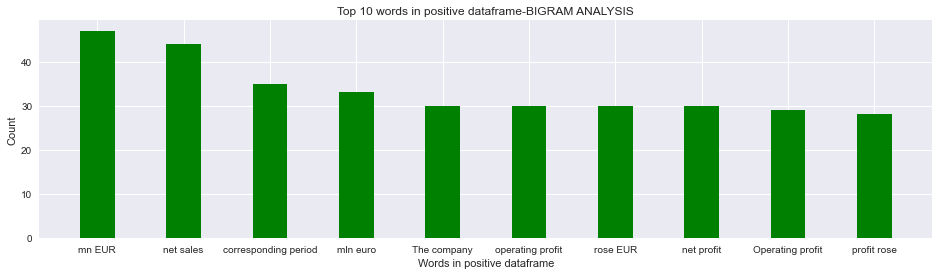

In [45]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1bi,pd2bi, color ='green',width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")
plt.savefig("positive-bigram.png")
plt.show()

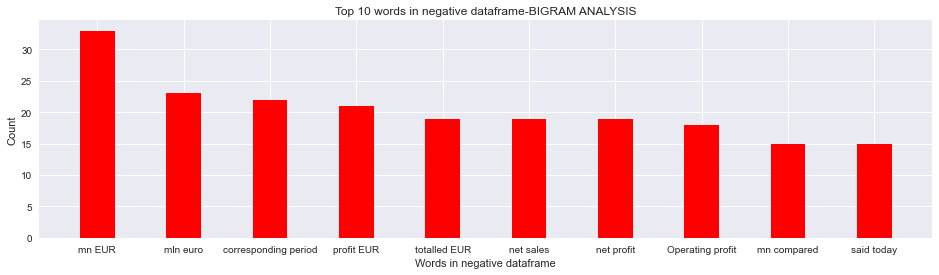

In [46]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")
plt.savefig("negative-bigram.png")
plt.show()

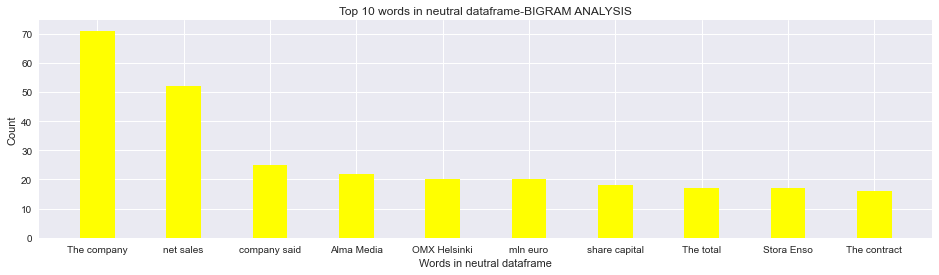

In [47]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")
plt.savefig("neutral-bigram.png")
plt.show()

In [48]:
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [49]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df[df.Sentiments=="positive"].news:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

Sentence after removing stopwords: ['This', 'Done', 'Logistics', 'largest', 'order', 'Norway', 'diversified', 'group', 'said']
Sentence after removing stopwords: ['Of', 'sales', 'price', 'sales', 'gain', '31', 'mln', 'euro', '45', 'mln', 'recognized', 'Incap', 'earnings', '2007']
Sentence after removing stopwords: ['Atria', 'Group', 'leading', 'Scandinavian', 'meat', 'products', 'group']
Sentence after removing stopwords: ['Tiimari', 'Latvian', 'representative', 'Ineta', 'Zaharova', 'said', 'company', 'earned', 'LVL', '122000', '2005', 'profit', '20', 'times', '2004']
Sentence after removing stopwords: ['The', 'company', 'also', 'compensated', 'acting', 'reserve', 'batch', 'plant']
Sentence after removing stopwords: ['In', 'reporting', 'period', 'company', 'operating', 'profit', 'grew', '432', 'EUR', '6', 'million']
Sentence after removing stopwords: ['SvyturysUtenos', 'Alus', 'controlled', 'Nordic', 'group', 'Baltic', 'Beverages', 'Holding', 'BBH', 'posted', '61', 'percent', 'growth',

Sentence after removing stopwords: ['Kesko', 'Agro', 'Lietuva', 'agricultural', 'machinery', 'grain', 'trader', 'another', 'member', 'Kesko', 'Group', 'boosted', 'sales', '429', 'percent', '134', 'million', 'euros', 'VAT', 'inclusive']
Sentence after removing stopwords: ['Citigroup', 'Inc', 'NYSE', 'C', 'announced', 'Global', 'Transaction', 'Services', 'GTS', 'business', 'awarded', 'new', 'mandate', 'Finlandbased', 'Pohjola', 'Bank', 'Group']
Sentence after removing stopwords: ['In', '2008', 'deal', 'likely', 'bring', 'savings', 'EUR', '20mn25mn']
Sentence after removing stopwords: ['Finnish', 'cutlery', 'hand', 'tools', 'maker', 'Fiskars', 'Oyj', 'Abp', 'HEL', 'FISAS', 'said', 'today', 'net', 'profit', 'rose', 'EUR', '241', 'million', 'USD', '336', 'third', 'quarter', '2010', 'EUR', '179', 'million', 'year', 'earlier']
Sentence after removing stopwords: ['Sports', 'equipment', 'sales', 'also', 'progressed', 'well', 'owing', 'prolonged', 'winter', 'season']
Sentence after removing stop

Sentence after removing stopwords: ['Finnish', 'airline', 'Finnair', 'deal', 'UK', 'public', 'sector', 'official', 'airline', 'flights', 'London', 'Heathrow', 'Osaka', 'Japan', 'well', 'flights', 'Manchester', 'UK', 'Helsinki', 'Finland']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '1107', 'mn', 'EUR', '865', 'mn']
Sentence after removing stopwords: ['However', 'Simdax', 'remain', 'available', 'markets', 'already', 'approved', 'marketing', 'authorisations', 'submitted', 'applications', '40', 'countries', 'Orion', 'added']
Sentence after removing stopwords: ['The', 'buy', 'recommendation', 'reiterated']
Sentence after removing stopwords: ['Net', 'cash', 'flow', 'operations', 'expected', 'remain', 'positive']
Sentence after removing stopwords: ['Known', 'Post', 'Bank', 'concept', 'would', 'see', 'Fidelity', 'Bank', 'rolling', '75', 'offices', 'Ghana', 'Post', 'premises', 'provide', 'financial', 'services', 'people']
Sentence after removing stopwords: ['Ruukki', 'for

Sentence after removing stopwords: ['According', 'Finnish', 'pension', 'insurance', 'company', 'Varma', 'Varma', 'recipient', 'two', 'thirds', 'revenue', 'earningsrelated', 'pension', 'cover', 'competitive', 'tendering', 'Finland']
Sentence after removing stopwords: ['The', 'company', 'plans', 'expand', 'international', 'market', 'subsidiaries', 'distributors', '2011', 'onwards']
Sentence after removing stopwords: ['Also', 'bringing', 'right', 'kind', 'people', 'upgrade', 'human', 'resources']
Sentence after removing stopwords: ['Finnish', 'energy', 'company', 'Fortum', 'Oyj', 'said', 'November', '13', '2007', 'granted', 'environmental', 'permit', 'build', 'biofuelfired', 'combined', 'heat', 'power', 'CHP', 'plant', 'Vartan', 'harbor', 'eastern', 'Stockholm']
Sentence after removing stopwords: ['agreement', 'SHB', '30', 'December', '2009', 'Finnish', 'financial', 'services', 'group', 'Aktia', 'HEL', 'AKTAV', 'concluded', 'market', 'making', 'agreement', 'Svenska', 'Handelsbanken', 'STO

Sentence after removing stopwords: ['According', 'ACNielsen', 'ScanTrack', 'study', 'period', 'week', '10', '2005', 'week', '9', '2006', 'CocaCola', 'market', 'leader', 'soft', 'drinks', 'Finland']
Sentence after removing stopwords: ['The', 'members', 'management', 'team', 'contribute', 'adjustment', 'measures', 'temporary', 'salary', 'cut', '5']
Sentence after removing stopwords: ['In', 'second', 'quarter', '2010', 'group', 'net', 'profit', 'rose', 'EUR3', '1', 'EUR2', '5', 'AprilJune', '2009']
Sentence after removing stopwords: ['We', 'love', 'Activision', 'fresh', 'colorful', 'approach', 'Rapala', 'We', 'Fish', 'said', 'Kelly', 'Brockpahler', 'Rapala']
Sentence after removing stopwords: ['TeliaSonera', 'said', '100', 'million', 'invested', 'next', 'year', 'region', 'bring', 'mobile', 'coverage', '90', 'Nepal', 'population']
Sentence after removing stopwords: ['In', 'banking', 'Sampo', 'A', 'unchanged', '1424', 'eur', 'Nordea', 'rose', '042', 'pct', '951', 'eur']
Sentence after remov

Sentence after removing stopwords: ['The', 'company', 'said', 'investments', 'new', 'market', 'areas', 'resulted', 'sales', 'increase', 'Sweden', 'Poland', 'Russia', 'Lithuania']
Sentence after removing stopwords: ['HK', 'Ruokatalo', 'accounts', '50', 'poultry', 'sales', 'Finland', 'profitability', 'good', 'level']
Sentence after removing stopwords: ['The', 'Finnish', 'government', 'announced', 'Wednesday', 'sold', '32', 'percent', 'stake', 'chemicals', 'fertilizer', 'group', 'Kemira', 'Oyj', 'x20ac', '6556', 'million', '890US', 'million', 'sending', 'company', 'share', 'price', '6', 'percent']
Sentence after removing stopwords: ['The', 'company', 'order', 'book', 'stood', '15', 'bln', 'euro', '22', 'bln', 'September', '30', '2007', '242', 'pct', 'year', 'international', 'orders', 'amounting', '365', 'mln', 'euro', '5343', 'mln']
Sentence after removing stopwords: ['In', 'Lithuania', 'operating', 'profit', 'rose', 'EUR', '190000', 'EUR', '70000', 'corresponding', 'period', '2005']
Sent

Sentence after removing stopwords: ['Finnish', 'Cargotec', 'awarded', 'significant', 'order', 'total', '292', 'Hiab', 'loader', 'cranes', 'BAE', 'Systems', 'US']
Sentence after removing stopwords: ['In', '2007', 'Marimekko', 'also', 'opened', 'concept', 'stores', 'Yokohama', 'Nagoya', 'central', 'Japan', 'Silver', 'Spring', 'metropolitan', 'Washington', 'DC', 'USA', 'Graz', 'central', 'Austria', 'Aalborg', 'northern', 'Denmark']
Sentence after removing stopwords: ['Aspocomp', 'repaid', 'interest', 'bearing', 'liability', 'Standard', 'Chartered', 'Bank', 'use', 'rest', 'consideration', 'partially', 'repay', 'interest', 'bearing', 'liabilities', 'Finland', 'improve', 'liquidity']
Sentence after removing stopwords: ['Finnish', 'telecoms', 'software', 'developer', 'Tecnomen', 'Oyj', 'said', 'December', '5', '2006', '33', 'mln', '25', 'mln', 'euro', 'order', 'supply', 'expansion', 'charging', 'messaging', 'systems', 'mobile', 'fixed', 'networks', 'Brasil', 'Telecom']
Sentence after removing

Sentence after removing stopwords: ['Operating', 'profit', 'rose', 'EUR', '47', 'mn', 'EUR', '36', 'mn']
Sentence after removing stopwords: ['Hkan', 'Dahlstr¦m', 'head', 'mobility', 'services', 'TeliaSonera', 'forecast', 'mobile', 'data', 'volume', 'TeliaSonera', 'network', 'Sweden', 'rise', 'eightfold', '200000', 'TB', '2014']
Sentence after removing stopwords: ['It', 'also', 'said', 'third', 'quarter', 'diluted', 'EPS', 'came', '034', 'eur', 'compared', '016', 'eur', 'quarter', 'year', 'ago']
Sentence after removing stopwords: ['Last', 'month', 'Outokumpu', 'sold', '80', 'percent', 'technology', 'unit', 'Outokumpu', 'Technology', 'Oyj', 'strategic', 'goal', 'becoming', 'world', 'largest', 'stainless', 'steel', 'maker']
Sentence after removing stopwords: ['The', 'company', 'said', 'observed', 'current', 'stabilisation', 'prices', 'potential', 'higher', 'prices', 'deliveries', 'first', 'quarter', '2011']
Sentence after removing stopwords: ['In', 'second', 'quarter', '2010', 'Raute', 'n

Sentence after removing stopwords: ['Finnish', 'forest', 'machinery', 'manufacturer', 'Ponsse', 'agreed', 'Volvo', 'start', 'cooperation', 'Latin', 'America']
Sentence after removing stopwords: ['Other', 'carriers', 'handset', 'makers', 'spin', 'positive', 'event', 'raise', 'interest', 'higherend', 'phones', 'pricier', 'data', 'plans']
Sentence after removing stopwords: ['While', 'concerns', 'remain', 'longer', 'term', 'size', 'scale', 'may', 'enable', 'Nokia', 'hold', 'newfound', 'margin', 'improvements', 'near', 'term', 'analyst', 'wrote']
Sentence after removing stopwords: ['Consolidated', 'operating', 'profit', 'excluding', 'oneoff', 'items', 'EUR', '306', 'mn', 'EUR', '296', 'mn', 'year', 'earlier']
Sentence after removing stopwords: ['In', 'JanuarySeptember', '2007', 'Finnlines', 'net', 'sales', 'rose', 'EUR', '5054', 'mn', 'EUR', '4735', 'mn', 'corresponding', 'period', '2006']
Sentence after removing stopwords: ['Deliveries', 'started', 'network', 'ready', 'launch', 'soon']
Sen

Sentence after removing stopwords: ['Operating', 'loss', 'EUR', '179mn', 'compared', 'loss', 'EUR', '188mn', 'second', 'quarter', '2009']
Sentence after removing stopwords: ['The', 'Brazilian', 'unit', 'Finnish', 'security', 'solutions', 'provider', 'FSecure', 'signed', '1500', 'new', 'clients', 'last', 'year', 'online', 'news', 'source', 'Reseller', 'Web', 'quoted', 'division', 'commercial', 'director', 'Vladimir', 'Brando', 'saying']
Sentence after removing stopwords: ['Both', 'operating', 'profit', 'net', 'sales', 'threemonth', 'period', 'increased', 'respectively', 'EUR15', '1', 'EUR131', '5', 'compared', 'corresponding', 'period', '2005']
Sentence after removing stopwords: ['The', 'fair', 'value', 'investment', 'properties', 'totaled', 'EUR', '25349', 'mn', 'EUR', '24551', 'mn', '2006']
Sentence after removing stopwords: ['EPS', 'grew', '004', 'eur', '002', 'eur']
Sentence after removing stopwords: ['It', 'provides', 'customers', 'industryleading', 'elevators', 'escalators', 'inno

Sentence after removing stopwords: ['Brazilian', 'nonprofit', 'interbank', 'Camara', 'Interbancaria', 'de', 'Pagamentos', 'CIP', 'acquired', 'solutions', 'US', 'business', 'integration', 'solutions', 'provider', 'Sterling', 'Commerce', 'latter', 'company', 'said', 'statement']
Sentence after removing stopwords: ['More', '200', 'volunteers', 'Fiskars', 'garden', 'tool', 'company', 'Home', 'Depot', 'NYSE', 'HD', 'city', 'Baltimore', 'neighborhood', 'working', 'right', 'create', 'garden', 'sanctuary', 'single', 'day']
Sentence after removing stopwords: ['The', 'objective', 'planned', 'measures', 'achieve', 'significant', 'savings', 'next', 'years']
Sentence after removing stopwords: ['Kesko', 'car', 'import', 'retailing', 'business', 'VVAuto', 'saw', 'sales', 'grow', '171', 'pct']
Sentence after removing stopwords: ['Tieto', 'offers', 'Aktia', 'good', 'foundation', 'required', 'support', 'services', 'implementing', 'update', 'project', 'says', 'Juha', 'Volotinen', 'responsible', 'Aktia', 

Sentence after removing stopwords: ['Also', 'LemminkÆinen', 'profit', 'accounting', 'period', 'went', 'EUR', '31', 'mn', 'EUR', '245', 'mn', 'year', 'ago']
Sentence after removing stopwords: ['VDW', 'combined', 'LXE', 'devices', 'enhances', 'productivity', 'enabling', 'workers', 'use', 'single', 'device', 'perform', 'voice', 'scanning', 'keyboard', 'functions']
Sentence after removing stopwords: ['The', 'Basware', 'Connectivity', 'services', 'allow', 'companies', 'handle', 'purchase', 'pay', 'processes', 'online', 'make', 'internal', 'processes', 'efficient', 'said', 'CEO', 'Ilkka', 'Sihvo', 'Basware', 'Corporation']
Sentence after removing stopwords: ['Metso', 'supply', 'equipment', 'two', 'process', 'lines', 'Northland', 'Resources', 'new', 'Kaunisvaara', 'iron', 'ore', 'project', 'Sweden', 'exploits', 'Tapuli', 'Sahavaara', 'iron', 'ore', 'deposits']
Sentence after removing stopwords: ['Talentum', 'expects', 'net', 'sales', 'core', 'business', 'increase', '2008', 'compared', '2007']

Sentence after removing stopwords: ['Theodosopoulos', 'said', 'Tellabs', 'could', 'value', 'Nokia', 'Siemens', 'Nortel', 'given', 'leading', 'supply', 'status', 'Verizon', 'along', 'highgrowth', 'products']
Sentence after removing stopwords: ['Last', 'year', 'Lemminkainen', 'completed', 'Kouvola', 'Ksupermarket', 'contract']
Sentence after removing stopwords: ['Its', 'board', 'directors', 'propose', 'dividend', 'EUR0', '12', 'per', 'share', '2010', 'EUR0', '08', 'per', 'share', 'paid', '2009']
Sentence after removing stopwords: ['The', 'acquisition', 'Boomeranger', 'Boats', 'Oy', 'line', 'Done', 'Solutions', 'strategy', 'developing', 'business', 'company', 'acquisitions']
Sentence after removing stopwords: ['HELSINKI', 'AFX', 'KCI', 'Konecranes', 'said', 'raised', 'stake', 'MMH', 'Holdings', 'Inc', 'owner', 'USbased', 'Morris', 'Materials', 'Handling', '909', 'pct', '745', 'pct']
Sentence after removing stopwords: ['Mreal', 'sales', 'expected', 'increased', '4', 'yearonyear', 'EUR609m'

Sentence after removing stopwords: ['We', 'glad', 'long', 'cooperation', 'SODRA', 'continues', 'comments', 'StigGoran', 'Sandberg', 'Affecto', 'Area', 'Manager', 'Baltic', 'operations']
Sentence after removing stopwords: ['Finnish', 'P¦yry', 'awarded', 'engineering', 'contract', 'CFR', 'national', 'railway', 'company', 'Romania']
Sentence after removing stopwords: ['In', 'September', '2010', 'Finnish', 'group', 'agreed', 'buy', 'Danish', 'company', 'Rose', 'Poultry', 'AS', 'EUR23', '9', 'combination', 'cash', 'stock']
Sentence after removing stopwords: ['Finnish', 'IT', 'solutions', 'provider', 'Affecto', 'Oyj', 'said', 'today', 'frame', 'contract', 'valued', 'EUR2m', 'implement', 'next', 'phase', 'insurance', 'application', 'South', 'African', 'Mutual', 'Federal', 'Insurance', 'Company', 'Limited', 'MF']
Sentence after removing stopwords: ['In', '2006', 'company', 'intends', 'invest', 'significantly', 'expanding', 'distribution', 'maintenance', 'network']
Sentence after removing stopw

Sentence after removing stopwords: ['The', 'announced', 'investment', 'carmaker', 'Hyundai', 'example', 'sounds', 'optimistically', 'us', 'course', 'new', 'cars', 'mean', 'new', 'tires']
Sentence after removing stopwords: ['The', 'company', 'intensifying', 'smelter', 'operations', 'increasing', 'annual', 'production', 'capacity', '230000', 'tonnes', 'copper']
Sentence after removing stopwords: ['Stockmann', 'Swedish', 'sector', 'company', 'AB', 'Lindex', 'entered', 'agreement', 'September', '30', '2007', 'whereby', 'Stockmann', 'whollyowned', 'subsidiary', 'make', 'public', 'tender', 'offer', 'Lindex', 'issued', 'shares']
Sentence after removing stopwords: ['Finnair', 'PLC', 'carried', 'record', '88', 'million', 'passengers', '2006', 'increase', '35', 'percent', 'previous', 'year', 'Finnish', 'national', 'carrier', 'reported', 'Tuesday']
Sentence after removing stopwords: ['There', 'recovery', 'base', 'metals', 'prices', 'increased', 'demand', 'metals', 'China', 'however']
Sentence aft

Sentence after removing stopwords: ['The', 'chain', 'posted', 'sales', '298', 'million', 'euros', 'full', '2005', 'rise', '195', 'percent', 'yearonyear']
Sentence after removing stopwords: ['The', 'contract', 'signed', 'August', 'Papua', 'New', 'Guineabased', 'Lihir', 'Gold', 'Ltd', 'ASX', 'LGL']
Sentence after removing stopwords: ['Finnish', 'lifting', 'equipment', 'maker', 'Konecranes', 'HEL', 'KCR1V', 'said', '29', 'July', '2009', 'raised', 'stake', 'Austrian', 'manipulator', 'maker', 'ACS', 'Konecranes', '80', 'bought', 'German', 'sector', 'player', 'Knight', 'Europe']
Sentence after removing stopwords: ['The', 'company', 'estimates', 'trend', 'demand', 'sports', 'equipment', 'steady', '2006', 'Amer', 'report', 'said']
Sentence after removing stopwords: ['The', 'combination', 'services', 'enabling', 'us', 'offer', 'complex', 'strengthened', 'service', 'chain', 'limited', 'Baltic', 'port', 'connections', 'also', 'getting', 'access', 'world', 'wide', 'Grimaldi', 'Network', 'Mediterra

In [50]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df[df.Sentiments=="negative"].news:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

Sentence after removing stopwords: ['Many', 'commercial', 'vessels', 'got', 'stuck', 'narrow', 'Bay', 'Bothnia', 'ice', 'thicker', 'around', 'Aaland', 'islands']
Sentence after removing stopwords: ['They', 'also', 'upset', 'machinery', 'work', 'taken', 'Poland']
Sentence after removing stopwords: ['Operating', 'profit', 'EUR', '16', 'mn', '2005', 'compared', 'EUR', '59', 'mn', '2004']
Sentence after removing stopwords: ['Capital', 'expenditure', 'energy', 'efficiency', 'unfortunately', 'fallen', 'along', 'decline', 'economy']
Sentence after removing stopwords: ['The', 'production', 'liquidated', 'June', '2009', '325', 'employees', 'loose', 'jobs']
Sentence after removing stopwords: ['The', 'operating', 'margin', 'came', '24', '57']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'loss', 'EUR0', '24']
Sentence after removing stopwords: ['Exports', 'goods', 'fell', '59', 'imports', '167']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'dropped', 'E

Sentence after removing stopwords: ['Finnish', 'GeoSentric', 'net', 'sales', 'decreased', 'EUR', '939000', 'JanuaryMarch', '2009']
Sentence after removing stopwords: ['In', 'September', 'alone', 'market', 'declined', '102', 'percent', 'yearonyear', '1928', 'million', 'liters']
Sentence after removing stopwords: ['The', 'staff', 'reduction', 'start', 'immediately', 'Glaston', 'added']
Sentence after removing stopwords: ['In', 'Finland', 'metal', 'sector', 'company', 'Componenta', 'laying', 'temporarily', 'staff', 'Pori', 'mill', 'Christmas', '2008', 'till', '6', 'January', '2009']
Sentence after removing stopwords: ['The', 'Group', '\x93', 'result', 'taxes', 'EUR', '19', '30', 'million']
Sentence after removing stopwords: ['The', 'terms', 'aforementioned', 'funding', 'considerably', 'Bank', 'current', 'CDS', 'levels', 'market', 'maturity', 'ranging', '1', '75', 'years']
Sentence after removing stopwords: ['We', 'also', 'cut', 'price', 'projections', 'paper', 'packaging', 'analyst', 'Gol

Sentence after removing stopwords: ['Operating', 'profit', 'fell', 'EUR', '203', 'mn', 'EUR', '742', 'mn', 'second', 'quarter', '2008']
Sentence after removing stopwords: ['Chief', 'executive', 'officer', 'OlliPekka', 'Kallasvuo', 'changes', 'Tuesday', 'mark', 'third', 'time', 'nine', 'months', 'company', 'reshuffled', 'executives', 'operations', 'Nokia', 'loses', 'ground', 'Apple', 'iPhone', 'RIM', 'BlackBerry']
Sentence after removing stopwords: ['Finnish', 'Suominen', 'Corporation', 'makes', 'wipes', 'nonwovens', 'flexible', 'packaging', 'expects', 'changes', 'market', 'situation', 'reduce', 'sales', 'Suominen', 'nonwovens', 'wet', 'wipes', 'previously', 'estimated', 'volumes']
Sentence after removing stopwords: ['Pretax', 'loss', 'totaled', 'EUR', '12', 'mn', 'profit', 'EUR', '21', 'mn', '2004']
Sentence after removing stopwords: ['Finnish', 'forest', 'industry', 'group', 'Stora', 'Enso', 'Oyj', 'issued', 'Thursday', '20', 'March', 'profit', 'warning', 'first', 'quarter', '2008']
S

Sentence after removing stopwords: ['Food', 'sales', 'totalled', 'EUR', '3235', 'mn', 'October', '2009', 'representing', 'decrease', '55', 'October', '2008']
Sentence after removing stopwords: ['In', 'October', 'UPM', 'reported', 'thirdquarter', 'net', 'loss', 'euro86', 'million', '110', 'million', 'compared', 'net', 'profit', 'euro120', 'million', '2007']
Sentence after removing stopwords: ['Antti', 'Orkola', 'president', 'Kemira', 'GrowHow', 'Industrial', 'Solutions', 'unit', 'told', 'Thomson', 'Financial', 'News', 'company', 'put', 'opening', 'mine', 'prices', 'phosphate', 'quite', 'depressed', 'long', 'time']
Sentence after removing stopwords: ['The', 'sale', 'result', 'capital', 'loss', 'EUR5m', 'Solidium', 'obtained', 'Tikkurila', 'shares', 'March', '2010']
Sentence after removing stopwords: ['Finnish', 'Scanfil', 'systems', 'supplier', 'contract', 'manufacturer', 'communications', 'sector', 'electronics', 'industry', 'reports', 'net', 'sales', 'EUR', '496', 'mn', 'first', 'quart

Sentence after removing stopwords: ['Nokia', 'share', 'price', 'fell', 'less', 'one', 'percent', '1870', 'euros', '2541', 'Helsinki', 'Siemens', 'shares', 'fell', '102', 'percent', '9019', 'euros', '12257', 'Frankfurt']
Sentence after removing stopwords: ['The', 'net', 'sales', 'decreased', 'EUR', '498', 'million', 'EUR', '599', 'million']
Sentence after removing stopwords: ['The', 'net', 'sales', 'whole', 'fiscal', 'year', '2008', 'lower', '2007', 'operating', 'profit', 'estimated', 'negative']
Sentence after removing stopwords: ['Finnish', 'insurance', 'company', 'Fennia', 'Kesko', 'Group', 'ending', 'loyal', 'customer', 'cooperation']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'first', 'half', '2007', 'amounted', 'EUR0', '29', 'EUR0', '40', 'year', 'ago']
Sentence after removing stopwords: ['Sales', 'Seppala', 'diminished', '6', 'per', 'cent']
Sentence after removing stopwords: ['20', 'October', '2010', 'Finnish', 'environmental', 'management', 'company',

Sentence after removing stopwords: ['Finnish', 'investment', 'group', 'Norvestia', 'Oyj', 'said', 'net', 'profit', 'fell', '235', 'mln', 'euro', '306', 'mln', '2006', '335', 'mln', 'euro', '436', 'mln', '2005']
Sentence after removing stopwords: ['SRV', 'lowered', 'net', 'sales', 'estimate', 'whole', '2008', 'due', 'uncertainties', 'housing', 'sales']
Sentence after removing stopwords: ['The', 'workforce', 'reduced', 'also', 'Amsterdam', 'office', 'Netherlands']
Sentence after removing stopwords: ['Finnish', 'financial', 'software', 'solutions', 'developer', 'BasWare', 'Oyj', 'said', 'net', 'profit', 'fell', '884000', 'euro', '12', 'mln', 'first', 'quarter', '2007', '20', 'mln', 'euro', '27', 'mln', 'year', 'earlier']
Sentence after removing stopwords: ['The', 'sales', 'Tiimari', 'segment', 'fell', '40', 'yearonyear', 'EUR3', '3', 'June', '2010']
Sentence after removing stopwords: ['The', 'company', 'said', 'comparable', 'operating', 'profit', 'JanuaryJune', 'period', 'fell', 'short', 

Sentence after removing stopwords: ['The', 'international', 'electronic', 'industry', 'company', 'Elcoteq', 'laid', 'tens', 'employees', 'Tallinn', 'facility', 'contrary', 'earlier', 'layoffs', 'company', 'contracted', 'ranks', 'office', 'workers', 'daily', 'Postimees', 'reported']
Sentence after removing stopwords: ['In', 'Finland', 'Hobby', 'Hall', 'sales', 'decreased', '10', 'international', 'sales', 'fell', '19']
Sentence after removing stopwords: ['ADPnews', 'Feb', '5', '2010', 'Finnish', 'real', 'estate', 'investor', 'Sponda', 'Oyj', 'HEL', 'SDA1V', 'said', 'today', 'slipped', 'net', 'loss', 'EUR', '815', 'million', 'USD', '118', '2009', 'profit', 'EUR', '293', 'million', '2008']
Sentence after removing stopwords: ['At', 'moment', 'Valio', 'worried', 'ban', 'continues', 'long', 'may', 'become', 'quite', 'problem']
Sentence after removing stopwords: ['The', 'move', 'triggered', 'weak', 'demand', 'forestry', 'equipment', 'uncertain', 'market', 'situation']
Sentence after removing s

In [51]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df[df.Sentiments=="neutral"].news:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

Sentence after removing stopwords: ['The', 'mill', 'raw', 'material', 'need', 'increase', '100000', 'm3', 'wood']
Sentence after removing stopwords: ['ND', 'Not', 'disclosed']
Sentence after removing stopwords: ['It', 'even', 'little', 'bit', 'higher', 'Yara', 'multiples', 'analyst', 'Helsinki', 'said']
Sentence after removing stopwords: ['Bioheapleaching', 'makes', 'extraction', 'metals', 'low', 'grade', 'ore', 'economically', 'viable']
Sentence after removing stopwords: ['Finnlines', 'said', 'deal', 'part', 'strategy', 'focus', 'core', 'businesses']
Sentence after removing stopwords: ['The', 'contract', 'covers', 'new', 'energyefficient', 'AC', 'drives', 'designed', 'cooperation', 'companies']
Sentence after removing stopwords: ['The', 'changes', 'readership', 'significant']
Sentence after removing stopwords: ['The', 'value', 'deal', 'disclosed']
Sentence after removing stopwords: ['In', '2007', 'Huhtamaki', 'continue', 'invest', 'organic', 'growth']
Sentence after removing stopwords

Sentence after removing stopwords: ['In', 'Switzerland', 'Teleste', 'established', 'supplier', 'products', 'long', 'time', 'primary', 'customers', 'include', 'cable', 'fibertothehome', 'FTTH', 'operators']
Sentence after removing stopwords: ['Founded', '1946', 'Strand', 'Associates', 'provides', 'civil', 'environmental', 'transportation', 'electrical', 'mechanical', 'engineering', 'services', '350', 'employees', '10', 'offices', 'Wisconsin', 'Alabama', 'Illinois', 'Indiana', 'Kentucky', 'Ohio']
Sentence after removing stopwords: ['The', 'order', 'includes', 'new', 'Crecent', 'former', 'headbox', 'reel']
Sentence after removing stopwords: ['Marketing', 'use', 'Tikkurila', 'existing', 'infra', 'structure', 'local', 'knowledge', 'Russia']
Sentence after removing stopwords: ['The', 'mentioned', 'shareholders', 'suggest', 'monthly', 'salary', 'EUR', '1400', 'would', 'paid', 'Board', 'members', 'outside', 'company']
Sentence after removing stopwords: ['The', 'desk', 'reach', 'full', 'planned

Sentence after removing stopwords: ['The', 'right', 'margin', 'viewed', 'separately', 'detail', 'every', 'customer']
Sentence after removing stopwords: ['A', 'total', '1800000', 'stock', 'options', 'issued', '2003', 'stock', 'option', 'scheme']
Sentence after removing stopwords: ['Technopolis', 'said', 'protocol', 'signed', 'technopark', 'would', 'built', 'site', 'covering', 'six', 'hectares', 'Neudorf', 'special', 'economic', 'zone', 'planned', 'invest', '200', 'million', 'euros', 'project', '2009', 'inclusive']
Sentence after removing stopwords: ['JVC', 'stop', 'producing', 'DVD', 'players', 'Brazil', 'JVC', 'Brazil', 'subsidiary', 'Japan', 'JVC', 'group', 'announced', 'stop', 'production', 'DVD', 'players', 'Brazil']
Sentence after removing stopwords: ['Under', 'plan', 'CSES', 'worked', 'together', 'Public', 'Policy', 'Management', 'Institute', 'PPMI', 'partners', 'buildings', 'total', 'area', '10000', 'square', 'meters', 'built', 'territory', 'first', 'phase']
Sentence after removi

Sentence after removing stopwords: ['BM4', 'middle', 'layer', 'headbox', 'equipped', 'dilution', 'control', 'system']
Sentence after removing stopwords: ['The', 'company', 'headquartered', 'Sievi', 'Finland', 'listed', 'Nordic', 'Exchange', 'Helsinki']
Sentence after removing stopwords: ['SCOPI', 'Chief', 'Business', 'Excellence', 'Officer', 'Eng']
Sentence after removing stopwords: ['He', 'joined', 'Rautakirja', '1997', 'lead', 'one', 'four', 'business', 'areas', 'took', 'position', 'President', 'CEO', '2001']
Sentence after removing stopwords: ['cents', 'The', 'profile', 'contains', 'business', 'operations', 'company', 'history', 'major', 'products', 'services', 'prospects', 'key', 'competitors', 'structure', 'key', 'employees', 'locations', 'subsidiaries']
Sentence after removing stopwords: ['Stora', 'Enso', 'global', 'paper', 'packaging', 'wood', 'products', 'company', 'Neste', 'Oil', 'Finnish', 'company', 'engaged', 'refining', 'marketing', 'oil', 'inaugurated', 'demonstration', '

Sentence after removing stopwords: ['The', 'value', 'total', 'investment', 'EUR', '600mn']
Sentence after removing stopwords: ['The', 'new', 'majority', 'owners', 'Aspocomp', 'Thailand', 'Co', 'Ltd', 'certain', 'private', 'persons', 'belonging', 'immediate', 'circle', 'Aspocomp', 'present', 'Joint', 'Venture', 'partner', 'Saha', 'Pathana', 'InterHolding', 'Plc']
Sentence after removing stopwords: ['already', 'good', 'position', 'technical', 'building', 'services', 'market', 'Ostrobothnia']
Sentence after removing stopwords: ['The', 'Polish', 'business', 'employs', '1000', 'people', 'net', 'sales', 'EUR', '70mn', '2007']
Sentence after removing stopwords: ['The', 'company', 'also', 'said', 'sell', 'approximately', '150', 'hectares', 'land', 'city', 'Valkeakoski', 'end', 'year', 'part', 'From', 'job', 'job', 'program']
Sentence after removing stopwords: ['New', 'Novator', 'products', 'supposed', 'exported']
Sentence after removing stopwords: ['When', 'cruising', 'revs', 'fall', 'less', '

Sentence after removing stopwords: ['Rautaruukki', 'aims', 'find', 'work', 'group', 'locations', 'made', 'redundant']
Sentence after removing stopwords: ['Moody', 'said', 'gave', 'P', 'A1', 'longterm', 'senior', 'unsecured', 'P', 'P1', 'shortterm', 'debt', 'ratings', 'Finnish', 'lender', 'Aktia', 'Bank', 'EUR1bn', 'USD1', '4', 'bn', 'euro', 'mediumterm', 'note', 'EMTN', 'program', '25', 'March', '2011']
Sentence after removing stopwords: ['The', 'fouryear', 'contract', 'bank', 'Ski', 'Sport', 'Finland', 'bring', 'bank', 'advertisements', 'skiers', 'helmets', 'caps']
Sentence after removing stopwords: ['Deliveries', 'Outotec', 'take', 'place', '30', 'months']
Sentence after removing stopwords: ['The', 'company', 'continuous', 'need', 'alloys', 'nickel', 'ferrochrome', 'molybdenum', 'manganese', 'production', 'said', 'Talvivaara']
Sentence after removing stopwords: ['Through', 'partnership', 'Finnish', 'Paulig', 'Danish', 'subsidiary', 'Oscar', 'Puljonki', 'acquired', 'sales', 'organizat

Sentence after removing stopwords: ['Tikkurila', 'division', 'Kemira', 'group', 'controls', '23', 'Russian', 'market', 'field', 'owns', 'St', 'Petersburg', 'paint', 'producer', 'TEX']
Sentence after removing stopwords: ['The', 'corresponding', 'increase', 'share', 'capital', 'due', 'subscriptions', 'warrants', 'total', 'EUR', '186074', 'registered', 'Finnish', 'Trade', 'Register', 'January', '4', '2008']
Sentence after removing stopwords: ['The', 'personnel', 'expertise', 'high', 'level', 'technology', 'play', 'major', 'role', 'Exel', 'Composites', 'operations']
Sentence after removing stopwords: ['Mr', 'McDonald', 'started', 'evening', 'set', 'featuring', 'hits', 'solo', 'career', 'Doobie', 'Brothers', 'years', 'selection', 'RB', 'cover', 'songs', 'met', 'mixed', 'results']
Sentence after removing stopwords: ['Neste', 'Oil', 'said', 'build', 'biodiesel', 'production', 'facility', 'Rotterdam', 'Netherlands', 'estimated', 'cost', '670', 'million', 'euros', 'naming', 'Francebased', 'Tech

Sentence after removing stopwords: ['The', 'order', 'also', 'includes', 'startup', 'commissioning', 'services']
Sentence after removing stopwords: ['The', 'Costanza', 'light', 'aluminum', 'base', 'washable', 'shade', 'comes', 'white', 'pistachio', 'orange', 'blue', 'red']
Sentence after removing stopwords: ['In', 'sinter', 'plant', 'limestone', 'coke', 'breeze', 'mixed', 'iron', 'ore', 'concentrate', 'sintered', 'lump', 'form', 'sinter', 'use', 'blast', 'furnaces', 'raw', 'material', 'ironmaking']
Sentence after removing stopwords: ['The', 'sale', 'oxygen', 'measurement', 'business', 'strengthens', 'goal', 'focus', 'chosen', 'market', 'segments']
Sentence after removing stopwords: ['The', 'company', 'serves', 'customers', 'various', 'industries', 'including', 'process', 'resources', 'industrial', 'machinery', 'architecture', 'building', 'construction', 'electrical', 'transportation', 'electronics', 'chemical', 'petrochemical', 'energy', 'information', 'technology', 'well', 'catering', 

Sentence after removing stopwords: ['Combined', 'Basware', 'Enterprise', 'Purchase', 'Pay', 'portfolio', 'provides', 'high', 'level', 'automation', 'procurement', 'invoice', 'workflows']
Sentence after removing stopwords: ['It', 'provide', 'heating', 'form', 'hot', 'water', 'sawmill', 'needs']
Sentence after removing stopwords: ['The', 'firm', 'builds', 'components', 'mobile', 'phones', 'communications', 'products']
Sentence after removing stopwords: ['Published', 'Globes', 'online', 'Israel', 'business', 'news', 'wwwglobesonlinecom', 'November', '16', '2009', 'Copyright', 'Globes', 'Publisher', 'Itonut', '1983', 'Ltd', '2009']
Sentence after removing stopwords: ['Igor', 'Oleg', 'Yankov', 'currently', 'manage', 'Moron', 'Vitim', 'hold', 'onto', '25', 'stake']
Sentence after removing stopwords: ['Economic', 'development', 'China', 'longer', 'taking', 'place', 'East', 'coast', 'Shanghai', 'area', 'Vauramo', 'says']
Sentence after removing stopwords: ['The', 'Russian', 'government', 'cont

Sentence after removing stopwords: ['Kirsi', 'Rantanen', 'previously', 'development', 'director', 'HK', 'Ruokatalo', 'poultry', 'business']
Sentence after removing stopwords: ['The', 'company', 'net', 'sales', '2009', 'totalled', 'MEUR', '3078', 'operating', 'margin', '135', 'per', 'cent']
Sentence after removing stopwords: ['Under', 'changes', 'envisaged', 'HK', 'Ruokatalo', 'would', 'reduce', 'number', 'industrial', 'places', 'business', 'Finland', 'eight', 'six']
Sentence after removing stopwords: ['The', 'winner', 'present', 'win']
Sentence after removing stopwords: ['128538', 'shares', 'still', 'subscribed', 'Series', 'E', 'share', 'options', 'max']
Sentence after removing stopwords: ['Amanda', 'said', 'already', 'made', 'USD5', '0', 'investment', 'commitment', 'Russia', 'Partners', 'II', 'fund', 'July', '2005']
Sentence after removing stopwords: ['Following', 'strategy', 'Tikkurila', 'established', 'fullyowned', 'sales', 'company', 'TOO', 'Tikkurila', 'Almaty', 'Kazakhstan', 'mar

Sentence after removing stopwords: ['Most', 'dividend', 'go', 'Grimaldi', 'family']
Sentence after removing stopwords: ['After', 'acquisition', 'Basware', 'preliminary', 'pro', 'forma', 'net', 'sales', '2005', 'amount', 'EUR', '526', 'mn', 'preliminary', 'pro', 'forma', 'operating', 'profit', 'amounts', 'EUR', '71', 'mn']
Sentence after removing stopwords: ['BasWare', 'Invoice', 'Processing', 'BasWare', 'Contract', 'Matching', 'BasWare', 'Order', 'Matching', 'BasWare', 'KPI', 'Reporting', 'Tool', 'part', 'BasWare', 'Enterprise', 'Purchase', 'Pay', 'product', 'suite']
Sentence after removing stopwords: ['Erkki', 'Jarvinen', 'President', 'Rautakirja', 'head', 'Sanoma', 'Trade', 'division', 'leave', 'current', 'tasks', 'spring', '2009', 'similar', 'position', 'outside', 'Sanoma', 'Group']
Sentence after removing stopwords: ['Ulefos', 'Group', 'leading', 'supplier', 'manhole', 'covers', 'Nordic', 'countries']
Sentence after removing stopwords: ['Comptel', 'Corporation', 'publish', 'financi

Sentence after removing stopwords: ['The', 'third', 'quarter', 'result', 'also', 'includes', '400000', 'euro', '575000', 'provision', 'downsizing', 'lure', 'manufacturing', 'Ireland']
Sentence after removing stopwords: ['Equipment', 'manufactured', 'Vaahto', 'workshop', 'Hollola', 'Finland', 'scheduled', 'shipments', 'first', 'quarter', '2009']
Sentence after removing stopwords: ['LONDON', 'AFX', 'Intertek', 'Group', 'PLC', 'testing', 'inspection', 'company', 'said', 'commercial', 'electrical', 'division', 'bought', 'Finlandbased', 'company', 'Natlabs', 'Oy', 'Etteplan', 'Oyj', '13', 'mln', 'eur', 'cash']
Sentence after removing stopwords: ['The', 'order', 'includes', '48', 'ship', 'cranes', 'delivered', '12', 'container', 'feeders', 'built', 'Wenchong', 'shipyard', 'China']
Sentence after removing stopwords: ['The', 'cooperation', 'involve', 'Arena', 'Partners', 'buying', '35', 'share', 'new', 'joint', 'venture', 'company', 'operating', 'Alma', 'Media', 'home', 'sales', 'vehicle', 'co

Sentence after removing stopwords: ['As', 'result', 'cancellation', 'maximum', 'increase', 'Citycon', 'share', 'capital', 'basis', 'convertible', 'bonds', 'decreased', 'EUR', '2338392780', 'EUR', '2290178475']
Sentence after removing stopwords: ['Mursula', 'said', 'tried', 'gather', 'macroeconomic', 'perspective', 'see', 'Malaysia']
Sentence after removing stopwords: ['Talvivaara', 'Mining', 'Company', 'Plc', 'Talvivaara', 'Mining', 'Company', 'internationally', 'significant', 'base', 'metals', 'producer', 'primary', 'focus', 'nickel', 'zinc', 'using', 'technology', 'known', 'bioheapleaching', 'extract', 'metals', 'ore']
Sentence after removing stopwords: ['The', 'recruitment', 'related', 'relocation', 'Stora', 'Enso', 'research', 'operations', 'Karlstad', 'central', 'Sweden']
Sentence after removing stopwords: ['The', 'fivestorey', 'ecoefficient', 'building', 'gross', 'floor', 'area', '15000', 'sq', 'It', 'also', 'include', 'apartments']
Sentence after removing stopwords: ['Customers'

Sentence after removing stopwords: ['Rockwell', 'Collins', 'provider', 'flight', 'deck', 'cabin', 'information', 'management', 'solutions', 'business', 'aircraft', 'operators']
Sentence after removing stopwords: ['Currently', 'Alfred', 'A', 'Palmberg', 'putting', 'finishing', 'touches', 'one', 'Finland', 'biggest', 'ever', 'replumbing', 'bathroom', 'refurbishment', 'projects', 'also', 'district', 'Vuosaari']
Sentence after removing stopwords: ['Lieksaare', 'Oy', 'earlier', 'regarded', 'control', 'Saarelainen', 'Oy', 'individual', 'shareholders', 'shareholder', 'agreement']
Sentence after removing stopwords: ['And', 'exactly', 'happened', 'recent', 'weekday', 'East', 'Haven', 'baker', 'brought', 'remind', 'residents', 'Easter', 'tradition', 'making', 'wheat', 'rice', 'pies']
Sentence after removing stopwords: ['Completion', 'transaction', 'subject', 'final', 'agreement', 'Due', 'Diligence', 'process']
Sentence after removing stopwords: ['Talvivaara', 'Mining', 'Company', 'PLC', 'Talviva

Sentence after removing stopwords: ['The', 'company', 'present', 'hold', 'shares']
Sentence after removing stopwords: ['According', 'shipping', 'company', 'Viking', 'Line', 'EU', 'decision', 'significant', 'financial', 'impact']
Sentence after removing stopwords: ['The', 'report', 'examines', 'medical', 'equipment', 'business', 'structure', 'operations', 'history', 'products', 'provides', 'analysis', 'key', 'medical', 'equipment', 'revenue', 'lines']
Sentence after removing stopwords: ['The', 'order', 'plywood', 'mill', 'machinery', 'equipment', 'announced', 'Finnish', 'Raute', 'September', '2006', 'delivered', 'Thebault', 'Plyland', 'France']
Sentence after removing stopwords: ['The', 'figure', 'include', 'food', 'exports', 'Finland']
Sentence after removing stopwords: ['The', 'phones', 'targeted', 'first', 'time', 'users', 'growth', 'markets']
Sentence after removing stopwords: ['SHARE', 'REPURCHASE', '11012008', 'In', 'Helsinki', 'Stock', 'Exchange', 'On', 'behalf', 'Sampo', 'plc', 

Sentence after removing stopwords: ['Swedish', 'Wallenberg', 'family', 'controlled', 'Investor', 'bought', 'large', 'stake', 'C', 'shares', 'Swedish', 'retail', 'bank', 'SEB']
Sentence after removing stopwords: ['When', 'new', 'types', 'network', 'elements', 'added', 'network', 'conversion', 'file', 'updated', 'adding', 'information', 'required', 'converting', 'message', 'format', 'new', 'network', 'element', 'type', 'format', 'understood', 'management', 'system']
Sentence after removing stopwords: ['The', 'statutory', 'negotiations', 'headquarters', 'part', 'decrease']
Sentence after removing stopwords: ['Production', 'scheduled', 'start', 'end', 'April', '2007']
Sentence after removing stopwords: ['Addus', 'services', 'include', 'personal', 'care', 'assistance', 'activities', 'daily', 'living', 'skilled', 'nursing', 'rehabilitative', 'therapies', 'adult', 'day', 'care']
Sentence after removing stopwords: ['The', 'Bank', 'land', 'acquired', 'private', 'banking', 'business', 'asset', '

Sentence after removing stopwords: ['Alpina', 'Sports', 'Lebanon', 'New', 'Hampshire', 'USA', 'based', 'distributor', 'eg', 'Alpina', 'ski', 'shoes', 'skis', 'Exel', 'ski', 'poles', 'Start', 'ski', 'waxes', 'also', 'Peltonen', 'crosscountry', 'skis']
Sentence after removing stopwords: ['The', 'availability', 'Internet', 'services', 'highlighted', 'service', 'offer', 'Kesko', 'KGroup', 'stores']
Sentence after removing stopwords: ['According', 'Eijkens', 'publisher', 'much', 'publish', 'colourful', 'books', 'publisher', 'provide', 'value', 'added', 'information', 'individualising']
Sentence after removing stopwords: ['Nordea', 'Bank', 'large', 'share', 'vast', 'experience', 'Nordic', 'credit', 'card', 'market']
Sentence after removing stopwords: ['The', 'aforementioned', 'shareholders', 'informed', 'propose', 'Annual', 'General', 'Meeting', 'number', 'members', 'Board', 'Directors', 'shall', 'five', 'besides', 'present', 'members', 'Board', 'Directors', 'also', 'Mr', 'Lassi', 'Noponen',

Sentence after removing stopwords: ['Nokia', 'Siemens', 'Networks', 'provides', 'mobile', 'fixed', 'network', 'infrastructure', 'communications', 'networks', 'service', 'platforms', 'well', 'professional', 'services', 'operators', 'service', 'providers']
Sentence after removing stopwords: ['CapMan', 'asset', 'manager', 'EUR', '3bn', 'worth', 'assets', 'management', 'Nordic', 'region']
Sentence after removing stopwords: ['The', 'first', 'stage', 'contract', 'covers', '133', 'stores', '600', 'cash', 'registers']
Sentence after removing stopwords: ['Net', 'sales', 'Lehdentekijat', 'unit', 'approximately', 'EUR', '14', 'million', '2007', '70', 'employees']
Sentence after removing stopwords: ['Beef', 'imports', 'fell', 'slightly', '2006', '14mn', 'kilos']
Sentence after removing stopwords: ['The', 'terms', 'conditions', 'Stock', 'Option', 'Scheme', '2004', 'available', 'Group', 'website']
Sentence after removing stopwords: ['With', 'five', 'different', 'game', 'modes', 'coop', 'tournaments'

Sentence after removing stopwords: ['Swedish', 'Finnish', 'Danish', 'listed', 'companies', 'organized', 'three', 'market', 'cap', 'segments', 'Nordic', 'Large', 'Cap', 'Mid', 'Cap', 'Small', 'Cap']
Sentence after removing stopwords: ['Our', 'research', 'shows', 'access', 'information', 'technology', 'one', 'limiting', 'factors', 'small', 'businesses', 'especially', 'work', 'heterogenous', 'network', 'based', 'environment']
Sentence after removing stopwords: ['The', 'fair', 'value', 'investment', 'properties', 'EUR', '2', '2510', '1', '2814', 'million']
Sentence after removing stopwords: ['Insurance', 'policies', 'simple']
Sentence after removing stopwords: ['The', 'Group', 'revenue', 'amounts', 'EUR', '80', 'million', 'half', 'accounted', 'exports']
Sentence after removing stopwords: ['With', 'Aldata', 'help', 'retailers', 'ensure', 'merchandising', 'selections', 'reflect', 'customer', 'demand', 'evolving', 'shopping', 'behavior']
Sentence after removing stopwords: ['Besides', 'PitProd

Sentence after removing stopwords: ['The', 'parties', 'agreed', 'disclose', 'price', 'deal', 'group', 'said', 'press', 'release']
Sentence after removing stopwords: ['I', 'sure', 'happening']
Sentence after removing stopwords: ['The', 'total', 'investment', 'project', 'approximately', 'EUR', '36m']
Sentence after removing stopwords: ['Helsinkibased', 'Componenta', 'bought', 'Turkish', 'listed', 'company', 'Doktas', 'October', '2006', '89', 'million', 'euros', 'making', 'largest', 'Finnish', 'investment', 'Turkey', 'date']
Sentence after removing stopwords: ['Nastola', 'axe', '14', 'jobs', '16', 'February', '2010', 'Finnish', 'wood', 'products', 'technology', 'firm', 'Raute', 'Oyj', 'HEL', 'RUTAV', 'said', 'today', 'transfer', 'Nastola', 'southern', 'Finland', 'production', 'Jyvaskyla', 'plant', 'affect', '14', 'people']
Sentence after removing stopwords: ['It', 'has80', 'branches', 'Finland', 'annual', 'revenue', 'Finland']
Sentence after removing stopwords: ['The', 'trucks', 'feature'

Sentence after removing stopwords: ['Forest', 'certification', 'voluntary', 'system', 'aimed', 'promoting', 'sustainable', 'forest', 'management', 'commercial', 'forests']
Sentence after removing stopwords: ['Jun', '14', '2009', 'AOL', 'Weblogs', 'delivered', 'Newstex', 'Looks', 'like', 'E71', 'upstaged', 'Nokia', 'NYSE', 'NOK', 'premier', 'businessclass', 'smartphone', 'someone', 'Espoo', 'hit', 'corporate', 'YouTube', 'account', 'promo', 'video', 'E72']
Sentence after removing stopwords: ['All', 'welcome']
Sentence after removing stopwords: ['The', 'idea', 'saving', 'electricity', 'data', 'transfer', 'still', 'new', 'one']
Sentence after removing stopwords: ['It', 'operates', 'three', 'distinct', 'brands', 'United', 'Supermarkets', 'Market', 'Street', 'United', 'Supermercado']
Sentence after removing stopwords: ['The', 'order', 'includes', 'log', 'handling', 'line', 'peeling', 'line', 'drying', 'line', 'production', 'parquet', 'base', 'layer', 'veneer', 'Plyfa', 'Hassela', 'mill', 'c

Sentence after removing stopwords: ['The', 'company', 'earlier', 'said', 'considering', 'different', 'strategic', 'options', 'struggling', 'lowcost', 'mobile', 'operator', 'including', 'divestment', 'holding']
Sentence after removing stopwords: ['The', 'impact', 'Cableway', 'Teleste', 'net', 'sales', '2009', 'estimated', 'EUR', '4', 'million']
Sentence after removing stopwords: ['The', 'new', 'apartment', 'block', 'going', 'close', 'city', 'center', 'explained', 'Chairman', 'Board', 'AS', 'YIT', 'Ehitus', 'Priit', 'Sauk']
Sentence after removing stopwords: ['The', 'deal', 'includes', 'rental', 'equipment', 'related', 'merchandise', 'rental', 'contract', 'depot', 'two', 'employees', 'company', 'said']
Sentence after removing stopwords: ['Tecnomen', 'solution', 'used', 'prepaid', 'postpaid', 'billing', 'charging', 'rating', 'voice', 'video', 'calls', 'data', 'traffic', 'kind', 'content', 'services', 'mobile', 'fixed', 'networks']
Sentence after removing stopwords: ['The', 'fair', 'value'

Sentence after removing stopwords: ['Finnish', 'printed', 'circuit', 'boards', 'PCBs', 'maker', 'Aspocomp', 'Group', 'Oyj', 'said', 'December', '4', '2006', 'named', 'Henry', 'Gilchrist', 'senior', 'vice', 'president', 'group', 'Asian', 'operations', 'January', '8', '2007']
Sentence after removing stopwords: ['Financing', 'project', 'come', 'mainly', 'China']
Sentence after removing stopwords: ['The', 'event', 'followed', 'online', 'via', 'Orion', 'Finnish', 'homepage', 'wwworionfi', 'well', 'via', 'Kauppalehti', 'Live', 'web', 'service', 'wwwkauppalehtifilive']
Sentence after removing stopwords: ['The', 'total', 'amount', 'subscription', 'prices', 'recorded', 'fund', 'invested', 'nonrestricted', 'equity']
Sentence after removing stopwords: ['Purchase', '12MP', 'snapper', 'nothing', 'else']
Sentence after removing stopwords: ['When', 'completed', '120meter', 'Watchtower', 'highest', 'building', 'Ireland']
Sentence after removing stopwords: ['The', 'company', 'wide', 'selection', 'metal

Sentence after removing stopwords: ['Private', 'equity', 'investor', 'CapMan', 'owner', 'Finnish', 'Lumene', 'cosmetics', 'company', 'planning', 'list', 'Lumene']
Sentence after removing stopwords: ['At', 'time', 'market', 'automated', 'liquid', 'handling', 'devices', 'already', 'larger', 'pipettes', 'according', 'Biohit']
Sentence after removing stopwords: ['The', 'biggest', 'sellers', 'chain', 'supermarkets', 'Finland', 'organic', 'Pirkka', 'tomatoes', 'carrots', 'eggs', 'meat', 'products']
Sentence after removing stopwords: ['In', 'Finland', 'corresponding', 'service', 'Alma', 'Media', 'Etuovicom', 'Finland', 'popular', 'best', 'known', 'nationwide', 'online', 'service', 'home', 'property', 'sales']
Sentence after removing stopwords: ['UPMKymmene', 'said', 'indicated', 'interest', 'domestic', 'consolidations']
Sentence after removing stopwords: ['We', 'know', 'people']
Sentence after removing stopwords: ['Profit', 'taxes', 'EUR', '1059', '827', 'million']
Sentence after removing sto

Sentence after removing stopwords: ['Tekla', 'defense', 'business', 'employs', '20', 'persons', 'located', 'Espoo', 'Finland']
Sentence after removing stopwords: ['Also', 'Chile', 'important', 'market', 'area', 'forest', 'machine', 'companies']
Sentence after removing stopwords: ['Niina', 'Nenonen', 'Marimekko', 'current', 'director', 'clothing', 'bags', 'accessories', 'lines', 'take', 'role']
Sentence after removing stopwords: ['The', 'company', 'transportation', 'business', 'conducted', 'Florida', 'Rock', 'Tank', 'Lines', 'Southeastern', 'transportation', 'company', 'concentrating', 'hauling', 'motor', 'carrier', 'liquid', 'dry', 'bulk', 'commodities']
Sentence after removing stopwords: ['According', 'construction', 'work', 'start', 'spring', '2007', 'facility', 'commissioned', 'spring', '2008']
Sentence after removing stopwords: ['The', 'chilled', 'meat', 'products', 'category', 'led', 'meat', 'fish', 'poultry', 'market', 'Finland', 'accounting', 'share', '314']
Sentence after remov

Sentence after removing stopwords: ['The', 'number', 'magazine', 'newspaper', 'readers', 'remained', 'unchanged']
Sentence after removing stopwords: ['In', 'fourth', 'quarter', '2006', 'OKO', 'Banks', 'expects', 'operating', 'environment', 'Banking', 'Investment', 'Services', 'remain', 'similar', 'JanuarySeptember', '2006']
Sentence after removing stopwords: ['The', 'floor', 'area', 'Yliopistonrinne', 'project', '7900', 'sq', '85030', 'sq', 'ft', 'building', 'gross', 'area', 'total', '12800', 'sq', 'A', 'total', '251', 'facilities', 'let']
Sentence after removing stopwords: ['Technopolis', 'set', 'aside', 'plot', 'land', 'measuring', '46', 'hectares', 'build', 'park', 'Mikkonen', 'said']
Sentence after removing stopwords: ['Elcoteq', 'expects', 'net', 'sales', 'last', 'quarter', '2010', 'level', 'third', 'quarter']
Sentence after removing stopwords: ['The', 'rewards', 'paid', 'basis', 'earning', 'period', '2011', 'correspond', 'value', 'maximum', 'total', '364000', 'Componenta', 'Corpo

Sentence after removing stopwords: ['Tekla', 'organize', 'information', 'meeting', 'analysts', 'media', 'WTC', 'Helsinki', 'Marski', 'meeting', 'room', 'Aleksanterinkatu', '17', 'day', '1230', '130', 'pm', 'Light', 'lunch', 'served']
Sentence after removing stopwords: ['Peigs', 'wwwpeigsse', 'become', 'part', 'Sardus', 'Latta', 'Maltider', 'Light', 'Meals', 'unit']
Sentence after removing stopwords: ['The', 'transaction', 'includes', 'US', '15', 'billion', 'euro1', 'billion', 'cash', 'vendor', 'notes', 'share', 'purchases', 'expected', 'completed', 'first', 'quarter', '2008', 'FinnishSwedish', 'paper', 'maker', 'said']
Sentence after removing stopwords: ['BasWare', 'headquartered', 'Espoo', 'Finland']
Sentence after removing stopwords: ['The', 'contract', 'also', 'includes', 'cutting', 'edging', 'wagon', 'parts', 'Ruukki', 'steel', 'service', 'centres', 'Seinajoki', 'Raahe', 'southwestern', 'Finland', 'delivered', 'VR', 'welding', 'assembly']
Sentence after removing stopwords: ['The', 

Sentence after removing stopwords: ['A', 'spokesperson', 'told', 'WWD', 'expect', '5050', 'mix', 'clothing', 'home', 'decor']
Sentence after removing stopwords: ['HUHTAMAKI', 'OYJ', 'STOCK', 'EXCHANGE', 'RELEASE', '16122008', 'AT', '0930', 'Huhtamaki', 'Oyj', 'resolved', 'clarify', 'Group', 'structure', 'separating', 'Foodservice', 'Consumer', 'Goods', 'businesses', 'production', 'unit', 'Hameenlinna', 'Finland', 'transferring', 'businesses', 'wholly', 'owned', 'subsidiaries']
Sentence after removing stopwords: ['The', 'Group', '\x93', 'result', 'taxes', 'loss', 'EUR', '06', '06', 'million']
Sentence after removing stopwords: ['The', 'investment', 'would', 'EUR5m']
Sentence after removing stopwords: ['Wellness', 'services', 'important', 'future']
Sentence after removing stopwords: ['Following', 'registration', 'number', 'issued', 'outstanding', 'shares', 'Basware', '12890829']
Sentence after removing stopwords: ['Metso', 'Foundries', 'Jyvaskyla', 'Oy', 'discontinue', 'production', 'lin

Sentence after removing stopwords: ['The', 'broker', 'started', 'UPMKymmene', 'Stora', 'Enso', 'Sappi', 'equalweight', 'recommendations', 'Holmen', 'Norske', 'Skog', 'underweight', 'ratings']
Sentence after removing stopwords: ['The', 'invention', 'carries', 'International', 'Patent', 'Publication', 'No']
Sentence after removing stopwords: ['Payment', 'acquired', 'shares', 'made', 'cash', 'price', 'per', 'share', 'EUR', '1', 'plus', 'administration', 'fee']
Sentence after removing stopwords: ['Strategic', 'operational', 'business', 'information', 'objectively', 'reported']
Sentence after removing stopwords: ['4', 'February', '2011', 'Finnish', 'privacy', 'security', 'software', 'developer', 'Tectia', 'Oyj', 'HEL', 'TEC1V', 'said', 'Wednesday', 'set', 'two', 'strategic', 'business', 'units', 'managed', 'security', 'mobile', 'authentication']
Sentence after removing stopwords: ['To', 'showcase', 'endtoend', 'capabilities', 'Mobile', 'World', 'Congress', 'arranged', 'internal', 'MeeGo', '

Sentence after removing stopwords: ['Boomeranger', 'Boats', 'Oy', 'specialises', 'boat', 'building', 'designs', 'manufactures', 'sells', 'customised', 'Rigid', 'Inflatable', 'Boats', 'RIB', 'primarily', 'Baltic', 'Sea', 'market']
Sentence after removing stopwords: ['Meanwhile', 'Alfa', 'owns', '251', 'MegaFon', 'Altimo', '499', 'Turkcell', 'via', '185', 'stake', 'Cukurova', 'Holding']
Sentence after removing stopwords: ['The', 'smaller', 'molecules', 'improve', 'grip', 'tyre', 'topspeed', 'driving']
Sentence after removing stopwords: ['Her', 'present', 'position', 'director', 'Stockmann', 'international', 'department', 'stores']
Sentence after removing stopwords: ['Electricity', 'consumption', 'grows', 'higher', 'frequencies']
Sentence after removing stopwords: ['The', 'fullfunction', 'PC', 'weighs', '125', 'kilograms', 'measures', 'slightly', 'two', 'centimeters', 'thin']
Sentence after removing stopwords: ['The', 'floor', 'area', 'Yliopistonrinne', 'project', '7900', 'sq', 'building'

Sentence after removing stopwords: ['About', 'Stonesoft', 'Corporation', 'Stonesoft', 'Corporation', 'OMX', 'SFT1V', 'innovative', 'provider', 'integrated', 'network', 'security', 'solutions', 'secure', 'information', 'flow', 'distributed', 'organizations']
Sentence after removing stopwords: ['The', 'Division', 'also', 'includes', 'joint', 'sales', 'marketing', 'controlling', 'functions', 'units']
Sentence after removing stopwords: ['The', 'total', 'scope', 'project', '38000', 'square', 'metres', 'valued', 'total', 'around', 'EUR75m']
Sentence after removing stopwords: ['The', 'power', 'generated', 'annually', 'Loviisa', 'covers', '10', 'Finland', 'electricity', 'consumption']
Sentence after removing stopwords: ['The', 'effect', 'may', 'remain', 'shortlived', 'however']
Sentence after removing stopwords: ['Finnish', 'publisher', 'Alma', 'Media', 'HEL', 'ALN1V', 'said', 'Wednesday', 'decided', 'extend', 'EUR1', '85', 'USD2', '75', 'apiece', 'mandatory', 'tender', 'offer', 'media', 'grou

Sentence after removing stopwords: ['Elite', 'Residence', 'Tower', 'new', 'development', 'Tameer', 'located', 'heart', 'Dubai', 'Marina']
Sentence after removing stopwords: ['Under', 'agreement', 'Ponsse', 'provide', 'forest', 'machine', 'maintenance', 'services', 'Stora', 'Enso', 'Russian', 'wood', 'procurement', 'operations']
Sentence after removing stopwords: ['He', 'confirmed', 'view', 'July', '6']
Sentence after removing stopwords: ['The', 'remaining', 'amount', 'funded', 'debt', 'Danish', 'bank', 'said']
Sentence after removing stopwords: ['One', 'price', 'category', 'calls', 'preferred', 'operator', 'network', 'another', 'calls', 'operators', 'networks']
Sentence after removing stopwords: ['Like', 'mechanical', 'pipettors', 'Biohit', 'also', 'Proline', 'Plus', 'CEIVD', 'marked', 'comes', '3year', 'warranty']
Sentence after removing stopwords: ['The', 'decision', 'French', 'Court', 'relates', 'claims', 'raised', 'twentyone', 'former', 'Aspocomp', 'SAS', 'employees', 'company', 's

Sentence after removing stopwords: ['UPM', 'aim', 'secure', 'Botnia', 'strategic', 'development', 'investments']
Sentence after removing stopwords: ['Earnings', 'per', 'share', 'EPS', 'first', 'quarter', 'amounted', 'loss', 'EUR0', '20']
Sentence after removing stopwords: ['The', 'value', 'orders', 'hand', 'totaled', 'EUR', '2371', 'mn']
Sentence after removing stopwords: ['Travel', 'expenses', 'would', 'reimbursed', 'accordance', 'travel', 'policy', 'company']
Sentence after removing stopwords: ['Jussi', 'Pesonen', 'member', 'Sampo', 'Board', 'since', '2006', 'renounce', 'seat', 'Sampo', 'Board']
Sentence after removing stopwords: ['Kaleva', 'Kustannus', 'Oy', 'business', 'ID', '01872740', 'according', 'notice', '10', 'August', '2009', 'acquired', '4458000', 'Alma', 'Media', 'shares']
Sentence after removing stopwords: ['The', 'plant', 'go', 'stream', 'November', '2008', 'estimated', 'daily', 'production', '120000', 'litres', 'bioethanol']
Sentence after removing stopwords: ['Among', 

In [52]:
df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

In [53]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

In [54]:
ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

In [55]:
nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

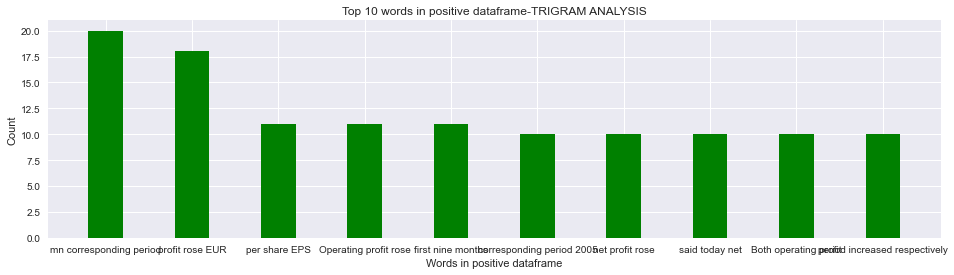

In [56]:
plt.figure(1,figsize=(16,4))
plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")
plt.savefig("positive-trigram.png")
plt.show()

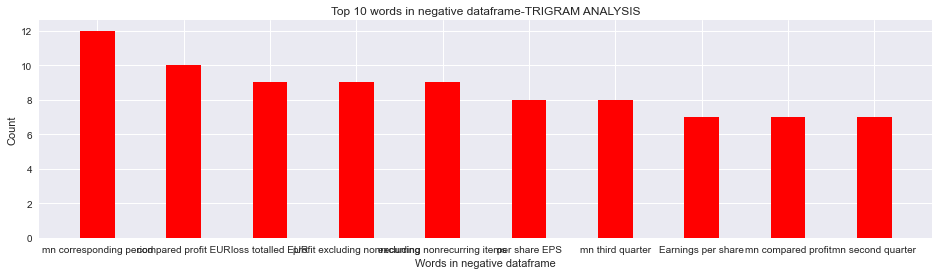

In [57]:
plt.figure(1,figsize=(16,4))
plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4) 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")
plt.savefig("negative-trigram.png")
plt.show()

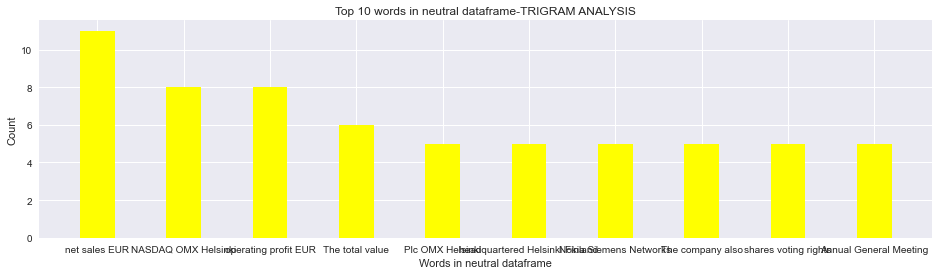

In [58]:
plt.figure(1,figsize=(16,4))
plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4) 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")
plt.savefig("neutral-trigram.png")
plt.show()